In [17]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    # 実行されないようにセルの内容を無視する
    print(f"Skipping cell:\n{cell}")

In [18]:
%%skip
from google.colab import drive
drive.mount('/content/drive')

Skipping cell:
from google.colab import drive
drive.mount('/content/drive')



In [19]:
%%skip
import subprocess

try:
    import japanize_matplotlib
    print("japanize_matplotlib is already installed.")
except ImportError:
    !pip install japanize_matplotlib
    print("japanize_matplotlib has been installed.")

try:
    import jpholiday
    print("jpholiday is already installed.")
except ImportError:
    !pip install jpholiday
    print("jpholiday has been installed.")

try:
    import qreki
    print("qreki is already installed.")
except ImportError:
    !pip install git+https://github.com/fgshun/qreki_py.git@v0.6.1#egg=qreki
    print("qreki has been installed.")

try:
    import category_encoders
    print("category_encoders is already installed.")
except ImportError:
    !pip install category_encoders
    print("category_encoders has been installed.")

try:
    import deap
    print("deap is already installed.")
except ImportError:
    !pip install deap
    print("deap has been installed.")

try:
    import sktime
    print("sktime is already installed.")
except ImportError:
    !pip install sktime
    print("sktime has been installed.")

try:
    import colorama
    print("colorama is already installed.")
except ImportError:
    !pip install colorama
    print("colorama has been installed.")


try:
    import catboost
    print("catboost is already installed.")
except ImportError:
    !pip install catboost
    print("catboost has been installed.")

try:
    import optuna
    print("optuna is already installed.")
except ImportError:
    !pip install optuna
    print("optuna has been installed.")

try:
    import geolib
    print("geolib is already installed.")
except ImportError:
    !pip install geolib
    print("geolib has been installed.")

# mkdirとechoコマンドの実行
try:
    subprocess.check_call('mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd', shell=True)
    print('Directory and file for OpenCL vendors have been created.')
except subprocess.CalledProcessError as e:
    print(f"Error running mkdir and echo command: {e}")

Skipping cell:
import subprocess

try:
    import japanize_matplotlib
    print("japanize_matplotlib is already installed.")
except ImportError:
    !pip install japanize_matplotlib
    print("japanize_matplotlib has been installed.")

try:
    import jpholiday
    print("jpholiday is already installed.")
except ImportError:
    !pip install jpholiday
    print("jpholiday has been installed.")

try:
    import qreki
    print("qreki is already installed.")
except ImportError:
    !pip install git+https://github.com/fgshun/qreki_py.git@v0.6.1#egg=qreki
    print("qreki has been installed.")

try:
    import category_encoders
    print("category_encoders is already installed.")
except ImportError:
    !pip install category_encoders
    print("category_encoders has been installed.")

try:
    import deap
    print("deap is already installed.")
except ImportError:
    !pip install deap
    print("deap has been installed.")

try:
    import sktime
    print("sktime is already installed.")
e

In [20]:
import os
import glob
import pandas
import pandas_datareader.data as web
import numpy
import math
from collections import defaultdict
from statistics import mean,pstdev
from datetime import datetime,timedelta
import jpholiday
from qreki import Kyureki
import matplotlib.pyplot as plt
import plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
import japanize_matplotlib
import seaborn
import lightgbm
import catboost
from catboost import cv
from catboost.text_processing import Dictionary
import category_encoders
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,TimeSeriesSplit,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

from deap import creator,base,tools,algorithms

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.split import (
    CutoffSplitter,#これ使うかも
    ExpandingWindowSplitter,
    SingleWindowSplitter,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.utils.plotting import plot_series

from prophet import Prophet
from prophet.diagnostics import performance_metrics,cross_validation
from prophet.plot import add_changepoints_to_plot
#from neuralprophet import NeuralProphet
import optuna
#from optuna.integration import OptunaSearchCV
import webbrowser
from geopy.geocoders import Nominatim,Photon
from geopy.extra.rate_limiter import RateLimiter
import tqdm

from colorama import Fore, Style


try:
    # 通常のスクリプト環境
    script_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Jupyter NotebookやIPython環境
    script_dir = os.getcwd()
print(script_dir)

# ベースフォルダのパスを作成
base_dir = os.path.abspath(os.path.join(script_dir, r".."))
print(base_dir)  # 実際のフルパスが表示されます
#c:\Users\yuto2\projects\Signate\Moving_demand_forecast\code
#c:\Users\yuto2\projects\Signate\Moving_demand_forecast

df_train=pandas.read_csv(os.path.join(base_dir,r"data/train.csv"))
df_test=pandas.read_csv(os.path.join(base_dir,r"data/test.csv"))
df_submisson=pandas.read_csv(os.path.join(base_dir,r"data/sample_submit.csv"))

#グラフ関連
class Multiple_Charts:
    def __init__(self,df):
        self.df=df
        self.cols=None

    #日付情報をdatetimeで扱えるようにデータを修正
    def datetime_change(self):
        self.df=self.df.rename(columns={"datetime":"ds","y":"y"})
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")
        self.cols=[i for i in self.df.columns if i not in "ds"]
        print(self.cols)

    def graph(self):
        for col in self.cols:
            plt.figure()#新しいグラフを作成
            plt.plot(self.df["ds"],self.df[f"{col}"])
            plt.title(col)
            plt.xlabel("ds")
            plt.ylabel(f"{col}")

    def graph_test(self):
        for col in self.cols:
            plt.figure()#新しいグラフを作成
            #plt.plot(self.df["price_am"],self.df[f"{col}"])
            plt.plot(self.df[f"{col}"],self.df["y"])
            plt.title(col)
            plt.xlabel("ds")
            plt.ylabel(f"{col}")

    #各野菜の全ての期間の価格の推移をグラフとして表示
    def graph_1(self):
        for kind_name in self.kinds:
            df_kind=self.df.query(f"kind=='{kind_name}'")
            plt.figure()#新しいグラフを作成
            plt.plot(df_kind["date"],df_kind["mode_price"])
            plt.title(kind_name)
            plt.xlabel("date")
            plt.ylabel("mode_price")

    #pandasのscatter_metrixをself.dfに実行する。
    def scatter_matrix_view(self):
        pandas.plotting.scatter_matrix(self.df,figsize=(20,20))
        plt.show()

#目的変数と予測値の比較
class CompareCharts:
    def __init__(self,dfs,df_past=None):
        #self.dfs=dfs
        self.dfs=dfs if isinstance(dfs,list) else [dfs]
        self.df_past=df_past

    def compare_submissons_graph(self):
        plt.figure(figsize=(30,12))
        for i,df in enumerate(self.dfs):
            plt.plot(df["ds"],df["y"],label=i,alpha=0.7)
            plt.legend()

    def compare_graph(self):
        for df in self.dfs:
            plt.figure(figsize=(20,5))
            plt.plot(df["ds"],df["y"],label="y")

            if "y_pred" in df.columns:
                plt.plot(df["ds"],df["y_pred"],label="y_pred")

            #if self.df_past is not None:
            #    plt.plot(self.df_past["ds"],self.df_past["y"],label="y_past")
            plt.legend()
            plt.ylim(bottom=0)
            #plt.show()

#時系列モデルの作成
class ProphetExecution:
    def __init__(self,df):
        self.df=df

        self.forecasts=[]

        self.df_train_bset=[]
        self.df_sub=[]
        self.test_nan=[]
        self.df_mer_nan=[]
        self.best_forecast=[]

    #Prophetお試し
    #Prophet(線形モード,交差検証,説明変数無し)
    def prophet_test1(self):

        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        #df_holiday=jpholiday_(self.df)

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        # Prophetのインスタンスを作成
        m = Prophet(
            #holidays=df_holiday,
            seasonality_mode='multiplicative',
            mcmc_samples=300
            )

        # ds以外のカラムを予測因子として追加
        for col in df_train.columns:
            if col != 'ds' and col!="y":
                m.add_regressor(col)

        # 時系列データを学習させる
        m.fit(df_train)

        df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
        np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
        print(np_cutoff)

        # 予測を行う
        forecast = m.predict(df_all)
        #forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        #forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        #forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

        #m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        m.plot_components(forecast)

        #check_dataframe_elements(forecast)
        #forecast["cutoff"]=forecast["ds"].dt.date-pandas.Timedelta(days=365)
        df_p=performance_metrics(df_cv)

        df_result=forecast

        #closeのデータフレームを作成
        df_close_day=df_all[["ds","close"]]
        df_close_day=df_close_day.rename(columns={"close":"close_day"})
        #予測結果にcloseの情報を結合
        #df_result=pandas.merge(df_result,df_close_day,on="ds")
        #df_result=lower_limit_value_prophet(df_result)
        #df_result=close_limit_value_prophet(df_result)

        return df_train,df_test,df_result,df_cv,df_p#df_holiday
    #Prophet(線形モード,交差検証,祝日手動作成)
    def prophet_test2(self):

        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        #for i in range(1,366):
        #    self.df[f"mode_price_{i}prev"]=self.df["mode_price"].shift(i)

        #df_test=self.df.query("ds>='2015-04-01'")
        #df_train=self.df.query("ds<'2015-04-01'")
        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        # Prophetのインスタンスを作成
        m = Prophet(holidays=df_holiday,seasonality_mode='multiplicative')

        # ds以外のカラムを予測因子として追加
        for col in df_train.columns:
            if col != 'ds' and col!="y":
                m.add_regressor(col)

        #m.add_country_holidays(country_name='JP')
        m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

        # 時系列データを学習させる
        m.fit(df_train)


        df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
        np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
        print(np_cutoff)

        # 予測を行う
        forecast = m.predict(df_all)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

        #m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        m.plot_components(forecast)

        #check_dataframe_elements(forecast)
        #forecast["cutoff"]=forecast["ds"].dt.date-pandas.Timedelta(days=365)
        #df_p=performance_metrics(forecast)

        df_result=forecast

        #closeのデータフレームを作成
        df_close_day=df_all[["ds","close"]]
        df_close_day=df_close_day.rename(columns={"close":"close_day"})
        #予測結果にcloseの情報を結合
        df_result=pandas.merge(df_result,df_close_day,on="ds")
        df_result=lower_limit_value_prophet(df_result)
        df_result=close_limit_value_prophet(df_result)

        return df_train,df_test,df_result,df_cv,df_holiday
    #Prophet(ロジスティックモード,交差検証,祝日手動作成)
    def prophet_test3(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        #for i in range(1,366):
        #    self.df[f"mode_price_{i}prev"]=self.df["mode_price"].shift(i)

        #df_test=self.df.query("ds>='2015-04-01'")
        #df_train=self.df.query("ds<'2015-04-01'")
        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        df_train["cap"]=115
        df_train["floor"]=0

        # Prophetのインスタンスを作成
        m = Prophet(growth="logistic",holidays=df_holiday,seasonality_mode='multiplicative')

        # ds以外のカラムを予測因子として追加
        for col in df_train.columns:
            if col != 'ds' and col!="y" and col!="floor" and col!="cap":
                m.add_regressor(col)

        #m.add_country_holidays(country_name='JP')
        m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

        # 時系列データを学習させる
        m.fit(df_train)

        df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
        np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
        print(np_cutoff)

        df_all["cap"]=115
        df_all["floor"]=0
        # 予測を行う
        forecast = m.predict(df_all)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限
        #m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        m.plot_components(forecast)

        #check_dataframe_elements(forecast)
        #forecast["cutoff"]=forecast["ds"].dt.date-pandas.Timedelta(days=365)
        #df_p=performance_metrics(forecast)

        df_result=forecast

        return df_train,df_test,df_result,df_cv,df_holiday

    #Prophet(線形モード,交差検証,祝日手動作成,Optuna)
    def prophet_test4(self):

        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        #for i in range(1,366):
        #    self.df[f"mode_price_{i}prev"]=self.df["mode_price"].shift(i)

        # objective_variable関数の定義
        def objective_variable(train,valid):
            # trainデータのyの95パーセンタイルと5パーセンタイルを計算し、capとfloorとして保存
            ##cap = int(numpy.percentile(train.y,95))
            ##floor = int(numpy.percentile(train.y,5))

            # objective関数の定義
            def objective(trial):
                # OptunaのtrialオブジェクトからProphetのパラメータをサンプリングする
                params = {
                    'changepoint_range' : trial.suggest_discrete_uniform('changepoint_range',0.8,0.999,0.001),
                    'n_changepoints' : trial.suggest_int('n_changepoints',20,45),
                    'changepoint_prior_scale' : trial.suggest_discrete_uniform('changepoint_prior_scale',0.001,0.65,0.001),#推奨されている範囲は[0.001, 0.5]
                    'seasonality_prior_scale' : trial.suggest_discrete_uniform('seasonality_prior_scale',0.01,15,0.01),#[0.01, 10]
                    'holidays_prior_scale' : trial.suggest_discrete_uniform('holidays_prior_scale',0.01,15,0.01),#[0.01, 10]
                    'yearly_fourier' : trial.suggest_int('yearly_fourier',15,25),#5,15
                    'monthly_fourier' : trial.suggest_int('monthly_fourier',5,20),#15
                    'weekly_fourier' : trial.suggest_int('weekly_fourier',5,20),#15
                    'quaterly_fourier' : trial.suggest_int('quaterly_fourier',5,20),#15
                    'yearly_prior' : trial.suggest_discrete_uniform('yearly_prior',1,25,0.1),
                    'monthly_prior' : trial.suggest_discrete_uniform('monthly_prior',1,25,0.1),
                    'weekly_prior' : trial.suggest_discrete_uniform('weekly_prior',1,25,0.1),
                    'quaterly_prior' : trial.suggest_discrete_uniform('quaterly_prior',1,25,0.1),
                    'seasonality_mode':trial.suggest_categorical('seasonality_mode',[
                                                                                "additive",
                                                                                "multiplicative"
                                                                                ]),
                    'holidays_mode':trial.suggest_categorical('holidays_mode',[
                                                                               "additive",
                                                                               "multiplicative"
                                                                               ])
                    #'mcmc_samples' : trial.suggest_int("mcmc_samples",0,2000)
                }
                #説明変数のリストを作成する。
                regressors=[i for i in train.columns if i not in ["ds","y","cap","floor"]]
                ##print(regressors)
                #説明変数のパラメータを設定する。
                for r in regressors:
                    params[f"{r}_prior_scale"]=trial.suggest_loguniform(f"{r}_prior_scale",0.001,0.99)
                    params[f"{r}_mode"]=trial.suggest_categorical(f"{r}_mode",[
                                                                                "additive",
                                                                                "multiplicative"
                                                                                ])

                # Prophetのインスタンスを作成し、パラメータを設定する
                m=Prophet(
                    changepoint_range = params['changepoint_range'],
                    n_changepoints=params['n_changepoints'],
                    changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_prior_scale = params['seasonality_prior_scale'],
                    holidays_prior_scale=params['holidays_prior_scale'],
                    yearly_seasonality=False,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    holidays=df_holiday,
                    #growth='logistic',#ロジスティック成長モデル
                    growth="linear",
                    #seasonality_mode='additive'
                    #seasonality_mode="multiplicative",
                    seasonality_mode=params["seasonality_mode"],
                    holidays_mode=params["holidays_mode"],
                    #mcmc_samples=params["mcmc_samples"]
                    )

                for r in regressors:
                    m.add_regressor(r,prior_scale=params[f"{r}_prior_scale"],mode=params[f"{r}_mode"])

                # 年次、月次、週次、四半期ごとの季節性を追加する
                m.add_seasonality(name='yearly', period=365.25, fourier_order=params['yearly_fourier'],prior_scale=params['yearly_prior'])
                m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier'],prior_scale=params['monthly_prior'])
                m.add_seasonality(name='weekly', period=7, fourier_order=params['weekly_fourier'],prior_scale=params['weekly_prior'])
                m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=params['quaterly_fourier'],prior_scale=params['quaterly_prior'])


                ##train['cap']=cap
                ##rain['floor']=floor
                print("--------チェックポイント1")
                #check_dataframe_elements(train)

                # モデルを学習させる
                m.fit(train)
                print("--------チェックポイント2")

                val=valid.drop(columns=["y"])
                future=val
                ##future['cap']=cap
                ##future['floor']=floor
                print("--------チェックポイント3")

                # 予測を行う
                forecast = m.predict(future)
                forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
                forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
                forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

                print("-----forecast-----")
                print(forecast)
                print("-----forecast-----")

                # 交差検証を行う
                print("-----交差検証-----")
                df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")

                #closeのデータフレームを作成
                df_close_day=train[["ds","close"]]
                df_close_day=df_close_day.rename(columns={"close":"close_day"})
                #予測結果にcloseの情報を結合
                df_cv=pandas.merge(df_cv,df_close_day,on="ds")
                df_cv=lower_limit_value_prophet(df_cv)
                df_cv=close_limit_value_prophet(df_cv)
                df_cv=df_cv.drop("close_day",axis=1)

                np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
                print(np_cutoff)
                print("-----交差検証おわり-----")

                # 予測の精度を評価する
                print("-----評価-----")
                df_p = performance_metrics(df_cv)
                rmse = df_p['mae'].mean()


                #objective関数の最後にモデルを保存する
                trial.set_user_attr("model",m)
                trial.set_user_attr("forecast",forecast)

                # Optunaにmapeを返す
                return rmse

            # objective関数を返す
            return objective

        # optuna_parameter関数の定義
        def optuna_parameter(train,valid):
            # Optunaのstudyオブジェクトを作成する
            #study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=42))
            study=optuna.create_study(direction="minimize")
            # objective_variable関数を使って最適化を行う
            study.optimize(objective_variable(train,valid), n_trials=75)
            # 最適なパラメータを取得する
            optuna_best_params = study.best_params
            #studyからベストモデルの予測結果を取得する
            best_forecast=study.best_trial.user_attrs["forecast"]

            # studyオブジェクトを返す
            return study,best_forecast

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        train=df_train
        valid=df_test
        train_ord=df_all
        test=df_test

        study,best_forecast=optuna_parameter(train,valid)

        #未来のデータを予測
        cap = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,95))
        floor = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,5))

        # fit_model
        m=Prophet(
                changepoint_range = study.best_params['changepoint_prior_scale'],
                n_changepoints=study.best_params['n_changepoints'],
                seasonality_prior_scale = study.best_params['seasonality_prior_scale'],
                changepoint_prior_scale=study.best_params['changepoint_prior_scale'],
                holidays_prior_scale=study.best_params['holidays_prior_scale'],
                yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False,
                holidays=df_holiday,
                #growth='logistic',#ロジスティック成長モデル
                growth="linear",
                #seasonality_mode='additive'
                #seasonality_mode="multiplicative",
                seasonality_mode=study.best_params["seasonality_mode"],
                holidays_mode=study.best_params["holidays_mode"],
                #mcmc_samples=study.best_params['mcmc_samples']
                )

        #説明変数のリストを作成する。
        regressors=[i for i in train_ord.columns if i not in ["ds","y","cap","floor"]]
        # for文で説明変数を追加する
        for r in regressors:
            print(r)
            m.add_regressor(r, prior_scale=study.best_params[f"{r}_prior_scale"], mode=study.best_params[f"{r}_mode"])

        m.add_seasonality(name='yearly', period=365.25, fourier_order=study.best_params['yearly_fourier'],prior_scale=study.best_params['yearly_prior'])
        m.add_seasonality(name='monthly', period=30.5, fourier_order=study.best_params['monthly_fourier'],prior_scale=study.best_params['monthly_prior'])
        m.add_seasonality(name='weekly', period=7, fourier_order=study.best_params['weekly_fourier'],prior_scale=study.best_params['weekly_prior'])
        m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=study.best_params['quaterly_fourier'],prior_scale=study.best_params['quaterly_prior'])

        ##train_ord['cap']=cap
        ##train_ord['floor']=floor

        m.fit(train_ord)

        #val=test
        #future=val
        future=df_all
        ##future['cap']=cap
        ##future['floor']=floor

        #return train_ord,val,df_merged

        forecast = m.predict(future)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限


        #forecast_plot = m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        forecast_plot_components=m.plot_components(forecast)

        #forecast_plot = m.plot(pandas.concat([best_forecast,forecast]))

        #closeのデータフレームを作成
        df_close_day=df_all[["ds","close"]]
        df_close_day=df_close_day.rename(columns={"close":"close_day"})
        #予測結果にcloseの情報を結合
        forecast=pandas.merge(forecast,df_close_day,on="ds")
        forecast=lower_limit_value_prophet(forecast)
        forecast=close_limit_value_prophet(forecast)
        #forecast=forecast.drop("close_day",axis=1)

        df_result=pandas.merge(forecast,test,on="ds",how="inner")


        #予測結果にcloseの情報を結合
        #df_result=pandas.merge(df_result,df_close_day,on="ds")
        #df_result=lower_limit_value_prophet(df_result)
        #df_result=close_limit_value_prophet(df_result)
        #df_result=df_result.drop("close_day",axis=1)

        return df_train,df_test,df_result,forecast,fig,study.best_params
    #Prophetロジスティックモード,交差検証,祝日手動作成,Optuna)
    def prophet_test5(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        df_holiday=jpholiday_(self.df)

        # objective_variable関数の定義
        def objective_variable(train,valid):
            # trainデータのyの95パーセンタイルと5パーセンタイルを計算し、capとfloorとして保存
            ##cap = int(numpy.percentile(train.y,95))
            ##floor = int(numpy.percentile(train.y,5))
            cap=115
            floor=0

            # objective関数の定義
            def objective(trial):
                # OptunaのtrialオブジェクトからProphetのパラメータをサンプリングする
                params = {
                    'changepoint_range' : trial.suggest_discrete_uniform('changepoint_range',0.8,0.95,0.001),
                    'n_changepoints' : trial.suggest_int('n_changepoints',20,35),
                    'changepoint_prior_scale' : trial.suggest_discrete_uniform('changepoint_prior_scale',0.001,0.5,0.001),
                    'seasonality_prior_scale' : trial.suggest_discrete_uniform('seasonality_prior_scale',0.01,10,0.01),
                    'yearly_fourier' : trial.suggest_int('yearly_fourier',5,15),
                    'monthly_fourier' : trial.suggest_int('monthly_fourier',5,15),
                    'weekly_fourier' : trial.suggest_int('weekly_fourier',5,15),
                    'quaterly_fourier' : trial.suggest_int('quaterly_fourier',5,15),
                    'yearly_prior' : trial.suggest_discrete_uniform('yearly_prior',1,25,0.1),
                    'monthly_prior' : trial.suggest_discrete_uniform('monthly_prior',1,25,0.1),
                    'weekly_prior' : trial.suggest_discrete_uniform('weekly_prior',1,25,0.1),
                    'quaterly_prior' : trial.suggest_discrete_uniform('quaterly_prior',1,25,0.1)
                }
                #説明変数のリストを作成する。
                regressors=[i for i in train.columns if i not in ["ds","y","cap","floor"]]
                ##print(regressors)
                #説明変数のパラメータを設定する。
                for r in regressors:
                    params[f"{r}_prior_scale"]=trial.suggest_loguniform(f"{r}_prior_scale",0.001,0.99)
                    params[f"{r}_mode"]=trial.suggest_categorical(f"{r}_mode",["additive", "multiplicative"])

                # Prophetのインスタンスを作成し、パラメータを設定する
                m=Prophet(
                    changepoint_range = params['changepoint_range'],
                    n_changepoints=params['n_changepoints'],
                    changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_prior_scale = params['seasonality_prior_scale'],
                    yearly_seasonality=False,
                    weekly_seasonality=False,
                    daily_seasonality=False,
                    holidays=df_holiday,
                    #growth='logistic',#ロジスティック成長モデル
                    growth="linear",
                    #seasonality_mode='additive'
                    seasonality_mode="multiplicative"
                    )

                for r in regressors:
                    m.add_regressor(r,prior_scale=params[f"{r}_prior_scale"],mode=params[f"{r}_mode"])

                # 年次、月次、週次、四半期ごとの季節性を追加する
                m.add_seasonality(name='yearly', period=365.25, fourier_order=params['yearly_fourier'],prior_scale=params['yearly_prior'])
                m.add_seasonality(name='monthly', period=30.5, fourier_order=params['monthly_fourier'],prior_scale=params['monthly_prior'])
                m.add_seasonality(name='weekly', period=7, fourier_order=params['weekly_fourier'],prior_scale=params['weekly_prior'])
                m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=params['quaterly_fourier'],prior_scale=params['quaterly_prior'])

                train['cap']=cap
                train['floor']=floor

                # モデルを学習させる
                m.fit(train)

                val=valid.drop(columns=["y"])
                future=val
                future['cap']=cap
                future['floor']=floor

                # 予測を行う
                forecast = m.predict(future)
                forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
                forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
                forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限

                print("-----forecast-----")
                print(forecast)
                print("-----forecast-----")

                # 交差検証を行う
                print("-----交差検証-----")
                df_cv=cross_validation(m,horizon="365 days",period="180 days",initial="730 days")
                np_cutoff=numpy.abs(df_cv["y"]-df_cv["yhat"]).groupby(df_cv["cutoff"]).mean().sort_index()
                print(np_cutoff)
                print("-----交差検証おわり-----")

                # 予測の精度を評価する
                print("-----評価-----")
                df_p = performance_metrics(df_cv)
                rmse = df_p['mae'].mean()

                #objective関数の最後にモデルを保存する
                trial.set_user_attr("model",m)
                trial.set_user_attr("forecast",forecast)

                # Optunaにmapeを返す
                return rmse

            # objective関数を返す
            return objective

        # optuna_parameter関数の定義
        def optuna_parameter(train,valid):
            # Optunaのstudyオブジェクトを作成する
            #study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=42))
            study=optuna.create_study(direction="minimize")
            # objective_variable関数を使って最適化を行う
            study.optimize(objective_variable(train,valid), n_trials=50)
            # 最適なパラメータを取得する
            optuna_best_params = study.best_params
            #studyからベストモデルの予測結果を取得する
            best_forecast=study.best_trial.user_attrs["forecast"]

            # studyオブジェクトを返す
            return study,best_forecast

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        train=df_train
        valid=df_test
        train_ord=df_all
        test=df_test

        study,best_forecast=optuna_parameter(train,valid)

        #未来のデータを予測
        #cap = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,95))
        #floor = int(numpy.percentile(train_ord[train_ord["y"].notnull()].y,5))
        cap=115
        floor=0

        # fit_model
        m=Prophet(
                changepoint_range = study.best_params['changepoint_prior_scale'],
                n_changepoints=study.best_params['n_changepoints'],
                seasonality_prior_scale = study.best_params['seasonality_prior_scale'],
                changepoint_prior_scale=study.best_params['changepoint_prior_scale'],
                yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False,
                holidays=df_holiday,
                #growth='logistic',#ロジスティック成長モデル
                growth="linear",
                #seasonality_mode='additive'
                seasonality_mode="multiplicative"
                )

        #説明変数のリストを作成する。
        regressors=[i for i in train_ord.columns if i not in ["ds","y","cap","floor"]]
        # for文で説明変数を追加する
        for r in regressors:
            print(r)
            m.add_regressor(r, prior_scale=study.best_params[f"{r}_prior_scale"], mode=study.best_params[f"{r}_mode"])

        m.add_seasonality(name='yearly', period=365.25, fourier_order=study.best_params['yearly_fourier'],prior_scale=study.best_params['yearly_prior'])
        m.add_seasonality(name='monthly', period=30.5, fourier_order=study.best_params['monthly_fourier'],prior_scale=study.best_params['monthly_prior'])
        m.add_seasonality(name='weekly', period=7, fourier_order=study.best_params['weekly_fourier'],prior_scale=study.best_params['weekly_prior'])
        m.add_seasonality(name='quaterly', period=365.25/4, fourier_order=study.best_params['quaterly_fourier'],prior_scale=study.best_params['quaterly_prior'])

        train_ord['cap']=cap
        train_ord['floor']=floor

        m.fit(train_ord)

        #val=test
        #future=val
        future=df_all
        future['cap']=cap
        future['floor']=floor

        #return train_ord,val,df_merged

        forecast = m.predict(future)
        forecast["yhat"]=forecast["yhat"].clip(lower=0)#yhatを0以上に制限
        forecast["yhat_lower"]=forecast["yhat_lower"].clip(lower=0)#yhat_lowerを0以上に制限
        forecast["yhat_upper"]=forecast["yhat_upper"].clip(lower=0)#yhat_upperを0以上に制限
        #forecast_plot = m.plot(forecast)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        forecast_plot_components=m.plot_components(forecast)

        #forecast_plot = m.plot(pandas.concat([best_forecast,forecast]))

        df_result=pandas.merge(forecast,test,on="ds",how="inner")

        return df_train,df_test,df_result,forecast,fig


    def greykit_test1(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")
        self.df=self.df.rename(columns={"ds":"ts"})

        regressors=[i for i in self.df.columns if i not in ["ts","y"]]
        #regressors=[i for i in self.df.columns]
        print("説明変数=>",regressors)

        df_test=self.df.query("ts>='2016-04-01'")
        df_train=self.df.query("ts<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])

        #self.df = self.df.sort_values(by="ts")


        print(df_all)

        metadata=MetadataParam(time_col="ts",value_col="y",freq="D",train_end_date=df_train["ts"].iloc[-1])

        model_components=ModelComponentsParam(regressors=dict(regressor_cols=regressors))

        forecaster=Forecaster()
        result=forecaster.run_forecast_config(
            self.df,
            config=ForecastConfig(
                model_template=ModelTemplateEnum.SILVERKITE.name,
                #evaluation_metric_param = EvaluationMetricParam(
                #cv_selection_metric="mean_absolute_error",
                #cv_report_metrics=["mean_absolute_error"],
                #agg_periods=1,
                #agg_func=numpy.mean
            #),

                forecast_horizon=365,
                coverage=0.95,
                model_components_param=model_components,
                metadata_param=metadata,

            ))

        ts_=result.timeseries
        print(ts_.time_stats)         # time statistics
        print(ts_.value_stats)        # value statistics
        print(ts_.freq)               # frequency
        print(ts_.regressor_cols)     # available regressors
        #print(ts_.last_date_for_fit)  # last date with value_col
        print(ts_.last_date_for_reg)  # last date for any regressor
        print(ts_.df.head())          # the standardized dataset for forecasting
        print(ts_.fit_df.head())      # the standardized dataset for fitting and historical evaluation

        fig = result.forecast.plot_components()
        plotly.io.show(fig)

        backtest = result.backtest
        fig = backtest.plot()
        plotly.io.show(fig)



        backtest_eval=defaultdict(list)

        for metric,value in backtest.test_evaluation.items():
            backtest_eval[metric].append(value)
            backtest_eval[metric].append(backtest.test_evaluation[metric])
        backtest_metrics=pandas.DataFrame(backtest_eval,index=["train","test"]).T

        forecast = result.forecast
        fig = forecast.plot()
        plotly.io.show(fig)



        df_forecast=forecast.df
        """
        forecast_eval=defaultdict(list)

        for metric,value in forecast.test_evaluation.items():
            forecast_eval[metric].append(value)
            forecast_eval[metric].append(forecast.test_evaluation[metric])
        forecast_metrics=pandas.DataFrame(forecast_eval,index=["train","test"]).T
        #df_result=pandas.DataFrame(result.backtest.test_evaluation, index=["Value"]).transpose()
        """

        return backtest_metrics,df_forecast

    def greykit_test2(self):
        self.df["ds"]=pandas.to_datetime(self.df["ds"],format="%Y-%m-%d")

        regressors=[i for i in self.df.columns if i not in ["ds","y","cap","floor"]]
        #regressors=[i for i in self.df.columns]
        print("説明変数=>",regressors)

        df_test=self.df.query("ds>='2016-04-01'")
        df_train=self.df.query("ds<'2016-04-01'")
        df_all=pandas.concat([df_train,df_test])
        #df_all = df_all.sort_values(by="ds")

        print(df_all)
        #def objective(trial):

        growth={"growth_term":"linear"}

        changepoints = {
            "changepoints_dict": {
                "method": "auto",#変化点の検出方法
                "yearly_seasonality_order": 0,#年周期のモデル化に使うフーリエ級数の次数
                "regularization_strength": 0.5,#変化点の重み付けに使う正則化項の強さを指定。0~1の間の値で、大きく程変化点の影響が小さい
                "resample_freq": "7D",#変化点の検出に使うデータの再サンプリングの頻度を指定
                "potential_changepoint_n": 20,#変化点の候補数を指定
                "yearly_seasonality_change_freq": None,# 年周期の変化点の頻度を指定
                "no_changepoint_distance_from_end": "14D",#データの終点からどのくらいの距離まで変化点を許容しないかを指定
                "actual_changepoint_min_distance": "7D"#実際に変化点として採用する候補の最小間隔を指定
            }
        }

        seasonality={
         "yearly_seasonality": 30,#年周期のフーリエ次数
         "quarterly_seasonality": "auto",#四半期周期のフーリエ次数
         "monthly_seasonality": "auto",#月周期のフーリエ次数
         "weekly_seasonality": "auto",#週周期のフーリエ次数
         "daily_seasonality": "auto",#日周期のフーリエ次数
        }

        events={
         "holidays_to_model_separately": "auto",#個別にモデリングする祝日のリスト
         "holiday_lookup_countries": ['JP'],
         "holiday_pre_num_days": 1,
         "holiday_post_num_days": 1,
         "holiday_pre_post_num_dict": None,
         "daily_event_df_dict": None,
        }

        metadata=MetadataParam(time_col="ds",value_col="y",freq="D"
                               ,train_end_date=df_train["ds"].iloc[-1]
                               )

        model_components=ModelComponentsParam(regressors=dict(regressor_cols=regressors)
                                              ,seasonality=seasonality
                                              ,growth=growth
                                              ,changepoints=changepoints
                                              ,events=events)

        forecaster=Forecaster()
        result=forecaster.run_forecast_config(
            df_all,
            config=ForecastConfig(
                model_template=ModelTemplateEnum.SILVERKITE.name,
                #evaluation_metric_param = EvaluationMetricParam(
                #cv_selection_metric="mean_absolute_error",
                #cv_report_metrics=["mean_absolute_error"],
                #agg_periods=1,
                #agg_func=numpy.mean
            #),

                forecast_horizon=365,
                coverage=0.95,
                model_components_param=model_components,
                metadata_param=metadata,

            ))

        ts_=result.timeseries
        print("時系列データの時間に関する統計量=>",ts_.time_stats)         # 時系列データの時間に関する統計量を表示する
        print("時系列データの値に関する統計量=>",ts_.value_stats)        # 時系列データの値に関する統計量を表示する
        print("時系列データの頻度=>",ts_.freq)               # 時系列データの頻度を表示する
        print("時系列データに含まれる回帰変数の例名",ts_.regressor_cols)     # 時系列データに含まれる回帰変数の例名を表示する
        #print(ts_.last_date_for_fit)  # last date with value_col
        print("時系列データの回帰変数が存在する最後の日付",ts_.last_date_for_reg)  # 時系列データの回帰変数が存在する最後の日付を表示する
        print("時系列データの最初の5行",ts_.df.head())          # を表示する
        print("時系列データの最後の5行",ts_.fit_df.head())      # 時系列データの最後の5行を表示する
        print("=====モデルのパラメータ=====",result.model.get_params)
        print(print(result.model[-1].summary(max_colwidth=50)))

        backtest = result.backtest
        fig = backtest.plot()
        plotly.io.show(fig)


        print(backtest.train_evaluation)  # backtest training set
        print(backtest.test_evaluation)   # hold out test set

        backtest_eval=defaultdict(list)

        for metric,value in backtest.test_evaluation.items():
            backtest_eval[metric].append(value)
            backtest_eval[metric].append(backtest.test_evaluation[metric])
        backtest_metrics=pandas.DataFrame(backtest_eval,index=["train","test"]).T

        forecast = result.forecast
        fig = forecast.plot()
        plotly.io.show(fig)

        df_forecast=forecast.df

        sst = SimpleSilverkiteTemplate()
        model_components = sst.get_model_components_from_model_template("SILVERKITE_EMPTY")
        print(model_components[0])  # `model_components` is a list of length 1.

        # resultはForecasterクラスのインスタンス
        model = result.model # modelはPipelineクラスのインスタンス
        print(model.named_steps.keys()) # Pipelineクラスに渡した各ステップの名前を出力
        silverkite = model.named_steps["silverkite"] # silverkiteはSilverkiteEstimatorクラスのインスタンス
        """
        forecast_eval=defaultdict(list)

        for metric,value in forecast.test_evaluation.items():
            forecast_eval[metric].append(value)
            forecast_eval[metric].append(forecast.test_evaluation[metric])
        forecast_metrics=pandas.DataFrame(forecast_eval,index=["train","test"]).T
        #df_result=pandas.DataFrame(result.backtest.test_evaluation, index=["Value"]).transpose()
        """
        #study=optuna.create_study(direction="minisize")
        #study.optimize(objective,n_trials=3)
        return backtest_metrics,df_forecast

class TreeExecution:
    def __init__(self,df):
        self.df=df
        self.df_copy=self.df
        self.df_compare=[]
        self.train=None
        self.test=None
        self.train_x=None
        self.train_y=None
        self.val_x=None
        self.val_y=None
        self.df_x=None
        self.df_y=None

        self.train_final_index=None
        self.cv_list=None

        self.rfr=None
        self.y_pred_rfr=None

        self.lightgbm_model=None
        self.y_pred=None

        self.catboost_model=None
        self.y_pred_catboost=None

        self.train_valid_x=None
        self.valid_x=None
        self.train_valid_y=None
        self.valid_y=None
    """
    def f1_score(self,y_true,y_pred):
        N_LABELS=3
        y_pred_=y_pred.reshape(N_LABELS,len(y_pred)//N_LABELS).argmax(axis=0)
        score=f1_score(y_true,y_pred_,average="macro")

        return "f1",score,True
    """

    def train_test_split_1(self):

        #data=ProcessData(df_train,df_test)
        #df_train,df_test,df_all=data.return_data()

        #prophet_class=ProphetExecution(df_all)
        #df_train_,df_test_,df_result=prophet_class.prophet_test1()

        self.train,self.test=train_test_split(self.df,shuffle=False,test_size=0.2)
        print("self.df.shape",self.df.shape)
        print("self.train.shape",self.train.shape)
        print("self.test.shape",self.test.shape)



        self.train_x=self.train.drop(["ds","y"],axis=1)
        self.train_y=self.train["y"]
        self.val_x=self.test.drop(["ds","y"],axis=1)
        self.val_y=self.test["y"]

        self.df_x=self.df.drop(["ds","y"],axis=1)
        self.df_y=self.df["y"]

    def train_test_split_2(self):
        self.train=self.df.drop(["ds","y"],axis=1)
        self.test=self.df["y"]

    def train_test_split_3(self):
        self.df=self.df.drop("ds",axis=1)
        #self.df=self.df.drop(["ds"],axis=1)
        self.train=self.df.drop(["y"],axis=1)
        self.test=self.df["y"]

    def train_test_split_4(self):

        self.cv_list,self.train_final_index=train_test_timesplit2(self.df)
        self.df=self.df.drop("ds",axis=1)
        #self.df=self.df.drop(["ds"],axis=1)
        self.train=self.df.drop(["y"],axis=1)
        self.test=self.df["y"]

    def train_test_split_5(self):

        self.cv_list,self.train_final_index=train_test_timesplit2(self.df)
        self.df=self.df.drop("ds",axis=1)
        #self.df=self.df.drop(["ds"],axis=1)
        self.train=self.df.drop(["y_pred_residual"],axis=1)
        self.test=self.df["y_pred_residual"]

    def train_test_split_6(self):

        #data=ProcessData(df_train,df_test)
        #df_train,df_test,df_all=data.return_data()

        #prophet_class=ProphetExecution(df_all)
        #df_train_,df_test_,df_result=prophet_class.prophet_test1()

        self.train,self.test=train_test_split(self.df,shuffle=False,test_size=0.2)
        print("self.df.shape",self.df.shape)
        print("self.train.shape",self.train.shape)
        print("self.test.shape",self.test.shape)



        self.train_x=self.train.drop(["ds","y_pred_residual"],axis=1)
        self.train_y=self.train["y_pred_residual"]
        self.val_x=self.test.drop(["ds","y_pred_residual"],axis=1)
        self.val_y=self.test["y_pred_residual"]

        self.df_x=self.df.drop(["ds","y_pred_residual"],axis=1)
        self.df_y=self.df["y_pred_residual"]

    def train_test_split_prophet_1(self):
        self.train,self.test=train_test_split(self.df,shuffle=False,test_size=0.2)
        print("self.df.shape",self.df.shape)
        print("self.train.shape",self.train.shape)
        print("self.test.shape",self.test.shape)

        self.train_x=self.train.drop(["ds","y"],axis=1)
        self.train_y=self.train["y"]
        self.val_x=self.test.drop(["ds","y"],axis=1)
        self.val_y=self.test["y"]

        self.df_x=self.df.drop(["ds","y"],axis=1)
        self.df_y=self.df["y"]

    def randomforest_test1(self):
        self.rfm=RandomForestRegressor(n_estimators=100,criterion="absolute_error")
        self.rfm.fit(self.train_x,self.train_y)

        self.y_pred_rfr=self.rfm.predict(self.val_x)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_rfr)
        print(f"Validation MAE score: {valid_mae}")

        #df_copyに予測結果の列を作成して、予測対象の範囲の行を残す
        print(self.train_x.shape)
        df_compare=self.df_copy.iloc[self.train_x.shape[0]:]
        df_compare["y_pred"]=self.y_pred_rfr

        return df_compare,self.rfm


    def lightgbm_test1(self):
        params={
                #"objective":"l1",
                "objective":"regression",
                "metrics":"mae",
                "random_state":42,
                #"metrics":"multi_error",
                "boosting": "gbdt",
                'n_estimators': 10000,
                #'n_estimators': 1074,
                #'early_stopping_round': 100,
                #"device":"gpu",
                #"gpu_device_id":1,
                #'num_leaves': 923,
                #'max_depth': 30
                #'feature_fraction': 0.5550780976534292,
                #'subsample_freq': 5,
                #"bagging_freq": 5, #rfモードの時は必要
                #'bagging_fraction': 0.9257381196775767,
                #'min_data_in_leaf': 22,
                #'lambda_l1': 0.009074027558328245,
                #'lambda_l2': 1.8570479012661552e-08
                }


        self.lightgbm_model=lightgbm.LGBMRegressor(**params)
        self.lightgbm_model.fit(self.train_x
                                ,self.train_y
                                ,eval_set=(self.val_x,self.val_y)
                                #,eval_metric=self.f1_score
                                )

        self.y_pred_lightgbm=self.lightgbm_model.predict(self.val_x)
        #print(self.y_pred_lightgbm)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_lightgbm)
        print(f"Validation MAE score: {valid_mae}")
        print("")
        print("全ての特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain")
        print("上位20個の特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=30)
        #print("下位20個の特徴量が含まれたグラフ")
        #lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=20,reverse=True)
        # lgb.feature_importance関数で重要度を配列として取得する
        importance = self.lightgbm_model.feature_importances_

        # 特徴量名と重要度をデータフレームにまとめる
        importance_df = pandas.DataFrame({"feature_name": self.lightgbm_model.feature_name_, "importance": importance})

        # 重要度の昇順でソートする
        importance_df = importance_df.sort_values("importance", ascending=True)

        # 下位20個の特徴量を表示する
        print("下位20個の特徴量")
        print(importance_df.head(20))
        print("下位から順に全ての特徴量")
        print(importance_df)

        #df_copyに予測結果の列を作成して、予測対象の範囲の行を残す
        print(self.train_x.shape)
        df_compare=self.df_copy.iloc[self.train_x.shape[0]:]
        df_compare["y_pred"]=self.y_pred_lightgbm

        lightgbm_final_model=lightgbm.LGBMRegressor(**params)
        lightgbm_final_model.fit(self.df_x,self.df_y,init_model=self.lightgbm_model)

        return df_compare,lightgbm_final_model
        #return df_compare,self.lightgbm_model

    def lightgbm_test2(self):
        params={"objective":"l1",
                "metrics":"mae",
                #"metrics":"multi_error",
                "boosting": "gbdt",
                'n_estimators': 10000,
                #'n_estimators': 1074,
                'early_stopping_round': 100,
                #"device":"gpu",
                #"gpu_device_id":1,
                #'num_leaves': 923,
                'max_depth': 30
                #'feature_fraction': 0.5550780976534292,
                #'subsample_freq': 5,
                #"bagging_freq": 5, #rfモードの時は必要
                #'bagging_fraction': 0.9257381196775767,
                #'min_data_in_leaf': 22,
                #'lambda_l1': 0.009074027558328245,
                #'lambda_l2': 1.8570479012661552e-08
                }
        #kFoldオブジェクトを作成
        kf=KFold(n_splits=5,shuffle=True,random_state=42)

        scores=[]

        for train_index,test_index in kf.split(self.df):
            train_x,train_y=self.train.iloc[train_index],self.test.iloc[train_index]
            val_x,val_y=self.train.iloc[test_index],self.test.iloc[test_index]

            print("第1段階の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

            lightgbm_model=lightgbm.LGBMRegressor(**params)
            lightgbm_model.fit(train_x,train_y,eval_set=(val_x,val_y)
                               #,eval_metric=self.f1_score
                               )

            y_pred_lightgbm=lightgbm_model.predict(val_x)
            score=mean_absolute_error(val_y,y_pred_lightgbm)
            scores.append(score)
        #得られた精度のリスト
        print(f"Score list: {scores}")

    def lightgbm_test3(self):

        self.df_x=self.df.drop(["ds","y_pred_residual"],axis=1)
        self.df_y=self.df["y_pred_residual"]

        def objective(trial):
            params={
            "objective":"l1",
            #"metrics":"mae",
            "metric":"mae", # metrics から metric に変更
            #"n_estimators":trial.suggest_int('n_estimators',2000,5000,step=100),
            "n_estimators":trial.suggest_int('n_estimators',2000,12500),
            #"num_iterations":trial.suggest_int('num_iterations',2000,12500), # n_estimators から num_iterations に変更
            #"learning_rate":0.01,
            "learning_rate":trial.suggest_uniform('feature_fraction', 0.0001, 0.01),
            #"early_stopping_round":100
            #"early_stopping_round":trial.suggest_int('early_stopping_round',100,200),
            "num_leaves": trial.suggest_int('num_leaves', 2, 1000),
            "max_depth": trial.suggest_int('max_depth', 2, 20),
            "feature_pre_filter": False,  # feature_pre_filterをfalseに設定する
            "feature_fraction": trial.suggest_uniform('feature_fraction', 0.1, 1),
            "subsample_freq": trial.suggest_int('subsample_freq', 1, 10),
            "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1),
            "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 150),
            "boosting": "gbdt",
            #"boosting_type": "gbdt", # boosting から boosting_type に変更
            "lambda_l1": trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            "lambda_l2": trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
            "importance_type":"gain",
            "verbose": -1,
            "random_state":42
                }

            ts_in=TimeSeriesSplit(n_splits=5)
            #cv_results=lightgbm.cv(params,train_set=lgb_train,nfold=kf_in,stratified=False,eval_train_metric=True)

            scores=[]
            df_compares=[]
            fitted_models_lgbm = []

            #for j,(train_in_index,test_in_index) in enumerate(kf_in.split(train_index)):
            for train_index,test_index in ts_in.split(self.df):
                train_x,train_y=self.df_x.iloc[train_index],self.df_y.iloc[train_index]
                test_x,test_y=self.df_x.iloc[test_index],self.df_y.iloc[test_index]

                print("第1段階の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",test_x.shape,"self.valid_y",test_y.shape)
                #train_x,train_y=self.df.loc[train_in_index],self.test.loc[train_in_index]
                #val_x,val_y=self.df.loc[test_in_index],self.test.loc[test_in_index]

                #print("内側の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

                lightgbm_in_model=lightgbm.LGBMRegressor(**params)
                lightgbm_in_model.fit(
                                      train_x,train_y,
                                      eval_set=[(train_x,train_y),(test_x,test_y)],
                                      eval_names=["train","valid"],
                                      callbacks = [lightgbm.log_evaluation(250), lightgbm.early_stopping(100)])
                                

                y_pred_in_lightgbm=lightgbm_in_model.predict(test_x)
                score=mean_absolute_error(test_y,y_pred_in_lightgbm)
                scores.append(score)

                df_compare=self.df_copy.iloc[test_index]
                df_compare["y_pred"]=y_pred_in_lightgbm
                df_compares.append(df_compare)
                trial.set_user_attr("df_compares",df_compares)

                fitted_models_lgbm.append(lightgbm_in_model)

            
            # OptunaのTrialに結果を格納
            trial.set_user_attr("df_compares", df_compares)

            print(f"Fold-wise Scores: {scores}")
            mean_score = mean(scores)
            print(f"Mean MAE Score: {mean_score}")

            return mean_score

        study=optuna.create_study(direction="minimize")
        study.optimize(objective,n_trials=75)

        best_params=study.best_params

        lightgbm_final_model=lightgbm.LGBMRegressor(**best_params)
        lightgbm_final_model.fit(self.df_x,self.df_y)

        lightgbm.plot_importance(lightgbm_final_model, importance_type="gain",
                                figsize=(20,20)
                                )
        plt.show()

        best_df_compares=study.best_trial.user_attrs["df_compares"]
        oof_df = pandas.concat(best_df_compares, axis=0).sort_index()  # インデックス順に整列
        print(oof_df.head())

        #----------------------------------------------------------------
        plt.figure(figsize=(10, 6))
        plt.scatter(oof_df["y_pred_residual"], oof_df["y_pred"], alpha=0.5)
        plt.plot([oof_df["y_pred_residual"].min(), oof_df["y_pred_residual"].max()],
                [oof_df["y_pred_residual"].min(), oof_df["y_pred_residual"].max()], color='red')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual vs Predicted")
        plt.show()
        #----------------------------------------------------------------
        oof_df["error"] = abs(oof_df["y_pred_residual"] - oof_df["y_pred"])
        print(oof_df.sort_values("error", ascending=False).head(10))

        import seaborn as sns
        sns.histplot(oof_df["error"], bins=50, kde=True)
        plt.xlabel("Absolute Error")
        plt.title("Error Distribution")
        plt.show()

        large_error_df = oof_df[oof_df["error"] > oof_df["error"].quantile(0.95)]
        print(large_error_df.describe())

        




        return oof_df,lightgbm_final_model

    def lightgbm_test4(self):
        def objective(trial):
            params={
            "objective":"l1",
            #"metrics":"mae",
            "metric":"mae", # metrics から metric に変更
            #"n_estimators":trial.suggest_int('n_estimators',2000,5000,step=100),
            "n_estimators":trial.suggest_int('n_estimators',2000,12500),
            #"num_iterations":trial.suggest_int('num_iterations',2000,12500), # n_estimators から num_iterations に変更
            #"learning_rate":0.01,
            "learning_rate":trial.suggest_uniform('feature_fraction', 0.0001, 0.01),
            #"early_stopping_round":100
            #"early_stopping_round":trial.suggest_int('early_stopping_round',100,200),
            "num_leaves": trial.suggest_int('num_leaves', 2, 1000),
            "max_depth": trial.suggest_int('max_depth', 2, 20),
            #"feature_pre_filter": False,  # feature_pre_filterをfalseに設定する
            #"feature_fraction": trial.suggest_uniform('feature_fraction', 0.1, 1),
            "subsample_freq": trial.suggest_int('subsample_freq', 1, 10),
            "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1),
            "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 150),
            "boosting": "gbdt",
            #"boosting_type": "gbdt", # boosting から boosting_type に変更
            "lambda_l1": trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
            "lambda_l2": trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
                }

            #ts_in=TimeSeriesSplit(n_splits=5)
            #cv_results=lightgbm.cv(params,train_set=lgb_train,nfold=kf_in,stratified=False,eval_train_metric=True)

            scores=[]
            df_compares=[]
            #for j,(train_in_index,test_in_index) in enumerate(kf_in.split(train_index)):
            for train_index,test_index in self.cv_list:
                train_x,train_y=self.train.iloc[train_index],self.test.iloc[train_index]
                test_x,test_y=self.train.iloc[test_index],self.test.iloc[test_index]
                print("train_x")
                print(train_x)
                print("train_y")
                print(train_y)

                print("第1段階の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",test_x.shape,"self.valid_y",test_y.shape)
                #train_x,train_y=self.df.loc[train_in_index],self.test.loc[train_in_index]
                #val_x,val_y=self.df.loc[test_in_index],self.test.loc[test_in_index]

                #print("内側の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

                lightgbm_in_model=lightgbm.LGBMRegressor(**params)
                lightgbm_in_model.fit(train_x,train_y,eval_set=(test_x,test_y)
                                #,eval_metric=self.f1_score
                                )

                y_pred_in_lightgbm=lightgbm_in_model.predict(test_x)
                score=mean_absolute_error(test_y,y_pred_in_lightgbm)
                scores.append(score)

                df_compare=self.df_copy.iloc[test_index]
                df_compare["y_pred"]=y_pred_in_lightgbm
                df_compares.append(df_compare)
                trial.set_user_attr("df_compares",df_compares)


            #得られた精度のリスト
            print(f"Score In list: {scores}")

            mean_score=mean(scores)
            std_score=pstdev(scores)

            print(f"Score In Mean: {mean_score}")
            #print(f"Score Std: {std_score}")


            return mean_score

        study=optuna.create_study(direction="minimize")

        study.optimize(objective,n_trials=15)

        best_params=study.best_params

        df_train_final=self.train.iloc[self.train_final_index]
        print("df_train_final")
        print(df_train_final)
        df_test_final=self.test.iloc[self.train_final_index]
        print("df_test_final")
        print(df_test_final)

        lightgbm_final_model=lightgbm.LGBMRegressor(**best_params)
        lightgbm_final_model.fit(df_train_final,df_test_final)
        #lightgbm_final_model.fit(self.train,self.test)
        best_df_compares=study.best_trial.user_attrs["df_compares"]

        return lightgbm_final_model,best_df_compares

    def lightgbm_test5(self):

        #外側のクロスバリデーションのスコアを格納するリスト
        outer_scores=[]
        outer_params=[]
        self.df=self.df.drop(["ds"],axis=1)
        self.test=self.df["y"]
        #kFoldオブジェクトを作成
        ts=TimeSeriesSplit(n_splits=5)
        #外側のクロスバリデーションのループ
        for i,(train_index,test_index) in enumerate(ts.split(self.df)):
            print(Fore.RED+f"Fold outer {i+1}")
            print(Style.RESET_ALL)
            train_out_x,train_out_y=self.df.iloc[train_index],self.test.iloc[train_index]
            test_out_x,test_out_y=self.df.iloc[test_index],self.test.iloc[test_index]
            #学習用データとテスト用データのインデックスを取得
            #train_index=self.df.index[train_index]
            #test_index=self.df.index[test_index]
            #print(train_index)
            #print(test_index)

            def objective(trial):
                params={
                "objective":"l1",
                #"metrics":"mae",
                "metric":"mae", # metrics から metric に変更
                #"n_estimators":trial.suggest_int('n_estimators',2000,5000,step=100),
                "n_estimators":trial.suggest_int('n_estimators',2000,12500),
                #"num_iterations":trial.suggest_int('num_iterations',2000,12500), # n_estimators から num_iterations に変更
                #"learning_rate":0.01,
                "learning_rate":trial.suggest_uniform('feature_fraction', 0.0001, 0.01),
                #"early_stopping_round":100
                #"early_stopping_round":trial.suggest_int('early_stopping_round',100,200),
                "num_leaves": trial.suggest_int('num_leaves', 2, 1000),
                "max_depth": trial.suggest_int('max_depth', 2, 20),
                "feature_pre_filter": False,  # feature_pre_filterをfalseに設定する
                "feature_fraction": trial.suggest_uniform('feature_fraction', 0.1, 1),
                "subsample_freq": trial.suggest_int('subsample_freq', 1, 10),
                "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1),
                "min_data_in_leaf": trial.suggest_int('min_data_in_leaf', 10, 150),
                "boosting": "gbdt",
                #"boosting_type": "gbdt", # boosting から boosting_type に変更
                "lambda_l1": trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
                "lambda_l2": trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
                    }

                ts_in=TimeSeriesSplit(n_splits=5)
                #cv_results=lightgbm.cv(params,train_set=lgb_train,nfold=kf_in,stratified=False,eval_train_metric=True)

                scores=[]
                #for j,(train_in_index,test_in_index) in enumerate(kf_in.split(train_index)):
                for j,(train_in_index,test_in_index) in enumerate(ts_in.split(train_out_x)):
                    print(Fore.BLUE+f"Fold in {j+1}")
                    print(Style.RESET_ALL)
                    train_in_x,train_in_y=train_out_x.iloc[train_in_index],train_out_y.iloc[train_in_index]
                    test_in_x,test_in_y=train_out_x.iloc[test_in_index],train_out_y.iloc[test_in_index]
                    #train_x,train_y=self.df.loc[train_in_index],self.test.loc[train_in_index]
                    #val_x,val_y=self.df.loc[test_in_index],self.test.loc[test_in_index]

                    #print("内側の分割=>","self.train_x",train_x.shape,"self.train_y",train_y.shape,"self.valid_x",val_x.shape,"self.valid_y",val_y.shape)

                    lightgbm_in_model=lightgbm.LGBMRegressor(**params)
                    lightgbm_in_model.fit(train_in_x,train_in_y,eval_set=(test_in_x,test_in_y)
                                    #,eval_metric=self.f1_score
                                    )

                    y_pred_in_lightgbm=lightgbm_in_model.predict(test_in_x)
                    score=mean_absolute_error(test_in_y,y_pred_in_lightgbm)
                    scores.append(score)
                #得られた精度のリスト
                print(f"Score In list: {scores}")

                mean_score=mean(scores)
                std_score=pstdev(scores)

                print(f"Score In Mean: {mean_score}")
                #print(f"Score Std: {std_score}")


                return mean_score

            study=optuna.create_study(direction="minimize")

            study.optimize(objective,n_trials=30)

            best_params=study.best_params

            lightgbm_out_model=lightgbm.LGBMRegressor(**best_params)
            lightgbm_out_model.fit(train_out_x,train_out_y,eval_set=(test_out_x,test_out_y))

             #テスト用データの予測
            y_pred_out_lightgbm=lightgbm_out_model.predict(test_out_x)

            #テスト用データのスコアを計算
            score_out=mean_absolute_error(test_out_y, y_pred_out_lightgbm)
            print(f"Score Out Mean: {score_out}")

            #スコアをリストに追加
            outer_scores.append(score_out)
            #テスト用データに使用するハイパーパラメータを記録
            outer_params.append(best_params)

        #外側のクロスバリデーションのスコアのリストを出力
        print(f"Score List Out Mean: {outer_scores}")
        #外側のクロスバリデーションのスコアの平均を出力
        mean_out_score=numpy.mean(outer_scores)
        print(f"Average Out score: {mean_out_score}")

        # 最も小さい値をmin関数で求める
        min_score = min(outer_scores)

        # 最も小さい値のインデックスをindex関数で求める
        min_index = outer_scores.index(min_score)
        print("外側のクロスバリデーションで使用したパラメータの組み合わせのリスト",outer_params)

        best_out_param=outer_params[min_index]

        lightgbm_final_model=lightgbm.LGBMRegressor(**best_out_param)
        lightgbm_final_model.fit(self.train,self.test)

        return lightgbm_final_model

    def lightgbm_prophet_test1(self):

        params={"objective":"l1",
                "metrics":"mae",
                "random_state":42,
                #"metrics":"multi_error",
                "boosting": "gbdt",
                'n_estimators': 10000,
                'early_stopping_round': 1000,
                "device":"gpu",
                "gpu_device_id":1,
                #'num_leaves': 923,
                'max_depth': 18
                #'feature_fraction': 0.5550780976534292,
                #'subsample_freq': 5,
                #"bagging_freq": 5, #rfモードの時は必要
                #'bagging_fraction': 0.9257381196775767,
                #'min_data_in_leaf': 22,
                #'lambda_l1': 0.009074027558328245,
                #'lambda_l2': 1.8570479012661552e-08
                }


        self.lightgbm_model=lightgbm.LGBMRegressor(**params)
        self.lightgbm_model.fit(self.train_x
                                ,self.train_y
                                ,eval_set=(self.val_x,self.val_y)
                                #,eval_metric=self.f1_score
                                )

        self.y_pred_lightgbm=self.lightgbm_model.predict(self.val_x)
        #print(self.y_pred_lightgbm)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_lightgbm)
        print(f"Validation MAE score: {valid_mae}")
        print("")
        print("全ての特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain")
        print("上位20個の特徴量が含まれたグラフ")
        lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=30)
        #print("下位20個の特徴量が含まれたグラフ")
        #lightgbm.plot_importance(self.lightgbm_model,importance_type="gain",max_num_features=20,reverse=True)
        # lgb.feature_importance関数で重要度を配列として取得する
        importance = self.lightgbm_model.feature_importances_

        # 特徴量名と重要度をデータフレームにまとめる
        importance_df = pandas.DataFrame({"feature_name": self.lightgbm_model.feature_name_, "importance": importance})

        # 重要度の昇順でソートする
        importance_df = importance_df.sort_values("importance", ascending=True)

        # 下位20個の特徴量を表示する
        print("下位20個の特徴量")
        print(importance_df.head(20))
        print("下位から順に全ての特徴量")
        print(importance_df)

        #df_copyに予測結果の列を作成して、予測対象の範囲の行を残す
        print(self.train_x.shape)
        df_compare=self.df_copy.iloc[self.train_x.shape[0]:]
        df_compare["y_pred"]=self.y_pred_lightgbm


        return df_compare,self.lightgbm_model

    def catboost_test1(self):

        #self.exclude_columns=["tree_dbh","log_tree_dbh","health"]
        #cat_features=[i for i in self.df.columns[self.df.dtypes=="object"].to_list() if i not in self.exclude_columns]

        train_pool=catboost.Pool(self.train_x,label=self.train_y
                                 #,cat_features=cat_features
                                 )
        test_pool=catboost.Pool(self.val_x,label=self.val_y
                                #,cat_features=cat_features
                                )


        params={"loss_function":"MAE",
                "eval_metric":"MAE",
                "num_boost_round":1000,
                "early_stopping_rounds":10,
                }

        self.catboost_model=catboost.CatBoostRegressor(**params)
        self.catboost_model.fit(train_pool,eval_set=[test_pool])

        self.y_pred_catboost=self.catboost_model.predict(self.val_x)
        valid_mae=mean_absolute_error(self.val_y, self.y_pred_catboost)
        print(f"Validation MAE: {valid_mae}")

        feature_importances=self.catboost_model.get_feature_importance(train_pool)
        feature_names=self.train_x.columns

        df_feature_importance=pandas.DataFrame({"feature":feature_names,"importance":feature_importances})
        df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)


        return self.y_pred_catboost,self.catboost_model

    def catboost_test2(self):
        #self.exclude_columns=["tree_dbh","log_tree_dbh","health"]
        #cat_features=[i for i in self.df.columns.to_list() if i not in self.exclude_columns]

        train_pool=catboost.Pool(self.train_x,label=self.train_y
                                 #,cat_features=cat_features
                                 )
        #train_pool.set_timestamp(self.train_x["days"])
        test_pool=catboost.Pool(self.val_x,label=self.val_y
                                #,cat_features=cat_features
                                )

        all_pool=catboost.Pool(self.df_x,label=self.df_y)
        #test_pool.set_timestamp(self.val_x["days"])

        #metric_evaluator = CatBoostEvalMetricMeanF1()

        def objective(trial):
            params={
                    #"loss_function":"MultiClass",
                    "loss_function":trial.suggest_categorical("loss_function",["MAE"]),
                    "eval_metric":trial.suggest_categorical("eval_metric",["MAE"]),
                    #"eval_metric":[metric_evaluator],
                    "num_boost_round":trial.suggest_int('num_boost_round',2000,10000),
                    "early_stopping_rounds":trial.suggest_int('early_stopping_rounds',50,125),
                    #"sample_weight":trial.suggest_uniform("sample_weight", 0.1, 1.0),
                    "learning_rate": trial.suggest_uniform("learning_rate", 0.0001, 0.1),
                    "l2_leaf_reg":trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100.0),
                    "depth": trial.suggest_int("depth", 1, 10),
                    "random_strength": trial.suggest_int("random_strength", 0, 100),
                    #'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
                    #'od_wait' :trial.suggest_int('od_wait', 10, 50)
                    "min_data_in_leaf":trial.suggest_int('min_data_in_leaf', 1, 300),
                    "border_count":trial.suggest_int("border_count",175,500),
                    "leaf_estimation_iterations":trial.suggest_int("leaf_estimation_iterations",3,20),
                    #"feature_border_type": trial.suggest_categorical("feature_border_type", ["Uniform", "MinEntropy", "Median", "UniformAndQuantiles", "MaxLogSum", "GreedyLogSum"])
                    "one_hot_max_size":trial.suggest_int("one_hot_max_size",1,255),
                    #"has_time":True,
                    #"custom_metric":[metric_evaluator]

                    }



            self.catboost_model=catboost.CatBoostRegressor(**params
                                                            ,task_type="GPU",devices="0:1"
                                                            )
            self.catboost_model.fit(train_pool,eval_set=[test_pool])

            trial.set_user_attr("model",self.catboost_model)

            self.y_pred_catboost=self.catboost_model.predict(self.val_x)
            valid_accuracy=mean_absolute_error(self.val_y, self.y_pred_catboost)
            print(f"Validation Accuracy: {valid_accuracy}")

            return valid_accuracy

        study=optuna.create_study(direction="minimize")
        study.optimize(objective,n_trials=15)

        best_trial=study.best_trial.number # 最適なTrial
        best_params = study.best_params # 最適なパラメータ
        best_value = study.best_value # 最適な評価指標の値
        best_catboost_model=study.best_trial.user_attrs["model"]#最も精度が高いモデルを取得

        print(f"Best trial number: {best_trial}")
        print(f"Best trial params: {best_params}")
        print(f"Best trial value: {best_value}")

        feature_importances=best_catboost_model.get_feature_importance(train_pool)
        feature_names=self.train_x.columns

        df_feature_importance=pandas.DataFrame({"feature":feature_names,"importance":feature_importances})
        df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)

        best_params_model=catboost.CatBoostRegressor(**best_params,task_type="GPU",devices="0:1")
        best_params_model.fit(all_pool)#最も精度が高いモデルが使用したパラメータを使用して全データで学習し直したモデル

        return best_params,best_catboost_model,best_params_model,df_feature_importance

    def catboost_test3(self):
        #self.exclude_columns=["tree_dbh","log_tree_dbh","health"]
        #cat_features=[i for i in self.df.columns.to_list() if i not in self.exclude_columns]

        train_pool=catboost.Pool(self.train_x,label=self.train_y
                                 #,cat_features=cat_features
                                 )
        #train_pool.set_timestamp(self.train_x["days"])
        test_pool=catboost.Pool(self.val_x,label=self.val_y
                                #,cat_features=cat_features
                                )

        all_pool=catboost.Pool(self.df_x,label=self.df_y)
        #test_pool.set_timestamp(self.val_x["days"])

        #metric_evaluator = CatBoostEvalMetricMeanF1()

        def objective(trial):
            params={
                    #"loss_function":"MultiClass",
                    "loss_function":trial.suggest_categorical("loss_function",["MAE"]),
                    "eval_metric":trial.suggest_categorical("eval_metric",["MAE"]),
                    #"eval_metric":[metric_evaluator],
                    "num_boost_round":trial.suggest_int('num_boost_round',2000,10000),
                    "early_stopping_rounds":trial.suggest_int('early_stopping_rounds',50,125),
                    #"sample_weight":trial.suggest_uniform("sample_weight", 0.1, 1.0),
                    "learning_rate": trial.suggest_uniform("learning_rate", 0.0001, 0.1),
                    "l2_leaf_reg":trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100.0),
                    "depth": trial.suggest_int("depth", 1, 10),
                    "random_strength": trial.suggest_int("random_strength", 0, 100),
                    #'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
                    #'od_wait' :trial.suggest_int('od_wait', 10, 50)
                    "min_data_in_leaf":trial.suggest_int('min_data_in_leaf', 1, 300),
                    "border_count":trial.suggest_int("border_count",175,500),
                    "leaf_estimation_iterations":trial.suggest_int("leaf_estimation_iterations",3,20),
                    #"feature_border_type": trial.suggest_categorical("feature_border_type", ["Uniform", "MinEntropy", "Median", "UniformAndQuantiles", "MaxLogSum", "GreedyLogSum"])
                    "one_hot_max_size":trial.suggest_int("one_hot_max_size",1,255),
                    #"has_time":True,
                    #"custom_metric":[metric_evaluator]

                    }

            ts_in=TimeSeriesSplit(n_splits=5)

            scores=[]
            df_compares=[]

            for train_index,test_index in ts_in.split(self.df):
                train_x,train_y=self.train.iloc[train_index],self.test.iloc[train_index]
                test_x,test_y=self.train.iloc[test_index],self.test.iloc[test_index]


                self.catboost_model=catboost.CatBoostRegressor(**params
                                                                ,task_type="GPU",devices="0:1"
                                                                )
                self.catboost_model.fit(train_pool,eval_set=[test_pool])

                trial.set_user_attr("model",self.catboost_model)

                self.y_pred_catboost=self.catboost_model.predict(self.val_x)
                valid_accuracy=mean_absolute_error(self.val_y, self.y_pred_catboost)
                print(f"Validation Accuracy: {valid_accuracy}")
                scores.append(valid_accuracy)

            return valid_accuracy

        study=optuna.create_study(direction="minimize")
        study.optimize(objective,n_trials=50)

        best_trial=study.best_trial.number # 最適なTrial
        best_params = study.best_params # 最適なパラメータ
        best_value = study.best_value # 最適な評価指標の値
        best_catboost_model=study.best_trial.user_attrs["model"]#最も精度が高いモデルを取得

        print(f"Best trial number: {best_trial}")
        print(f"Best trial params: {best_params}")
        print(f"Best trial value: {best_value}")

        feature_importances=best_catboost_model.get_feature_importance(train_pool)
        feature_names=self.train_x.columns

        df_feature_importance=pandas.DataFrame({"feature":feature_names,"importance":feature_importances})
        df_feature_importance=df_feature_importance.sort_values(by="importance",ascending=False)

        best_params_model=catboost.CatBoostRegressor(**best_params
                                                     ,task_type="GPU",devices="0:1"
                                                     )
        best_params_model.fit(all_pool)#最も精度が高いモデルが使用したパラメータを使用して全データで学習し直したモデル

        return best_params,best_catboost_model,best_params_model,df_feature_importance

class Ensemble:
    def __init__(self,df_train,df_test):
        self.df_train=df_train
        self.df_test=df_test
        self.df_all=pandas.concat([self.df_train,self.df_test])

        self.prophet_argument=None
        self.lightgbm_argument=None
        self.df_tree_all=None
        self.ensemble_argument=None

        self.df_result_prophet=None
        self.df_result_prophet_all=None
        self.df_result_prophet_train=None
        self.df_result_prophet_test=None
        self.df_trend_adjusted=None

        self.df_ensemble_train=None
        self.df_ensemble_test=None
        self.df_ensemble_all=None

    def process_data_prophet(self):
        data_prophet=ProcessData(self.df_train,self.df_test)
        self.prophet_argument=data_prophet.return_data_class()

    def process_data_lightgbm(self):
        data_lightgbm=ProcessDataTree(self.df_train,self.df_test)
        self.lightgbm_argument=data_lightgbm.return_data_class()
        self.df_tree_all=data_lightgbm.return_data_all()
        #self.lightgbm_argument,df_test_tree,df_all_tree,df_holiday_tree=data_lightgbm.return_data()
        #return self.lightgbm_argument,df_test_tree,df_all_tree,df_holiday_tree

    def prophet_(self):
        prophet_class=ProphetExecution(self.prophet_argument)
        df_train,df_test,self.df_result_prophet,df_cv,df_holiday=prophet_class.prophet_test2()
        self.df_result_prophet_all=self.df_result_prophet.copy()
        self.df_result_prophet_train=self.df_result_prophet_all.iloc[:self.df_train.shape[0]]
        self.df_result_prophet_test=self.df_result_prophet_all.iloc[self.df_train.shape[0]:]

    def prophet_3(self):
        prophet_class=ProphetExecution(self.prophet_argument)
        df_train,df_test,df_result,self.df_result_prophet,fig,best_params=prophet_class.prophet_test3()
        self.df_result_prophet_all=self.df_result_prophet.copy()
        self.df_result_prophet_train=self.df_result_prophet_all.iloc[:self.df_train.shape[0]]
        self.df_result_prophet_test=self.df_result_prophet_all.iloc[self.df_train.shape[0]:]

    def lightgbm_(self):
        lightgbm_class=TreeExecution(self.lightgbm_argument)
        df_compare,lightgbm_model=lightgbm_class.lightgbm_test1()

    def trend_adjusted1(self):
        self.df_trend_adjusted=self.df_result_prophet
        #予測値からトレンド成分を引いて、残差、つまりトレンド調整済の売上を得る
        self.df_trend_adjusted["residual"]=self.df_trend_adjusted["yhat"]-self.df_trend_adjusted["trend"]
        self.df_trend_adjusted["trend_only"]=self.df_trend_adjusted["yhat"]-self.df_trend_adjusted["residual"]
        self.df_trend_adjusted=search(self.df_trend_adjusted,"yhat")

    def trend_adjusted2(self):
        self.df_trend_adjusted=pandas.concat([self.df_result_prophet,self.df_tree_all["y"]],axis=1)
        self.df_trend_adjusted["y_pred_residual"]=self.df_trend_adjusted["y"]-self.df_trend_adjusted["yhat"]
        self.df_tree_all=self.df_tree_all.drop("y",axis=1)#2024/12/24 yを消さずに残す。LightGBMを扱うクラスでドロップしてoof_dfに合流させる
        self.df_trend_adjusted=self.df_trend_adjusted.drop("y",axis=1)
        self.df_trend_adjusted=search(self.df_trend_adjusted,"yhat")

    def features_for_ensemble_data(self):
        self.df_ensemble_all=pandas.merge(self.df_tree_all,self.df_trend_adjusted,left_on="ds",right_on="ds",how="left")
        #self.df_ensemble_all=search(self.df_ensemble_all,"yhat")
        self.df_ensemble_train=self.df_ensemble_all.iloc[:self.df_train.shape[0]]
        self.df_ensemble_test=self.df_ensemble_all.iloc[self.df_train.shape[0]:]

        return self.df_tree_all,self.df_result_prophet,self.df_ensemble_train,self.df_ensemble_test,self.df_ensemble_all

    def lightgbm_prophet(self):
        #df_concat_prophet=self.df_result_prophet.iloc[:self.df_train.shape[0]]
        #self.ensemble_argument=pandas.merge(self.lightgbm_argument,self.df_ensemble_train,left_on="ds",right_on="ds",how="left")
        #return self.ensemble_argument
        lightgbm_class=TreeExecution(self.df_ensemble_train)
        lightgbm_class.train_test_split_5()
        df_compare,lightgbm_model=lightgbm_class.lightgbm_test3()

        return df_compare,lightgbm_model

    def lightgbm_prophet2(self):
        #df_concat_prophet=self.df_result_prophet.iloc[:self.df_train.shape[0]]
        #self.ensemble_argument=pandas.merge(self.lightgbm_argument,self.df_ensemble_train,left_on="ds",right_on="ds",how="left")
        #return self.ensemble_argument
        lightgbm_class=TreeExecution(self.df_ensemble_train)
        #lightgbm_class.train_test_split_6()
        df_compare,lightgbm_model=lightgbm_class.lightgbm_test3()
        print(self.df_ensemble_test.shape)
        df_test_lightgbm=self.df_ensemble_test.drop(["ds","y_pred_residual"],axis=1)
        print(df_test_lightgbm.shape)
        df_test_lightgbm["y_pred_residual"]=lightgbm_model.predict(df_test_lightgbm)

        df=pandas.concat([self.df_result_prophet_test,df_test_lightgbm["y_pred_residual"]],axis=1)
        df["y_pred"]=df["yhat"]+df["y_pred_residual"]

        # 2024/12/17
        df_prophet_lgbm=pandas.concat([self.df_result_prophet_test,df_test_lightgbm],axis=1)
        df_prophet_lgbm["y_pred"]=df_prophet_lgbm["yhat"]+df_prophet_lgbm["y_pred_residual"]

        return df,lightgbm_model,df_prophet_lgbm,df_compare
        #return df_compare,lightgbm_model


#前処理&特徴量エンジニアリング(時系列ライブラリ向け)
class ProcessData:
    def __init__(self,df_train,df_test):
        self.df_train=df_train
        self.df_test=df_test
        self.process_data1()
        self.process_data2()
        self.holiday_add()
        #self.feature_test()
        self.process_data4()
        self.missing_value_drop()
        self.process_data5()

    def process_data1(self):
        self.df_all=pandas.concat([self.df_train,self.df_test])

    def process_data2(self):
        self.df_all=self.df_all.rename(columns={"datetime":"ds","y":"y"})
        self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")

    def holiday_add(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")
        self.df_holiday=jpholiday_2(self.df_all)

        self.df_all=pandas.merge(self.df_all,self.df_holiday,left_on="ds",right_on="ds",how="left")
        self.df_all["event"]=numpy.where(self.df_all["event"].isnull(),0,1)

    def feature_test(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")

        self.df_all["year"]=self.df_all["ds"].dt.year
        self.df_all["month"]=self.df_all["ds"].dt.month
        self.df_all["day"]=self.df_all["ds"].dt.day
        self.df_all["dayofweek"]=self.df_all["ds"].dt.dayofweek
        self.df_all["quarter"]=self.df_all["ds"].dt.quarter
        self.df_all["week"]=self.df_all["ds"].dt.weekday#
        self.df_all["week_no"]=self.df_all["ds"].dt.week
        self.df_all["dayofyear"]=self.df_all["ds"].dt.dayofyear
        #self.df_all["days_in_year"] = self.df_all["ds"].apply(lambda x: 366 if x.is_leap_year else 365) # 年の日数を取得
        self.df_all["weekend"]=numpy.where(self.df_all["week"]>=5,1,0)

        #休日フラグ(土日祝日)
        self.df_all["event_or_weekend"]=numpy.where((self.df_all["event"]==1)|(self.df_all["weekend"]==1),1,0)

        self.df_all['new'] = self.df_all["event_or_weekend"].groupby((self.df_all["event_or_weekend"] != self.df_all["event_or_weekend"].shift()).cumsum()).cumcount() + 1
        #平日カウント準備
        #self.df_all["weekdays_count"]=self.df_all["new"]
        #self.df_all.loc[self.df_all["event_or_weekend"]==1,"weekdays_count"]=0
        #休日カウント準備
        #self.df_all["holy_count"]=self.df_all["new"]
        #self.df_all.loc[self.df_all["event_or_weekend"] == 0,"holy_count"] = 0
        self.df_all=self.df_all.drop("event_or_weekend",axis=1)

    def log_(self):
        self.df_all["y"]=numpy.log(self.df_all["y"]+1)

    def process_data4(self):
        self.df_train=self.df_all.iloc[:self.df_train.shape[0]]
        self.df_test=self.df_all.iloc[self.df_train.shape[0]:]

    def missing_value_drop(self):
        #close=0でpriceが-1の日付を削除(feature_testでpriceに+1している)
        self.df_train=self.df_train.drop(self.df_train[(self.df_train["close"]==0) & (self.df_train["price_am"]==-1) & (self.df_train["price_pm"]==-1)].index)
        #self.df_train=self.df_train.query("close==0 and price_am!=-1 and price_pm!=-1")

    def process_data5(self):
        self.df_train["y"]=self.df_train["y"].astype(int)

    def return_data(self):
        return self.df_train,self.df_test,self.df_all

    def return_data_class(self):
        return self.df_all

#前処理＆特徴量エンジニアリング(決定木モデル向け)
class ProcessDataTree:
    def __init__(self,df_train,df_test,nlag=None):
        self.df_train=df_train
        self.df_test=df_test
        self.nlag=nlag
        self.df_test_len=None
        self.df_holiday=None
        self.process_data1()
        self.process_data2()
        self.holiday_add()
        self.feature_test()
        self.clock_()
        #self.log_()
        #self.standard_scaler()
        self.process_data4()
        self.process_data5()
        self.missing_value_drop()
        #self.process_data6()


    def process_data1(self):
        self.df_test_len=len(self.df_test)
        print("======================================",self.df_test_len)
        self.df_all=pandas.concat([self.df_train,self.df_test])

    def process_data2(self):
        self.df_all=self.df_all.rename(columns={"datetime":"ds","y":"y"})
        self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")


    def holiday_add(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")
        self.df_holiday=jpholiday_2(self.df_all)

        self.df_all=pandas.merge(self.df_all,self.df_holiday,left_on="ds",right_on="ds",how="left")
        self.df_all["event"]=numpy.where(self.df_all["event"].isnull(),0,1)

    def feature_test(self):
        #self.df_all["ds"]=pandas.to_datetime(self.df_all["ds"],format="%Y-%m-%d")

        self.df_all["year"]=self.df_all["ds"].dt.year
        self.df_all["month"]=self.df_all["ds"].dt.month
        self.df_all["day"]=self.df_all["ds"].dt.day
        #self.df_all["dayofweek"]=self.df_all["ds"].dt.dayofweek
        self.df_all["quarter"]=self.df_all["ds"].dt.quarter
        self.df_all["week"]=self.df_all["ds"].dt.weekday
        #self.df_all["week_no"]=self.df_all["ds"].dt.week
        self.df_all["dayofyear"]=self.df_all["ds"].dt.dayofyear
        self.df_all["days_in_year"] = self.df_all["ds"].apply(lambda x: 366 if x.is_leap_year else 365) # 年の日数を取得
        self.df_all["weekend"]=numpy.where(self.df_all["week"]>=5,1,0)

        #休日フラグ(土日祝日)
        self.df_all["event_or_weekend"]=numpy.where((self.df_all["event"]==1)|(self.df_all["weekend"]==1),1,0)

        self.df_all['new'] = self.df_all["event_or_weekend"].groupby((self.df_all["event_or_weekend"] != self.df_all["event_or_weekend"].shift()).cumsum()).cumcount() + 1

        #平日カウント準備
        self.df_all["weekdays_count"]=self.df_all["new"]
        self.df_all.loc[self.df_all["event_or_weekend"]==1,"weekdays_count"]=0
        #休日カウント準備
        self.df_all["holy_count"]=self.df_all["new"]
        self.df_all.loc[self.df_all["event_or_weekend"] == 0,"holy_count"] = 0
        #self.df_all=self.df_all.drop("event_or_weekend",axis=1)

        #groups=self.df_all["event_or_weekend"].ne(self.df_all["event_or_weekend"].shift()).cumsum()
        #counts=self.df_all.groupby(groups)["event_or_weekend"].count()
        #print(counts)
        #counts[self.df_all["event_or_weekend"].eq(0)]=0

        #self.df_all["event_or_weekend_count"]=pandas.Series(counts.values, index=self.df_all.index)

        self.df_all["price_am"]=self.df_all["price_am"]+1
        self.df_all["price_pm"]=self.df_all["price_pm"]+1
        self.df_all["price_mul"]=self.df_all["price_am"]*self.df_all["price_pm"]

        self.df_all["week"]=self.df_all["week"]+1

        #self.df_all["client"]=self.df_all["client"]+1
        #self.df_all["client_mul_price_mul"]=self.df_all["price_am"]*self.df_all["price_pm"]*self.df_all["client"]


        #self.df_all["y_lag1_year"]=self.df_all.groupby("year")["y"].shift(1)
        #for i in [1,2,3,7]:
        #    self.df_all[f"price_am_lag{i}"]=self.df_all["price_am"].shift(i)
        #    self.df_all[f"price_pm_lag{i}"]=self.df_all["price_pm"].shift(i)
        #    self.df_all[f"price_mul_lag{i}"]=self.df_all["price_mul"].shift(i)
        #    print("price_am ラグ特徴量を生成中...",i)

        #self.nlag=[i for i in self.nlag if i>=self.df_test_len]
        #for i in self.nlag:
        #    self.df_all[f"y_lag{i}"]=self.df_all["y"].shift(i)
        #    print("ラグ特徴量を生成中...",i)

        #for i in self.nlag:
        #    self.df_all[f"y_rolling{i}_mean"]=self.df_all["y"].rolling(i).mean().shift(i)
        #    print("移動平均特徴量を生成中...",i)

        #self.df_all["price_am+price_pm"]=self.df_all["price_am"]+self.df_all["price_pm"]

        #for i in range(1,366):
        #    self.df_all[f"y_lag{i}"]=self.df_all["y"].shift(i)
        #self.df_all[f"y_lag365"]

        #for i in range(1,8):
        #    self.df_all[f"price_am_lag{i}"]=self.df_all["price_am"].shift(i)
        #    self.df_all[f"price_pm_lag{i}"]=self.df_all["price_pm"].shift(i)

        #self.df_all["price_am_rol_mean7"]=self.df_all["price_am"].rolling(7).mean()
        #self.df_all["price_am_rol_sum7"]=self.df_all["price_am"].rolling(7).sum()

    def clock_(self):
        self.df_all=clock(self.df_all,"month")
        self.df_all=clock(self.df_all,"week")
        self.df_all=clock(self.df_all,"day")
        self.df_all=clock(self.df_all,"dayofyear")


    def log_(self):
        self.df_all["y"]=numpy.log(self.df_all["y"]+1)

    def standard_scaler(self):
        ds=self.df_all["ds"]
        y=self.df_all["y"]
        x=self.df_all.drop(["ds","y"],axis=1)


        scaler=StandardScaler()

        x_scaled=scaler.fit_transform(x)
        y_scaled=scaler.fit_transform(y.to_numpy().reshape(-1,1))
        #x_scaled=scaler.transform(x)
        #y_scaled=scaler.transform(y)
        #x_scaled=scaler.fit_transform(x)
        #y_scaled=scaler.fit_transform(y)

        x_scaled=pandas.DataFrame(x_scaled,columns=x.columns)
        print(x_scaled)
        y_scaled=pandas.DataFrame(y_scaled,columns=["y"])
        print(y_scaled)

        self.df_all=pandas.concat([ds,x_scaled,y_scaled],axis=1)

    def process_data4(self):
        for col in self.df_all.columns[self.df_all.dtypes=="object"].tolist():
            self.df_all[col]=self.df_all[col].astype("category")

    def process_data5(self):
        self.df_train=self.df_all.iloc[:self.df_train.shape[0]]
        self.df_test=self.df_all.iloc[self.df_train.shape[0]:]

    def missing_value_drop(self):
        #close=0でpriceが-1の日付を削除(feature_testでpriceに+1している)
        self.df_train=self.df_train.drop(self.df_train[(self.df_train["close"]==0) & (self.df_train["price_am"]==0) & (self.df_train["price_pm"]==0)].index)
        #self.df_train=self.df_train.query("close==0 and price_am!=-1 and price_pm!=-1")

    #標準化する場合は無し
    def process_data6(self):
        self.df_train["y"]=self.df_train["y"].astype(int)

    def return_data(self):
        return self.df_train,self.df_test,self.df_all,self.df_holiday

    def return_data_class(self):
        return self.df_train

    def return_data_all(self):
        return self.df_all


def train_test_timesplit(df):
    """
    print("----------------1------")
    index=pandas.date_range(start="2011-03-31",end="2016-03-31",freq="D")
    cutoffs=[index[-366],index[-1]]

    print("=====cutoffs=====",cutoffs)

    fh=pandas.timedelta_range(start="1 days",end="365days")
    print("=====fh=====",fh)
    window_length=pandas.DateOffset(days=720)

    print("=====window_length=====",window_length)

    kf=CutoffSplitter(cutoffs=cutoffs,fh=fh,window_length=window_length)
    print("=====len=====",len(df))
    cv_list=kf.split_loc(df)
    #x_train,y_train=kf.split(df)
    """
    kf=KFold(n_splits=5,shuffle=False)
    cv_list=list(kf.split(df))


    train=df.drop(["y"],axis=1)
    test=df["y"]

    train_x_list=[]
    train_y_list=[]
    test_x_list=[]
    test_y_list=[]

    #for i in cv_list:
    #    print(i)
    for i ,(train_index,test_index) in enumerate(cv_list):
        print(f"=====train_index {i} =====",train_index)
        print(f"=====test_index {i} ======",test_index)
        train_x,train_y=train.iloc[train_index],test.iloc[train_index]
        test_x,test_y=train.iloc[test_index],test.iloc[test_index]


    print(cv_list)

def train_test_timesplit2(df):
    last_date = df['ds'].max()
    fast_date=df["ds"].min()
    one_year_ago = last_date - pandas.Timedelta(365, "day")


    if last_date.is_leap_year and one_year_ago.month == 2 and one_year_ago.day == 28:
        one_year_ago += pandas.Timedelta(1, "day")

    df_year=df[(df['ds'].dt.month == one_year_ago.month) & (df['ds'].dt.day == one_year_ago.day)]
    df_year=df_year.append(df[df["ds"]==last_date])
    df_year=df_year.append(df[df["ds"]==fast_date])

    df_year=df_year.sort_values("ds",ascending=False)

    last_date_year=df_year["ds"].iloc[0]

    #df_val1=df[(df["ds"]>=last_date_year)&(df["ds"]<=last_date)]
    #df_tra1=df[(df["ds"]<last_date_year)&(df["ds"]>=df_year["ds"].iloc[2])]
    #df_val1=df[(df["ds"]>=df_year["ds"].iloc[0])&(df["ds"]<=df["ds"].iloc[-1])]

    #df_tra1=df[(df["ds"]>=df_year["ds"].iloc[2])&(df["ds"]<df_year["ds"].iloc[0])]

    #df_val2=df[(df["ds"]>=df_year["ds"].iloc[1])&(df["ds"]<df_year["ds"].iloc[0])]

    #df_tra2=df[(df["ds"]>=df_year["ds"].iloc[3])&(df["ds"]<df_year["ds"].iloc[1])]

    #df_val3=df[(df["ds"]>=df_year["ds"].iloc[2])&(df["ds"]<df_year["ds"].iloc[1])]

    #df_tra3=df[(df["ds"]>=df_year["ds"].iloc[4])&(df["ds"]<df_year["ds"].iloc[2])]

    df_val_list=[]
    df_tra_list=[]
    df_val_index_list=[]
    df_tra_index_list=[]
    cv_list=[]

    train_final_index=numpy.array(df[(df["ds"]>=df_year["ds"].iloc[2])].index)

    for i in range(3):
        if i==0:
            df_val=df[(df["ds"]>=df_year["ds"].iloc[i+1])&(df["ds"]<=df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>=df_year["ds"].iloc[i+3])&(df["ds"]<df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

        else:
            df_val=df[(df["ds"]>=df_year["ds"].iloc[i+1])&(df["ds"]<df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>=df_year["ds"].iloc[i+3])&(df["ds"]<df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

    print("検証データの個数確認=>",len(df_val_list))
    print("学習データの個数確認=>",len(df_tra_list))
    print("CVに使用する配列=>",cv_list)



    #df_tra1=df[(df["ds"]>=last_date-pandas.Timedelta(2,"row"))]
    """
    dt_col=df_year.select_dtypes(include=["datetime"]).columns
    print(dt_col)
    year_list=list(df_year[dt_col].values)
    #year_list=[x[0].astype(str) for x in year_list]
    year_list.reverse()
    #print(len(year_list))
    #year_list=[pandas.to_datetime(x) for x in year_list]
    print(year_list)

    print(year_list[0][0])

    a=df["ds"].loc[year_list[0]:]
    """
    return cv_list,train_final_index
    #return df_year,last_date,df_val_list,df_tra_list,cv_list
    #return df_year,df_val1,df_tra1,df_val2,df_tra2
            #,df_val1,df_tra1

def train_test_timesplit3(df):
    last_date=df["ds"].max()
    fast_date=df["ds"].min()
    # last_dateがうるう年で2月29日であるかどうかを判定する
    if last_date.month == 2 and last_date.day == 29:
        # うるう年以外の年は2月の最終日を取るようにする
        df_year=df[(df['ds'].dt.month == last_date.month) & (df['ds'].dt.is_month_end)]
    else:
        # うるう年でない場合は、last_dateと同じ月日を取る
        df_year=df[(df['ds'].dt.month == last_date.month) & (df['ds'].dt.day == last_date.day)]

    #df_year=df_year.append(df[df["ds"]==last_date])
    df_year=df_year.append(df[df["ds"]==fast_date])

    df_year=df_year.sort_values("ds",ascending=False)

    last_date_year=df_year["ds"].iloc[0]



    df_val_list=[]
    df_tra_list=[]
    df_val_index_list=[]
    df_tra_index_list=[]

    cv_list=[]

    train_final_index=numpy.array(df[(df["ds"]>=df_year["ds"].iloc[2])].index)
    print(train_final_index)

    for i in range(3):
        if i==0:
            df_val=df[(df["ds"]>df_year["ds"].iloc[i+1])&(df["ds"]<=df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>df_year["ds"].iloc[i+3])&(df["ds"]<=df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

        else:
            df_val=df[(df["ds"]>df_year["ds"].iloc[i+1])&(df["ds"]<=df_year["ds"].iloc[i])]
            df_tra=df[(df["ds"]>df_year["ds"].iloc[i+3])&(df["ds"]<=df_year["ds"].iloc[i+1])]
            df_val_list.append(df_val)
            df_tra_list.append(df_tra)
            cv_list.append((numpy.array(df_tra.index),numpy.array(df_val.index)))

    print("検証データの個数確認=>",len(df_val_list))
    print("学習データの個数確認=>",len(df_tra_list))
    print("CVに使用する配列=>",cv_list)


    #return cv_list,train_final_index

    #return cv_list
    #return df_year
    return df_year,last_date,df_val_list,df_tra_list,cv_list
    #return df_year,df_val1,df_tra1,df_val2,df_tra2
            #,df_val1,df_tra1

def clock(df,time):#n_tip
    n_tip=None
    if time=="dayofyear":
        n_tip=366
    if time=="month":
        n_tip=12
    if time=="week":
        n_tip=7
    if time=="day":
        n_tip=31

    r = 1 # 半径を1とする
    month=[]
    x_=[]
    y_=[]
    # 1時から12時までの先端の座標を求める
    for hour in range(1, n_tip+1):
        month.append(hour)
        # 角度を求める（12時の方向を0度とする）
        theta = (hour / n_tip) * 360
        # 角度をラジアンに変換する
        rad = math.radians(theta)
        # x座標とy座標を求める
        x = r * math.sin(rad)
        x_.append(x)
        y = r * math.cos(rad)
        y_.append(y)
        # 座標を表示する
        print(f"{hour}時の先端の座標は ({x:.5f}, {y:.5f}) です。")

    df_clock=pandas.DataFrame({f"{time}":month,f"x_{time}":x_,f"y_{time}":y_})
    #df["x"]=df["x"].astype(float)
    #df["y"]=df["y"].astype(float)
    # xとyの列をfloat型に変換
    # xとyの列の値を小数点以下2桁に丸める
    df_clock[f'x_{time}'] = df_clock[f'x_{time}'].apply(lambda x: round(x, 5))
    df_clock[f'y_{time}'] = df_clock[f'y_{time}'].apply(lambda y: round(y, 5))

    df_merge=pandas.merge(df,df_clock,left_on=f"{time}",right_on=f"{time}",how="left")

    return df_merge

def jpholiday_(df):
    dt_col=df.select_dtypes(include=["datetime"]).columns
    print(dt_col[0])

    first_value=df[dt_col].iloc[0,0]
    last_value=df[dt_col].iloc[-1,0]

    print(f"そのカラムの最初の値は{first_value}です。")
    print(f"そのカラムの最後の値は{last_value}です。")

    dt = pandas.Series(pandas.date_range(start=first_value,end=last_value))
    hols = dt.apply(jpholiday.is_holiday_name)

    dts = pandas.DataFrame(
        {
        'holiday':dt.apply(jpholiday.is_holiday_name),
        'ds':dt.values,
        'lower_window': -1,
        'upper_window': 1,
        }
    )

    dts=dts[dts["holiday"].notna()]

    return dts

def jpholiday_2(df):
    dt_col=df.select_dtypes(include=["datetime"]).columns
    print(dt_col[0])

    first_value=df[dt_col].iloc[0,0]
    last_value=df[dt_col].iloc[-1,0]

    print(f"そのカラムの最初の値は{first_value}です。")
    print(f"そのカラムの最後の値は{last_value}です。")

    dt = pandas.Series(pandas.date_range(start=first_value,end=last_value))
    hols = dt.apply(jpholiday.is_holiday_name)

    dts = pandas.DataFrame(
        {
        'event':dt.apply(jpholiday.is_holiday_name),
        #'event':"holiday",
        'ds':dt.values
        #'lower_window': 0,
        #'upper_window': 1,
        }
    )

    dts=dts[dts["event"].notna()]

    return dts

def qreki_(date):
    Kyureki_=Kyureki.from_date(date)
    return Kyureki_.rokuyou

def lag_search(df,nlag):
    data=df["y"]
    #data=df["price_am"]
    #自己相関
    acf_=acf(data,nlags=nlag)
    #偏自己相関
    pacf_=pacf(data,nlags=nlag)

    #fig1,ax1=plt.subplots(figsize=(30,10))
    #fig2,ax2=plt.subplots(figsize=(30,20))
    #自己相関グラフ(出力)
    #plot_acf(data,lags=nlag,ax=ax1,alpha=0.05)
    #偏自己相関グラフ(出力)
    #plot_pacf(data,lags=nlag,ax=ax2)

    #目的変数の定常化
    data_diff=data.diff().dropna()

    #自己相関_定常
    acf_diff=acf(data_diff,nlags=nlag)
    #偏自己相関_定常
    pacf_diff=pacf(data_diff,nlags=nlag)

    #fig3,ax3=plt.subplots(figsize=(30,10))
    #fig4,ax4=plt.subplots(figsize=(30,20))

    #plot_acf(data_diff,lags=nlag,ax=ax3)
    #plot_pacf(data_diff,lags=nlag,ax=ax4)

    return acf_,pacf_,acf_diff,pacf_diff,data,data_diff

def find_significant_lag(data):
    outlier_index=[]
    for i in range(len(data)):
        if data[i]<-0.05 or data[i]>0.05:
            #print(f"index:{i} {data[i]}")
            outlier_index.append(i)
    print(len(outlier_index))
    print(outlier_index)
    return outlier_index

def find_significant_lag_test(data):
    #95%信頼区間の幅を計算
    ci=1.96/numpy.sqrt(len(data))
    #相関係数の値を取り出す
    data_values=data[1:]
    print(data_values)
    #信頼区間を超えるindex番号を出力
    index=numpy.where(numpy.abs(data_values)>ci)[0]+1
    print("=====")
    print(index)
    return index

# Prophetの予測値を下限0に制限する関数
def lower_limit_value_prophet(df):
    # yhatが0以上の場合はそのまま、それ以外の場合は0に置き換える
    df["yhat"]=df["yhat"].where(df["yhat"]>=0,0)
    return df

# Prophetの予測値を特定条件 (close_day=1) に基づいて制限する関数
def close_limit_value_prophet(df):
    # close_dayが1の場合はyhatを0に、それ以外の場合はそのまま
    df["yhat"]=df["yhat"].where(df["close_day"]!=1,0)
    return df

def lower_limit_value(df):
    df["y"]=df["y"].where(df["y"]>=0,0)
    return df

def close_limit_value(df):
    df["y"]=df["y"].where(df["close"]!=1,0)
    return df

def lower_limit_value_cn(df,col_name):
    df[f"{col_name}"]=df[f"{col_name}"].where(df[f"{col_name}"]>=0,0)
    return df

def check_dataframe_elements(df):
    df.info()
    print("マルチインデックス=>",isinstance(df.index,pandas.MultiIndex))
    print(df.shape)
    print("-----カラム名一覧-----")
    print(df.columns)
    for col in df.columns.to_list():
        print(f"-----{col}-----に含まれる値を被り無しで表示")
        print(df[col].unique())

def check_dataframe_elements2(df):
    df.info()
    print("--shape--",df.shape)
    pandas.set_option('display.max_seq_items', None)
    print(df.columns)
    print(df.index.unique())
    print(len(df.index.unique()))
    for col in df.columns.to_list():
        print(f"-----{col}-----に含まれる値を被り無しで表示")
        print(df[col].unique())

def lightgbm_parames_num_leaves(max_depth):
    print("num_leavesはmax_depthの2のべき乗よりも小さくすることが推奨されます。")
    min=2**max_depth
    print(f"max_depth={max_depth} の場合、num_leavesはnum_leaves<{min} よりも小さくする事が推奨されるらしい？")

def lightgbm_paramse_min_data_in_leaf(df_train,num_leaves):
    print("一般的には、min_data_in_leafはトレーニングデータのサンプル数をnum_leavesで割った値の10%~50%程度にすると良い")
    min=len(df_train)/num_leaves*0.1
    max=len(df_train)/num_leaves*0.5
    print(f"min_data_in_leafの推奨範囲は{min}~{max}10%~50%程度にすると良い")

def search(df,str_):
    df=df[[col for col in df.columns if not str_ in col]]
    return df

def submisson_datetime():
    now=datetime.now()
    now_str=now.strftime("%Y%m%d_%H%M%S")

    return now_str

c:\Users\yuto2\projects\Signate\Moving_demand_forecast\code
c:\Users\yuto2\projects\Signate\Moving_demand_forecast


In [21]:
df_all=pandas.concat([df_train,df_test])
df_all=df_all.rename(columns={"datetime":"ds","y":"y"})
df_all["ds"]=pandas.to_datetime(df_all["ds"],format="%Y-%m-%d")

df_all=df_all[(df_all["ds"]<pandas.Timestamp("2010-07-01"))|(df_all["ds"]>=pandas.Timestamp("2011-01-01"))]

#ラグ特徴量
df_all["y_lag_365"]=df_all["y"].shift(365)

for lag in [1,7,90,365]:
    df_all[f"price_am_lag_{lag}"]=df_all["price_am"].shift(lag)

for lag in [1,7,90,365]:
    df_all[f"price_pm_lag_{lag}"]=df_all["price_pm"].shift(lag)

for lag in [1,365]:
    df_all[f"close_lag_{lag}"]=df_all["close"].shift(lag)

#移動平均
windows=[7,30,90]
for window in windows:
    df_all[f"price_am_moving_avg_{window}"]=df_all["price_am"].rolling(window=window).mean()

windows=[7,30,90]
for window in windows:
    df_all[f"price_pm_moving_avg_{window}"]=df_all["price_pm"].rolling(window=window).mean()

df_all["year"]=df_all["ds"].dt.year
df_all["month"]=df_all["ds"].dt.month
df_all["day"]=df_all["ds"].dt.day

#df_all["day_of_week"]=df_all["ds"].dt.day_of_week
#df_all["week_of_year"]=df_all["ds"].dt.weekofyear
#df_all["week_of_month"]=((df_all["day"]-1)//7)+1
#df_all["is_wknd"]=(df_all["day_of_week"]//4)
df_all["is_month_start"]=df_all["ds"].dt.is_month_start.astype(int)
df_all["is_month_end"]=df_all["ds"].dt.is_month_end.astype(int)
#df_all["quarter"]=df_all["ds"].dt.quarter
df_all["is_quarter_start"]=df_all["ds"].dt.is_quarter_start.astype(int)
df_all["is_quarter_end"]=df_all["ds"].dt.is_quarter_end.astype(int)
df_all["is_year_start"]=df_all["ds"].dt.is_year_start.astype(int)
df_all["is_year_end"]=df_all["ds"].dt.is_year_end.astype(int)

df_holiday=jpholiday_2(df_all)
df_all=pandas.merge(df_all,df_holiday,left_on="ds",right_on="ds",how="left")
df_all["event"]=numpy.where(df_all["event"].isnull(),0,1)


def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

#df_all['season'] = df_all['month'].apply(get_season)

rokuyo=df_all["ds"].map(qreki_)
df_all["rokuyo"]=rokuyo
label_encoder=LabelEncoder()
rokuyo_le=label_encoder.fit_transform(df_all["rokuyo"])
df_all["rokuyo"]=rokuyo_le
# 'ds'列の各要素に対してtoordinalメソッドを適用する
#df_all['ds_ordinal'] = df_all['ds'].apply(lambda x: x.toordinal() if isinstance(x, datetime.date) else None)

df_all=df_all.query("ds>='2012-01-01'")

ds
そのカラムの最初の値は2011-01-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。


In [22]:

#start_date = df_all["ds"].min()
#end_date = df_all["ds"].max()

# 日本のGDP成長率 (Quarterly)
#gdp_growth_japan = web.DataReader('JPNRGDPEXP', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 日本の失業率 (Monthly)
#unemployment_rate_japan = web.DataReader('LRUN64TTJPM156S', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 日本の消費者物価指数 (CPI) (Monthly)
#cpi_japan = web.DataReader('JPNCPIALLMINMEI', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 日本の不動産価格指数 (Quarterly)
#real_estate_price_index_japan = web.DataReader('QJPN628BIS', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 賃金
#mortage_lone_japan = web.DataReader('LCEAPR03JPM661S', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 消費者態度指数
#cpi_houce = web.DataReader('JPNCPIHOUMINMEI', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()
# 中央銀行金利
#central_bank_rates = web.DataReader('IRSTCB01JPM156N', 'fred', start_date, '2017-04-01').resample('D').interpolate(method='time').ffill().bfill()

#df_all = df_all.merge(gdp_growth_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', '_gdp_growth_japan'))
#df_all = df_all.merge(unemployment_rate_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', '_unemployment_rate_japan'))
#df_all = df_all.merge(cpi_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', '_cpi_japan'))
#df_all = df_all.merge(real_estate_price_index_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', 'real_estate_price_index_japan'))
#df_all = df_all.merge(mortage_lone_japan, left_on="ds",right_on="DATE",how="left", suffixes=('', 'mortage_lone_japan'))
#df_all = df_all.merge(cpi_houce, left_on="ds",right_on="DATE",how="left", suffixes=('', 'cpi_houce'))
#df_all = df_all.merge(central_bank_rates, left_on="ds",right_on="DATE",how="left", suffixes=('', 'central_bank_rates'))
#df_all.to_csv(r"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\途中保存\df_all.csv")

In [23]:
#check_dataframe_elements(abc)

In [24]:
#自己相関と偏自己相関を探す
#acf_,pacf_,acf_diff,pacf_diff,data,data_diff=lag_search(df_train,730)

#自己相関と偏自己相関のデータを元に有効なラグを見つける
#acf_index=find_significant_lag(acf_)
#pacf_index=find_significant_lag(pacf_)
#acf_diff_index=find_significant_lag(acf_diff)
#pacf_diff_index=find_significant_lag(pacf_diff)

In [25]:
#Prophet系_特徴量エンジニアリング
data_prophet=ProcessData(df_train,df_test)
df_train_prophet,df_test_prophet,df_all_prophet=data_prophet.return_data()

#Tree系_特徴量エンジニアリング
data_tree=ProcessDataTree(df_train,df_test
#                     ,pacf_diff_index
                     )
df_train_tree,df_test_tree,df_all_tree,df_holiday_tree=data_tree.return_data()

#train_test_timesplit3の実験コード
#df_year,last_date,df_val_list,df_tra_list,cv_list=train_test_timesplit3(df_train_tree)
#df_year=train_test_timesplit3(df_train_tree)
#df_year,df_val1,df_tra1,df_val2,df_tra2=train_test_timesplit2(df_train_tree)

ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
====================================== 365
ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
1時の先端の座標は (0.50000, 0.86603) です。
2時の先端の座標は (0.86603, 0.50000) です。
3時の先端の座標は (1.00000, 0.00000) です。
4時の先端の座標は (0.86603, -0.50000) です。
5時の先端の座標は (0.50000, -0.86603) です。
6時の先端の座標は (0.00000, -1.00000) です。
7時の先端の座標は (-0.50000, -0.86603) です。
8時の先端の座標は (-0.86603, -0.50000) です。
9時の先端の座標は (-1.00000, -0.00000) です。
10時の先端の座標は (-0.86603, 0.50000) です。
11時の先端の座標は (-0.50000, 0.86603) です。
12時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.78183, 0.62349) です。
2時の先端の座標は (0.97493, -0.22252) です。
3時の先端の座標は (0.43388, -0.90097) です。
4時の先端の座標は (-0.43388, -0.90097) です。
5時の先端の座標は (-0.97493, -0.22252) です。
6時の先端の座標は (-0.78183, 0.62349) です。
7時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.20130, 0.97953) です。
2時の先端の座標は (0.39436, 0.91896) です。
3時の先端の座標は (0.57127, 0.82076) です。
4時の先端の座標は (0.72479, 0.68897) です。
5時の先端の座標は (0.84864, 0.52896) です。


In [26]:
#greykit_class=ProphetExecution(df_all_prophet)
#backtest_metrics,df_forecast=greykit_class.greykit_test2()

#df_result=df_forecast

In [27]:
#from pycaret.regression import *

#df_setup = setup(data=df_train_prophet,
#                 target="y",
#                 session_id=123,
#                 fold_strategy= 'timeseries',
#                 data_split_shuffle=False,
#                 fold = 10,
#                 imputation_type = "iterative",
#                 numeric_iterative_imputer = "lightgbm",
#                 normalize = False,
#                 )

#base_model = compare_models(sort='mae', errors='raise', n_select=3)

#blend  = blend_models(base_model)

#tune_blend = tune_model(blend)

#final_model = finalize_model(tune_blend)

#prediction_test_data = predict_model(final_model, data = df_test_prophet.drop("y",axis=1))




In [28]:
#prophet_class=ProphetExecution(df_all_prophet)
##prophet_class=ProphetExecution(df_all)
##df_train_,df_test_,df_result,df_cv,df_p=prophet_class.prophet_test1()
#df_train_,df_test_,df_result,df_cv,df_holy=prophet_class.prophet_test2()
#df_train_,df_test_,df_result,df_cv,df_holy=prophet_class.prophet_test3()
#df_train_prophet,df_test_prophet,df_result,forecast,fig,best_params=prophet_class.prophet_test4()
#df_train,df_test,df_result,forecast,fig=prophet_class.prophet_test5()
#df_metrics,forecast,df_result,plot,plot_components,plot_parameters,df_all,df_holiday=prophet_class.prophet_test6()
##test_pcv=prophet_class.prophet_test7()
#df_metrics,forecast,df_result,plot,plot_components,plot_parameters=prophet_class.prophet_test8()
#df_holiday=prophet_class.prophet_test4()

In [29]:
#Prophetから受取るグラフ関連
#fig
#print(best_params)

#neuralprophetから受取るグラフ関連
#plot
#plot_components
#plot_parameters

In [30]:
#学習データの目的変数と比較
#df_train_compare=pandas.merge(df_train_prophet,forecast,left_on="ds",right_on="ds",how="left")
#df_train_compare=df_train_compare.rename(columns={"yhat":"y_pred"})
#train_compare=CompareCharts(df_train_compare)
#train_compare.compare_graph()

In [31]:
##tree_class=TreeExecution(df_train_tree)
##tree_class.train_test_split_1()
#df_compare,rfr_model=tree_class.randomforest_test1()
#df_compare,lightgbm_model=tree_class.lightgbm_test1()
#df_compare,lightgbm_model=tree_class.lightgbm_test2()
#tree_class.train_test_split_3()
#tree_class.train_test_split_4()
#lightgbm_model,df_compare=tree_class.lightgbm_test3()
#lightgbm_model,df_compare=tree_class.lightgbm_test4()
#lightgbm_model=tree_class.lightgbm_test5()
#y_pred_catboost,catboost_model=tree_class.catboost_test1()
##best_params,catboost_model,best_params_model,df_feature_importance=tree_class.catboost_test2()
#best_params,catboost_model,best_params_model,df_feature_importance=tree_class.catboost_test3()

ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
====================================== 365
ds
そのカラムの最初の値は2010-07-01 00:00:00です。
そのカラムの最後の値は2017-03-31 00:00:00です。
1時の先端の座標は (0.50000, 0.86603) です。
2時の先端の座標は (0.86603, 0.50000) です。
3時の先端の座標は (1.00000, 0.00000) です。
4時の先端の座標は (0.86603, -0.50000) です。
5時の先端の座標は (0.50000, -0.86603) です。
6時の先端の座標は (0.00000, -1.00000) です。
7時の先端の座標は (-0.50000, -0.86603) です。
8時の先端の座標は (-0.86603, -0.50000) です。
9時の先端の座標は (-1.00000, -0.00000) です。
10時の先端の座標は (-0.86603, 0.50000) です。
11時の先端の座標は (-0.50000, 0.86603) です。
12時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.78183, 0.62349) です。
2時の先端の座標は (0.97493, -0.22252) です。
3時の先端の座標は (0.43388, -0.90097) です。
4時の先端の座標は (-0.43388, -0.90097) です。
5時の先端の座標は (-0.97493, -0.22252) です。
6時の先端の座標は (-0.78183, 0.62349) です。
7時の先端の座標は (-0.00000, 1.00000) です。
1時の先端の座標は (0.20130, 0.97953) です。
2時の先端の座標は (0.39436, 0.91896) です。
3時の先端の座標は (0.57127, 0.82076) です。
4時の先端の座標は (0.72479, 0.68897) です。
5時の先端の座標は (0.84864, 0.52896) です。


14:46:02 - cmdstanpy - INFO - Chain [1] start processing
14:46:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] done processing
14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] done processing
14:46:04 - cmdstanpy - INFO - Chain [1] start processing
14:46:04 - cmdstanpy - INFO - Chain [1] done processing
14:46:05 - cmdstanpy - INFO - Chain [1] start processing
14:46:05 - cmdstanpy - INFO - Chain [1] done processing
14:46:05 - cmdstanpy - INFO - Chain [1] start processing
14:46:06 - cmdstanpy - INFO - Chain [1] done processing
14:46:06 - cmdstanpy - INFO - Chain [1] start processing
14:46:07 - cmdstanpy - INFO - Chain [1] done processing


cutoff
2012-10-13     6.898302
2013-04-11     7.694780
2013-10-08    13.146978
2014-04-06    10.936040
2014-10-03     8.882867
2015-04-01     7.466163
dtype: float64


[I 2024-12-28 14:46:08,403] A new study created in memory with name: no-name-a6e80a73-df79-4493-a74d-4d59d31463db
C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent o

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.86383	valid's l1: 4.29935
[500]	train's l1: 3.85835	valid's l1: 4.29472
[750]	train's l1: 3.85354	valid's l1: 4.28928
Early stopping, best iteration is:
[855]	train's l1: 3.8513	valid's l1: 4.28694
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.03056	valid's l1: 5.59348
[500]	train's l1: 4.00767	valid's l1: 5.58074


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.98827	valid's l1: 5.57131
[1000]	train's l1: 3.97325	valid's l1: 5.56482
[1250]	train's l1: 3.95562	valid's l1: 5.55661
[1500]	train's l1: 3.93806	valid's l1: 5.54844
[1750]	train's l1: 3.92354	valid's l1: 5.54312
[2000]	train's l1: 3.91032	valid's l1: 5.53675
[2250]	train's l1: 3.89721	valid's l1: 5.53193
[2500]	train's l1: 3.88599	valid's l1: 5.52747
[2750]	train's l1: 3.87489	valid's l1: 5.52296
[3000]	train's l1: 3.8637	valid's l1: 5.51942
[3250]	train's l1: 3.85233	valid's l1: 5.51499
[3500]	train's l1: 3.84265	valid's l1: 5.51026
[3750]	train's l1: 3.83352	valid's l1: 5.50809
[4000]	train's l1: 3.82409	valid's l1: 5.50461
[4250]	train's l1: 3.81584	valid's l1: 5.50298
[4500]	train's l1: 3.80844	valid's l1: 5.50026
[4750]	train's l1: 3.80146	valid's l1: 5.49796
[5000]	train's l1: 3.79512	valid's l1: 5.4958
[5250]	train's l1: 3.78705	valid's l1: 5.49213
[5500]	train's l1: 3.7806	valid's l1: 5.49032
[5750]	train's l1: 3.77228	valid's l1: 5.4877
[6000]	train's l1:

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	train's l1: 4.84308	valid's l1: 5.10837
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[55]	train's l1: 4.89399	valid's l1: 6.18022
Fold-wise Scores: [4.2875204387384285, 5.486407428081062, 5.685635024107279, 5.108819830465322, 6.180600135141532]
Mean MAE Score: 5.349796571306725
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.64257	valid's l1: 4.20821
[500]	train's l1: 3.45792	valid's l1: 4.1183
[750]	train's l1: 3.34097	valid's l1: 4.08808
Early stopping, best iteration is:
[691]	train's l1: 3.36712	valid's l1: 4.08279
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[250]	train's l1: 3.76702	valid's l1: 5.54009
[500]	train's l1: 3.58955	valid's l1: 5.49092
[750]	train's l1: 3.4856	valid's l1: 5.46763
[1000]	train's l1: 3.38872	valid's l1: 5.44891
Early stopping, best iteration is:
[1002]	train's l1: 3.38863	valid's l1: 5.44868
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[250]	train's l1: 4.33626	valid's l1: 5.672
Early stopping, best iteration is:
[338]	train's l1: 4.27301	valid's l1: 5.66033
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	train's l1: 4.83474	valid's l1: 5.10757
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.83175	valid's l1: 6.17497
Fold-wise Scores: [4.091198748282251, 5.451685911513135, 5.676504835253297, 5.107658361349571, 6.185824745492681]
Mean MAE Score: 5.302574520378187
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[250]	train's l1: 3.74743	valid's l1: 4.20836
[500]	train's l1: 3.63659	valid's l1: 4.14147
[750]	train's l1: 3.56203	valid's l1: 4.08723
[1000]	train's l1: 3.51097	valid's l1: 4.06592
[1250]	train's l1: 3.46105	valid's l1: 4.06201
Early stopping, best iteration is:
[1186]	train's l1: 3.47099	valid's l1: 4.05918
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.89289	valid's l1: 5.53766
[500]	train's l1: 3.78815	valid's l1: 5.49836
[750]	train's l1: 3.72839	valid's l1: 5.48427
[1000]	train's l1: 3.67717	valid's l1: 5.46926
[1250]	train's l1: 3.63043	valid's l1: 5.45088
[1500]	train's l1: 3.59315	valid's l1: 5.43388
[1750]	train's l1: 3.55723	valid's l1: 5.4195
[2000]	train's l1: 3.53082	valid's l1: 5.41183
[2250]	train's l1: 3.50423	valid's l1: 5.40233
[2500]	train's l1: 3.48223	valid's l1: 5.39673
Did not meet early stopping. Best iteration is:
[2583]	train

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[250]	train's l1: 4.82956	valid's l1: 6.18011
Early stopping, best iteration is:
[188]	train's l1: 4.84613	valid's l1: 6.17486
Fold-wise Scores: [4.0626321706083734, 5.395192787179347, 5.689767850343748, 5.11341869713206, 6.183185582245171]
Mean MAE Score: 5.28883941750174
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.05208	valid's l1: 5.60462
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.56909	valid's l1: 5.68905
第1段階の分割

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.8903	valid's l1: 6.18043
Early stopping, best iteration is:
[152]	train's l1: 4.89328	valid's l1: 6.17908
Fold-wise Scores: [4.302868431844096, 5.604624987078462, 5.689046598492534, 5.107864513602121, 6.180429992567503]
Mean MAE Score: 5.3769669047169435
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.85234	valid's l1: 4.29649
[500]	train's l1: 3.83666	valid's l1: 4.28575
[750]	train's l1: 3.82152	valid's l1: 4.2717
[1000]	train's l1: 3.80721	valid's l1: 4.26078
Early stopping, best iteration is:
[1061]	train's l1: 3.80201	valid's l1: 4.2543
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't i

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.98578	valid's l1: 5.57448
[500]	train's l1: 3.92421	valid's l1: 5.54424
[750]	train's l1: 3.88425	valid's l1: 5.52898
[1000]	train's l1: 3.85326	valid's l1: 5.51748
[1250]	train's l1: 3.82068	valid's l1: 5.50522
[1500]	train's l1: 3.79281	valid's l1: 5.49547
[1750]	train's l1: 3.76696	valid's l1: 5.48862
[2000]	train's l1: 3.74657	valid's l1: 5.48097
[2250]	train's l1: 3.72637	valid's l1: 5.4748
[2500]	train's l1: 3.71055	valid's l1: 5.47169
[2750]	train's l1: 3.6946	valid's l1: 5.46672
[3000]	train's l1: 3.68126	valid's l1: 5.46084
[3250]	train's l1: 3.66728	valid's l1: 5.45532
[3500]	train's l1: 3.65393	valid's l1: 5.44761
[3750]	train's l1: 3.64263	valid's l1: 5.44577
[4000]	train's l1: 3.63186	valid's l1: 5.44095
[4250]	train's l1: 3.6212	valid's l1: 5.43907
[4500]	train's l1: 3.61096	valid's l1: 5.43381
Did not meet early stopping. Best iteration is:
[4636]	train's l1: 3.6075	valid's l1: 5.43256
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[500]	train's l1: 4.45739	valid's l1: 5.68171
Early stopping, best iteration is:
[462]	train's l1: 4.46597	valid's l1: 5.68014
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l1: 4.83483	valid's l1: 5.10788
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.88226	valid's l1: 6.17881
Fold-wise Scores: [4.2563514693669875, 5.432555454021629, 5.683376606046342, 5.109125516950506, 6.18000564528807]
Mean MAE Score: 5.332282938334707
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[250]	train's l1: 4.0304	valid's l1: 5.58843
[500]	train's l1: 4.01055	valid's l1: 5.57328
[750]	train's l1: 3.99822	valid's l1: 5.56403
[1000]	train's l1: 3.97917	valid's l1: 5.55351
Early stopping, best iteration is:
[1094]	train's l1: 3.97157	valid's l1: 5.54601


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.53133	valid's l1: 5.68023
Early stopping, best iteration is:
[358]	train's l1: 4.51255	valid's l1: 5.67683
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l1: 4.83634	valid's l1: 5.10613
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[37]	train's l1: 4.8906	valid's l1: 6.17978
Fold-wise Scores: [4.302868431844096, 5.547018747781559, 5.684351958239705, 5.111656593628173, 6.180167529900921]
Mean MAE Score: 5.365212652278891


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.05106	valid's l1: 5.60397
Early stopping, best iteration is:
[171]	train's l1: 4.05097	valid's l1: 5.60381
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.56909	valid's l1: 5.68905
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.84352	valid's l1: 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-28 14:46:13,205] Trial 6 finished with value: 5.376910613000188 and parameters: {'n_estimators': 8183, 'feature_fraction': 0.002202366266735286, 'num_leaves': 364, 'max_depth': 13, 'subsample_freq': 7, 'bagging_fraction': 0.11650755510789539, 'min_data_in_leaf': 47, 'lambda_l1': 0.0005041603843877892, 'lambda_l2': 7.217004291758418e-07}. Best is trial 2 with value: 5.28883941750174.


Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.89254	valid's l1: 6.17976
Early stopping, best iteration is:
[185]	train's l1: 4.89359	valid's l1: 6.17905
Fold-wise Scores: [4.302868431844096, 5.603974705109916, 5.689046598492534, 5.1087832225959495, 6.179880106958445]
Mean MAE Score: 5.376910613000188
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.02129	valid's l1: 5.5829
[500]	train's l1: 3.99967	valid's l1: 5.57124
[750]	train's l1: 3.98265	valid's l1: 5.55744
[1000]	train's l1: 3.96149	valid's l1: 5.54981


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1250]	train's l1: 3.94488	valid's l1: 5.53569
[1500]	train's l1: 3.93034	valid's l1: 5.53
Early stopping, best iteration is:
[1551]	train's l1: 3.92701	valid's l1: 5.52846
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	train's l1: 4.56467	valid's l1: 5.68841
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[54]	train's l1: 4.83405	valid's l1: 5.10694
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.86291	valid's l1: 6.17989
Early stopping, best iteration is:
[188]	train's l1: 4.87156	valid's l1: 6.17661
Fold-wise Scores: [4.302868431844096, 5.529112723097565, 5.692127345607055, 5.110532731222648, 6.180248497476558]
Mean MAE Score: 5.362977945849584
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.86148	valid's l1: 4.29714
Early stopping, best iteration is:
[248]	train's l1: 3.86157	valid's l1: 4.2969
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.01104	valid's l1: 5.58411
[500]	train's l1: 3.97005	valid's l1: 5.56359
[750]	train's l1: 3.94003	valid's l1: 5.54824
[1000]	train's l1: 3.91763	valid's l1: 5.53869
[1250]	train's l1: 3.89249	valid's l1: 5.53032
[1500]	train's l1: 3.86906	valid's l1: 5.52332
[1750]	train's l1: 3.84863	valid's l1: 5.51661
[2000]	train's l1: 3.83169	valid's l1: 5.50953
[2250]	train's l1: 3.81597	valid's l1: 5.50574
[2500]	train's l1: 3.80308	valid's l1: 5.50267
[2750]	train's l1: 3.79264	valid's l1: 5.50006
[3000]	train's l1: 3.78166	valid's l1: 5.49759
[3250]	train's l1: 3.77012	valid's l1: 5.4941
[3500]	train's l1: 3.76011	valid's l1: 5.49127
[3750]	train's l1: 3.74935	valid's l1: 5.48894
Early stopping, best iteration is:
[3845]	train's l1: 3.74503	valid's l1: 5.48626
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l1: 4.83936	valid's l1: 5.1084
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.87092	valid's l1: 6.17932
Early stopping, best iteration is:
[233]	train's l1: 4.87299	valid's l1: 6.17747
Fold-wise Scores: [4.298041571050378, 5.486596411682869, 5.6892570854421525, 5.109928475727484, 6.180257911120337]
Mean MAE Score: 5.352816291004644
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.72672	valid's l1: 4.20807


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[500]	train's l1: 3.59873	valid's l1: 4.13558
[750]	train's l1: 3.51521	valid's l1: 4.08556
[1000]	train's l1: 3.44494	valid's l1: 4.05299
[1250]	train's l1: 3.38312	valid's l1: 4.03394
Early stopping, best iteration is:
[1248]	train's l1: 3.38323	valid's l1: 4.03363
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.86265	valid's l1: 5.55069
[500]	train's l1: 3.73496	valid's l1: 5.52396
[750]	train's l1: 3.65582	valid's l1: 5.50736
[1000]	train's l1: 3.58294	valid's l1: 5.49114
[1250]	train's l1: 3.51536	valid's l1: 5.48036
[1500]	train's l1: 3.45578	valid's l1: 5.46912
[1750]	train's l1: 3.39765	valid's l1: 5.4622
[2000]	train's l1: 3.35307	valid's l1: 5.45009
[2250]	train's l1: 3.3073	valid's l1: 5.44247
Early stopping, best iteration is:
[2247]	train's l1: 3.3079	valid's l1: 5.44187
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	train's l1: 4.46604	valid's l1: 5.67766
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[47]	train's l1: 4.82154	valid's l1: 5.10801
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.88373	valid's l1: 6.17886
Fold-wise Scores: [4.038696748485202, 5.442551727953023, 5.680136645025581, 5.113491121144961, 6.181652515223095]
Mean MAE Score: 5.291305751566372
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.83483	valid's l1: 4.26745
[500]	train's l1: 3.80577	valid's l1: 4.24921
[750]	train's l1: 3.78154	valid's l1: 4.23802
Early stopping, best iteration is:
[741]	train's l1: 3.782	valid's l1: 4.23788


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.93051	valid's l1: 5.54704
[500]	train's l1: 3.84525	valid's l1: 5.5081
[750]	train's l1: 3.80027	valid's l1: 5.49204
[1000]	train's l1: 3.76496	valid's l1: 5.47919
[1250]	train's l1: 3.72753	valid's l1: 5.46223
[1500]	train's l1: 3.69853	valid's l1: 5.45148
[1750]	train's l1: 3.67434	valid's l1: 5.44137
[2000]	train's l1: 3.65573	valid's l1: 5.43018
Did not meet early stopping. Best iteration is:
[2109]	train's l1: 3.64799	valid's l1: 5.42865
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56558	valid's l1: 5.68797
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l1: 4.82935	valid's l1: 5.1079
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.84563	valid's l1: 6.17395
Early stopping, best iteration is:
[188]	train's l1: 4.85851	valid's l1: 6.16967
Fold-wise Scores: [4.243141749449773, 5.428942124097725, 5.689095722842821, 5.1126715460010415, 6.176494855982606]
Mean MAE Score: 5.330069199674793
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.67696	valid's l1: 4.21012
[500]	train's l1: 3.51108	valid's l1: 4.14377
[750]	train's l1: 3.40012	valid's l1: 4.10188


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1000]	train's l1: 3.30138	valid's l1: 4.10104
Early stopping, best iteration is:
[908]	train's l1: 3.33258	valid's l1: 4.09342
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.8079	valid's l1: 5.54184
[500]	train's l1: 3.6351	valid's l1: 5.50147
[750]	train's l1: 3.5327	valid's l1: 5.48617
[1000]	train's l1: 3.43844	valid's l1: 5.46635
[1250]	train's l1: 3.35552	valid's l1: 5.45202
[1500]	train's l1: 3.28256	valid's l1: 5.43821
[1750]	train's l1: 3.21287	valid's l1: 5.43084
[2000]	train's l1: 3.16054	valid's l1: 5.42068
Early stopping, best iteration is:
[1991]	train's l1: 3.16172	valid's l1: 5.42004
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.36241	valid's l1: 5.66698


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[500]	train's l1: 4.1713	valid's l1: 5.65026
Early stopping, best iteration is:
[413]	train's l1: 4.23307	valid's l1: 5.64958
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l1: 4.81293	valid's l1: 5.10546
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.87737	valid's l1: 6.17832
Fold-wise Scores: [4.100279336788502, 5.420821196739011, 5.650348868425424, 5.109756837352025, 6.18005625837635]
Mean MAE Score: 5.2922524995362625
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[250]	train's l1: 3.77785	valid's l1: 4.24187
[500]	train's l1: 3.6789	valid's l1: 4.19058
[750]	train's l1: 3.61363	valid's l1: 4.13986
[1000]	train's l1: 3.55632	valid's l1: 4.09486
[1250]	train's l1: 3.50536	valid's l1: 4.08097
Early stopping, best iteration is:
[1181]	train's l1: 3.51804	valid's l1: 4.08042
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92303	valid's l1: 5.56551
[500]	train's l1: 3.82541	valid's l1: 5.53093
[750]	train's l1: 3.76059	valid's l1: 5.51315
[1000]	train's l1: 3.70329	valid's l1: 5.50019
[1250]	train's l1: 3.64821	valid's l1: 5.4842
[1500]	train's l1: 3.60247	valid's l1: 5.47163
[1750]	train's l1: 3.55959	valid's l1: 5.46569
[2000]	train's l1: 3.52702	valid's l1: 5.456
Early stopping, best iteration is:
[1988]	train's l1: 3.52808	valid's l1: 5.45556
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.82542	valid's l1: 6.18267
Early stopping, best iteration is:
[207]	train's l1: 4.8337	valid's l1: 6.17735
Fold-wise Scores: [4.080523958586035, 5.456480511717631, 5.689603799769924, 5.108665821339757, 6.184468970840883]
Mean MAE Score: 5.303948612450846
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.9386	valid's l1: 5.55105


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[500]	train's l1: 3.8599	valid's l1: 5.51569
[750]	train's l1: 3.81597	valid's l1: 5.50571
[1000]	train's l1: 3.7806	valid's l1: 5.4954
[1250]	train's l1: 3.74701	valid's l1: 5.48856
Early stopping, best iteration is:
[1201]	train's l1: 3.75236	valid's l1: 5.48786


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56584	valid's l1: 5.68769
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83677	valid's l1: 6.18115
Early stopping, best iteration is:
[193]	train's l1: 4.84787	valid's l1: 6.17568
Fold-wise Scores: [4.302868431844096, 5.488971309682737, 5.688839375484695, 5.108665821339757, 6.184343235304256]
Mean MAE Score: 5.354737634731108
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) sel

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.8547	valid's l1: 5.55903
[500]	train's l1: 3.71815	valid's l1: 5.53099
[750]	train's l1: 3.63258	valid's l1: 5.52337
[1000]	train's l1: 3.55672	valid's l1: 5.5109
[1250]	train's l1: 3.48541	valid's l1: 5.49439
[1500]	train's l1: 3.42234	valid's l1: 5.48504
Early stopping, best iteration is:
[1547]	train's l1: 3.41113	valid's l1: 5.48234


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.39448	valid's l1: 5.674
Early stopping, best iteration is:
[344]	train's l1: 4.33828	valid's l1: 5.67071
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	train's l1: 4.83605	valid's l1: 5.1079
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-28 14:46:19,640] Trial 14 finished with value: 5.3001644188451955 and parameters: {'n_estimators': 6078, 'feature_fraction': 0.006503091837700877, 'num_leaves': 682, 'max_depth': 10, 'subsample_freq': 9, 'bagging_fraction': 0.9765887747515463, 'min_data_in_leaf': 31, 'lambda_l1': 0.003209464093904156, 'lambda_l2': 1.0998727052920195e-06}. Best is trial 2 with value: 5.28883941750174.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.84843	valid's l1: 6.17877
Fold-wise Scores: [4.054557687081339, 5.4839379972187405, 5.672822268143178, 5.108867159077556, 6.180636982705162]
Mean MAE Score: 5.3001644188451955
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79063	valid's l1: 4.25629
[500]	train's l1: 3.70554	valid's l1: 4.21638
[750]	train's l1: 3.64134	valid's l1: 4.17649
[1000]	train's l1: 3.59003	valid's l1: 4.14396


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1250]	train's l1: 3.54133	valid's l1: 4.12487
[1500]	train's l1: 3.4944	valid's l1: 4.10968
[1750]	train's l1: 3.46335	valid's l1: 4.10804
Early stopping, best iteration is:
[1710]	train's l1: 3.46931	valid's l1: 4.10581
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.90298	valid's l1: 5.55066
[500]	train's l1: 3.80148	valid's l1: 5.51207


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.74086	valid's l1: 5.49221
[1000]	train's l1: 3.68713	valid's l1: 5.47743
[1250]	train's l1: 3.63658	valid's l1: 5.45719
[1500]	train's l1: 3.59739	valid's l1: 5.44313
[1750]	train's l1: 3.56047	valid's l1: 5.43049
[2000]	train's l1: 3.53177	valid's l1: 5.42122
[2250]	train's l1: 3.50359	valid's l1: 5.41101
[2500]	train's l1: 3.48057	valid's l1: 5.40392
[2750]	train's l1: 3.45626	valid's l1: 5.39441
[3000]	train's l1: 3.43814	valid's l1: 5.39055
[3250]	train's l1: 3.41608	valid's l1: 5.38726
[3500]	train's l1: 3.39585	valid's l1: 5.38485
Did not meet early stopping. Best iteration is:
[3434]	train's l1: 3.40116	valid's l1: 5.38397
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.54915	valid's l1: 5.68704


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.82256	valid's l1: 5.10701
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.85141	valid's l1: 6.17426
Fold-wise Scores: [4.1082542515616325, 5.384302614241859, 5.688819421723045, 5.111008165466762, 6.178161918984883]
Mean MAE Score: 5.294109274395637
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.86962	valid's l1: 4.30193


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[500]	train's l1: 3.86796	valid's l1: 4.30086
[750]	train's l1: 3.86627	valid's l1: 4.29921
[1000]	train's l1: 3.86504	valid's l1: 4.29805
[1250]	train's l1: 3.86314	valid's l1: 4.29663
[1500]	train's l1: 3.86116	valid's l1: 4.2951
[1750]	train's l1: 3.85954	valid's l1: 4.29369
[2000]	train's l1: 3.85821	valid's l1: 4.29293
[2250]	train's l1: 3.85693	valid's l1: 4.29135
[2500]	train's l1: 3.85544	valid's l1: 4.28977
[2750]	train's l1: 3.85406	valid's l1: 4.28795
[3000]	train's l1: 3.85234	valid's l1: 4.28647
[3250]	train's l1: 3.85053	valid's l1: 4.28554
[3500]	train's l1: 3.84909	valid's l1: 4.28407
[3750]	train's l1: 3.84698	valid's l1: 4.28287
[4000]	train's l1: 3.84516	valid's l1: 4.28169
[4250]	train's l1: 3.84366	valid's l1: 4.28037
[4500]	train's l1: 3.84247	valid's l1: 4.27931
[4750]	train's l1: 3.84061	valid's l1: 4.27824
[5000]	train's l1: 3.83883	valid's l1: 4.27716
[5250]	train's l1: 3.83705	valid's l1: 4.27648
[5500]	train's l1: 3.83583	valid's l1: 4.27487
[5750]	train's l

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.04541	valid's l1: 5.60096
[500]	train's l1: 4.03831	valid's l1: 5.5963
[750]	train's l1: 4.03234	valid's l1: 5.5925
[1000]	train's l1: 4.02757	valid's l1: 5.59011
[1250]	train's l1: 4.02189	valid's l1: 5.58702
[1500]	train's l1: 4.01567	valid's l1: 5.58377
[1750]	train's l1: 4.00976	valid's l1: 5.58108
[2000]	train's l1: 4.00438	valid's l1: 5.57834
[2250]	train's l1: 3.99895	valid's l1: 5.57606
[2500]	train's l1: 3.99394	valid's l1: 5.57383
[2750]	train's l1: 3.98909	valid's l1: 5.57198
[3000]	train's l1: 3.98411	valid's l1: 5.56982
[3250]	train's l1: 3.9789	valid's l1: 5.56741
[3500]	train's l1: 3.97409	valid's l1: 5.56567
[3750]	train's l1: 3.96885	valid's l1: 5.56351
[4000]	train's l1: 3.96404	valid's l1: 5.56142
[4250]	train's l1: 3.95941	valid's l1: 5.55979
[4500]	train's l1: 3.95515	valid's l1: 5.55789


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56894	valid's l1: 5.689
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l1: 4.84293	valid's l1: 5.10866
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.89247	valid's l1: 6.18046
Early stopping, best iteration is:
[233]	train's l1: 4.89274	valid's l1: 6.18031
Fold-wise Scores: [4.2555011343936515, 5.51242885778722, 5.689048838625427, 5.108781052452353, 6.180428717745781]
Mean MAE Score: 5.349237720200887


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1276: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.75545	valid's l1: 4.23037
[500]	train's l1: 3.65209	valid's l1: 4.17828
[750]	train's l1: 3.58079	valid's l1: 4.1309
[1000]	train's l1: 3.5192	valid's l1: 4.09525
[1250]	train's l1: 3.45911	valid's l1: 4.07024
[1500]	train's l1: 3.40095	valid's l1: 4.04639
[1750]	train's l1: 3.36276	valid's l1: 4.03919
[2000]	train's l1: 3.33097	valid's l1: 4.03226
Early stopping, best iteration is:
[2055]	train's l1: 3.32101	valid's l1: 4.03005
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92806	valid's l1: 5.56535
[500]	train's l1: 3.83206	valid's l1: 5.53838
[750]	train's l1: 3.76209	valid's l1: 5.53186
[1000]	train's l1: 3.70808	valid's l1: 5.51707


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1250]	train's l1: 3.65058	valid's l1: 5.49979
[1500]	train's l1: 3.6022	valid's l1: 5.48699
[1750]	train's l1: 3.55553	valid's l1: 5.47929
[2000]	train's l1: 3.51798	valid's l1: 5.47157
Early stopping, best iteration is:
[1982]	train's l1: 3.51979	valid's l1: 5.47111
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	train's l1: 4.50901	valid's l1: 5.68168


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.8375	valid's l1: 6.17989
Early stopping, best iteration is:
[204]	train's l1: 4.84662	valid's l1: 6.17757
Fold-wise Scores: [4.030997232627075, 5.472248352934207, 5.686173351886925, 5.108665821339757, 6.180064343162646]
Mean MAE Score: 5.295629820390122
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.75155	valid's l1: 4.21748
[500]	train's l1: 3.64018	valid's l1: 4.15503
[750]	train's l1: 3.56519	valid's l1: 4.10587
[1000]	train's l1: 3.51286	valid's l1: 4.08197
[1250]	train's l1: 3.45929	valid's l1: 4.06631
[1500]	train's l1: 3.41116	valid's l1: 4.0547
Early stopping, best iteration is:
[1604]	train's l1: 3.39657	valid's l1: 4.04833


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.9009	valid's l1: 5.55037
[500]	train's l1: 3.79484	valid's l1: 5.51277
[750]	train's l1: 3.73055	valid's l1: 5.50318
[1000]	train's l1: 3.66872	valid's l1: 5.48461
[1250]	train's l1: 3.61237	valid's l1: 5.47045
[1500]	train's l1: 3.56644	valid's l1: 5.46018
[1750]	train's l1: 3.5255	valid's l1: 5.45053
[2000]	train's l1: 3.49235	valid's l1: 5.43879
Early stopping, best iteration is:
[1990]	train's l1: 3.49338	valid's l1: 5.43871


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.55163	valid's l1: 5.68712
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l1: 4.82449	valid's l1: 5.10754
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.81451	valid's l1: 6.17754
Early stopping, best iteration is:
[193]	train's l1: 4.82822	valid's l1: 6.17358
Fold-wise Scores: [4.049445028065906, 5.4388835608682395, 5.689347068469852, 5.110267696041508, 6.179997510862256]
Mean MAE Score: 5.293588172861552


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92684	valid's l1: 5.55646
[500]	train's l1: 3.83821	valid's l1: 5.5236
[750]	train's l1: 3.79491	valid's l1: 5.5092
[1000]	train's l1: 3.75859	valid's l1: 5.49748
[1250]	train's l1: 3.72503	valid's l1: 5.48945
[1500]	train's l1: 3.69521	valid's l1: 5.47801
[1750]	train's l1: 3.66832	valid's l1: 5.46419
Early stopping, best iteration is:
[1751]	train's l1: 3.66834	valid's l1: 5.46419
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[47]	train's l1: 4.82911	valid's l1: 5.10632
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l1: 4.88322	valid's l1: 6.17795
Fold-wise Scores: [4.302868431844096, 5.4656794808560605, 5.691813255294081, 5.114678985950281, 6.179440631313033]
Mean MAE Score: 5.35089615705151
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.94793	valid's l1: 5.5544


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.86454	valid's l1: 5.51394
[750]	train's l1: 3.81764	valid's l1: 5.50064
Early stopping, best iteration is:
[746]	train's l1: 3.81797	valid's l1: 5.50053
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.48461	valid's l1: 5.68504
Early stopping, best iteration is:
[163]	train's l1: 4.5121	valid's l1: 5.67907


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l1: 4.82981	valid's l1: 5.10553
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	train's l1: 4.87239	valid's l1: 6.17645
Fold-wise Scores: [4.302868431844096, 5.502378305854142, 5.68557344095095, 5.111082381456684, 6.180213495807052]
Mean MAE Score: 5.356423211182585
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.65799	valid's l1: 4.20818


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.45539	valid's l1: 4.14867
[750]	train's l1: 3.33591	valid's l1: 4.12185
Early stopping, best iteration is:
[741]	train's l1: 3.33918	valid's l1: 4.12009
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77623	valid's l1: 5.53433
[500]	train's l1: 3.58922	valid's l1: 5.48297
[750]	train's l1: 3.46421	valid's l1: 5.46327
[1000]	train's l1: 3.36106	valid's l1: 5.44891
[1250]	train's l1: 3.25672	valid's l1: 5.43316
[1500]	train's l1: 3.17065	valid's l1: 5.42256
[1750]	train's l1: 3.09027	valid's l1: 5.42068
Early stopping, best iteration is:
[1650]	train's l1: 3.12322	valid's l1: 5.42062


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.34986	valid's l1: 5.66463
Early stopping, best iteration is:
[397]	train's l1: 4.22605	valid's l1: 5.65177
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l1: 4.7988	valid's l1: 5.10486
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.8767	valid's l1: 6.17914
Fold-wise Scores: [4.12369917590643, 5.420683732808213, 5.656597028081685, 5.109971837450327, 6.1825240341919745]
Mean MAE Score: 5.298695161687726


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.65544	valid's l1: 4.16889
[500]	train's l1: 3.48161	valid's l1: 4.1026
[750]	train's l1: 3.37175	valid's l1: 4.05055
Early stopping, best iteration is:
[741]	train's l1: 3.37515	valid's l1: 4.04892


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79229	valid's l1: 5.53887
[500]	train's l1: 3.62749	valid's l1: 5.50388
[750]	train's l1: 3.53169	valid's l1: 5.4889
[1000]	train's l1: 3.44726	valid's l1: 5.48088
[1250]	train's l1: 3.37013	valid's l1: 5.4629


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[1500]	train's l1: 3.30013	valid's l1: 5.44756
Early stopping, best iteration is:
[1563]	train's l1: 3.28695	valid's l1: 5.4417
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	train's l1: 4.50088	valid's l1: 5.67762
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.875	valid's l1: 6.17768
Fold-wise Scores: [4.053796930158302, 5.443121897369039, 5.68069920855925, 5.108665821339757, 6.180794584931462]
Mean MAE Score: 5.293415688471562


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.64235	valid's l1: 4.20359
[500]	train's l1: 3.43233	valid's l1: 4.12371
[750]	train's l1: 3.2957	valid's l1: 4.07866
[1000]	train's l1: 3.16966	valid's l1: 4.05702
[1250]	train's l1: 3.05636	valid's l1: 4.04308
Early stopping, best iteration is:
[1296]	train's l1: 3.03635	valid's l1: 4.03873


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77285	valid's l1: 5.54503
[500]	train's l1: 3.58633	valid's l1: 5.50398
[750]	train's l1: 3.45972	valid's l1: 5.49074
[1000]	train's l1: 3.34643	valid's l1: 5.4771
[1250]	train's l1: 3.24052	valid's l1: 5.46034
[1500]	train's l1: 3.14984	valid's l1: 5.44991
[1750]	train's l1: 3.05959	valid's l1: 5.44291
[2000]	train's l1: 2.99349	valid's l1: 5.43592
[2250]	train's l1: 2.92999	valid's l1: 5.4317
Early stopping, best iteration is:
[2203]	train's l1: 2.94109	valid's l1: 5.43142
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 4.35661	valid's l1: 5.66681
[500]	train's l1: 4.1437	valid's l1: 5.65851
Early stopping, best iteration is:
[488]	train's l1: 4.15574	valid's l1: 5.65689
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l1: 4.79848	valid's l1: 5.10663
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[19]	train's l1: 4.88827	valid's l1: 6.18044
Fold-wise Scores: [4.039632437006049, 5.432586775705197, 5.659399698355165, 5.108275786183401, 6.181715564369796]
Mean MAE Score: 5.284322052323922
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.64284	valid's l1: 4.20493
[500]	train's l1: 3.43433	valid's l1: 4.12345
[750]	train's l1: 3.29644	valid's l1: 4.07583
[1000]	train's l1: 3.16748	valid's l1: 4.05035
[1250]	train's l1: 3.05206	valid's l1: 4.03209
Early stopping, best iteration is:
[1388]	train's l1: 2.99111	valid's l1: 4.0278
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.76791	valid's l1: 5.54745


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.57503	valid's l1: 5.50817
[750]	train's l1: 3.44063	valid's l1: 5.49231
[1000]	train's l1: 3.31803	valid's l1: 5.47882
[1250]	train's l1: 3.20912	valid's l1: 5.46758
[1500]	train's l1: 3.11833	valid's l1: 5.45881
Early stopping, best iteration is:
[1552]	train's l1: 3.10026	valid's l1: 5.45771
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[250]	train's l1: 4.34849	valid's l1: 5.67191
[500]	train's l1: 4.12515	valid's l1: 5.65939
Early stopping, best iteration is:
[452]	train's l1: 4.17258	valid's l1: 5.65813
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.80195	valid's l1: 5.10705
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[19]	train's l1: 4.88797	valid's l1: 6.18037
Fold-wise Scores: [4.030293039734405, 5.458265032916041, 5.658785789555097, 5.108045369390533, 6.181752973302456]
Mean MAE Score: 5.287428440979706


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.85229	valid's l1: 4.2849
[500]	train's l1: 3.83681	valid's l1: 4.27649
[750]	train's l1: 3.82188	valid's l1: 4.26327
[1000]	train's l1: 3.81029	valid's l1: 4.25943
[1250]	train's l1: 3.79401	valid's l1: 4.25186
[1500]	train's l1: 3.77698	valid's l1: 4.24948
Early stopping, best iteration is:
[1646]	train's l1: 3.76953	valid's l1: 4.24468


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.97561	valid's l1: 5.56849
[500]	train's l1: 3.91363	valid's l1: 5.5403
[750]	train's l1: 3.87353	valid's l1: 5.52642
[1000]	train's l1: 3.84384	valid's l1: 5.51857
[1250]	train's l1: 3.81466	valid's l1: 5.50885
[1500]	train's l1: 3.79029	valid's l1: 5.50217
Early stopping, best iteration is:
[1553]	train's l1: 3.78588	valid's l1: 5.50114
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	train's l1: 4.55947	valid's l1: 5.68822
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.108

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[58]	train's l1: 4.88779	valid's l1: 6.17874
Fold-wise Scores: [4.246379707347214, 5.501152631696991, 5.689792486961361, 5.108665821339757, 6.180643325911108]
Mean MAE Score: 5.345326794651286
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.8089	valid's l1: 4.25028
[500]	train's l1: 3.74763	valid's l1: 4.20894


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[750]	train's l1: 3.69825	valid's l1: 4.16668
[1000]	train's l1: 3.65288	valid's l1: 4.13416
[1250]	train's l1: 3.6113	valid's l1: 4.11035
[1500]	train's l1: 3.57323	valid's l1: 4.08963
[1750]	train's l1: 3.54492	valid's l1: 4.07535
[2000]	train's l1: 3.52164	valid's l1: 4.06954
[2250]	train's l1: 3.4993	valid's l1: 4.06162
Early stopping, best iteration is:
[2250]	train's l1: 3.4993	valid's l1: 4.06162
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.96585	valid's l1: 5.5708


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.89469	valid's l1: 5.54418
[750]	train's l1: 3.84589	valid's l1: 5.52625
[1000]	train's l1: 3.80377	valid's l1: 5.51501
[1250]	train's l1: 3.76212	valid's l1: 5.50471
[1500]	train's l1: 3.72383	valid's l1: 5.49464
[1750]	train's l1: 3.68718	valid's l1: 5.48588
[2000]	train's l1: 3.65977	valid's l1: 5.47871
[2250]	train's l1: 3.631	valid's l1: 5.47295
[2500]	train's l1: 3.60664	valid's l1: 5.46509
[2750]	train's l1: 3.58489	valid's l1: 5.45859
Did not meet early stopping. Best iteration is:
[2766]	train's l1: 3.58377	valid's l1: 5.45792
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.55901	valid's l1: 5.68799
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.84974	valid's l1: 6.17991
Early stopping, best iteration is:
[188]	train's l1: 4.86045	valid's l1: 6.17774
Fold-wise Scores: [4.06198919374523, 5.45810534247556, 5.68932518681866, 5.108665821339757, 6.180444392537729]
Mean MAE Score: 5.299705987383387
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77053	valid's l1: 4.23285
[500]	train's l1: 3.68046	valid's l1: 4.18436


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1275: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1276: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[750]	train's l1: 3.61505	valid's l1: 4.14057
[1000]	train's l1: 3.55732	valid's l1: 4.12437
[1250]	train's l1: 3.50312	valid's l1: 4.09892
[1500]	train's l1: 3.45175	valid's l1: 4.0847
[1750]	train's l1: 3.4132	valid's l1: 4.06821
[2000]	train's l1: 3.38007	valid's l1: 4.05832
Early stopping, best iteration is:
[2059]	train's l1: 3.37155	valid's l1: 4.0554


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.96546	valid's l1: 5.56746
[500]	train's l1: 3.88876	valid's l1: 5.53659
[750]	train's l1: 3.83818	valid's l1: 5.52489
[1000]	train's l1: 3.79396	valid's l1: 5.51335
[1250]	train's l1: 3.75162	valid's l1: 5.50207


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[1218]	train's l1: 3.75686	valid's l1: 5.50116
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.50139	valid's l1: 5.68593
Early stopping, best iteration is:
[163]	train's l1: 4.5235	valid's l1: 5.68432
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.83611	valid's l1: 5.10862
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.86061	valid's l1: 6.17344
Early stopping, best iteration is:
[195]	train's l1: 4.86812	valid's l1: 6.17306
Fold-wise Scores: [4.056223260828852, 5.504950933006066, 5.684952340621233, 5.110164510222409, 6.17

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77406	valid's l1: 4.23785
[500]	train's l1: 3.68084	valid's l1: 4.18198
[750]	train's l1: 3.6133	valid's l1: 4.13347
[1000]	train's l1: 3.55355	valid's l1: 4.09822
[1250]	train's l1: 3.50006	valid's l1: 4.07397
[1500]	train's l1: 3.44975	valid's l1: 4.06058
[1750]	train's l1: 3.41609	valid's l1: 4.05012
[2000]	train's l1: 3.38737	valid's l1: 4.04538
[2250]	train's l1: 3.36164	valid's l1: 4.04208
Early stopping, best iteration is:
[2255]	train's l1: 3.36014	valid's l1: 4.04135
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92654	valid's l1: 5.56261
[500]	train's l1: 3.83227	valid's l1: 5.53392


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.76686	valid's l1: 5.52167
[1000]	train's l1: 3.70769	valid's l1: 5.50939
[1250]	train's l1: 3.64962	valid's l1: 5.49248
[1500]	train's l1: 3.59769	valid's l1: 5.47996
[1750]	train's l1: 3.55202	valid's l1: 5.47254
[2000]	train's l1: 3.51592	valid's l1: 5.46181
[2250]	train's l1: 3.4789	valid's l1: 5.45247
[2500]	train's l1: 3.44754	valid's l1: 5.44403
Early stopping, best iteration is:
[2647]	train's l1: 3.4288	valid's l1: 5.44087


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.54964	valid's l1: 5.68719
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	train's l1: 4.84004	valid's l1: 5.10862
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83085	valid's l1: 6.17921
Early stopping, best iteration is:
[193]	train's l1: 4.84208	valid's l1: 6.17617
Fold-wise Scores: [4.0420522912263825, 5.442236998990889, 5.6907812560231505, 5.109325071382823, 6.181195520884263]
Mean MAE Score: 5.293118227701502


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.86474	valid's l1: 4.29661
[500]	train's l1: 3.86034	valid's l1: 4.29187
[750]	train's l1: 3.85621	valid's l1: 4.28808
[1000]	train's l1: 3.85145	valid's l1: 4.27834
Early stopping, best iteration is:
[1067]	train's l1: 3.84901	valid's l1: 4.27606
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.02658	valid's l1: 5.59136
[500]	train's l1: 4.00172	valid's l1: 5.57714
[750]	train's l1: 3.98411	valid's l1: 5.56835
[1000]	train's l1: 3.96735	valid's l1: 5.56039
[1250]	train's l1: 3.94971	valid's l1: 5.55151
[1500]	train's l1: 3.9312	valid's l1: 5.5426
[1750]	train's l1: 3.91515	valid's l1: 5.5375
[2000]	train's l1: 3.90135	valid's l1: 5.53114
[2250]	train's l1: 3.88804	valid's l1: 5.52

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[3250]	train's l1: 3.84279	valid's l1: 5.50942
Early stopping, best iteration is:
[3250]	train's l1: 3.84279	valid's l1: 5.50942
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56852	valid's l1: 5.68911
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[11]	train's l1: 4.84312	valid's l1: 5.10846
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.88926	valid's l1: 6.17996
Fold-wise Scores: [4.276667010076865, 5.5096626752664175, 5.689500874823571, 5.108487838129739, 6.180194618403506]
Mean MAE Score: 5.352902603340

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.85834	valid's l1: 4.2916
[500]	train's l1: 3.84752	valid's l1: 4.28466
[750]	train's l1: 3.83706	valid's l1: 4.27503
[1000]	train's l1: 3.82785	valid's l1: 4.26985
[1250]	train's l1: 3.81538	valid's l1: 4.26216
[1500]	train's l1: 3.80159	valid's l1: 4.25796
[1750]	train's l1: 3.79167	valid's l1: 4.25207
[2000]	train's l1: 3.78444	valid's l1: 4.24949
[2250]	train's l1: 3.77591	valid's l1: 4.24519
Early stopping, best iteration is:
[2250]	train's l1: 3.77591	valid's l1: 4.24519
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.00011	valid's l1: 5.58008
[500]	train's l1: 3.95013	valid's l1: 5.55547
[750]	train's l1: 3.91656	valid's l1: 5.54018
[1000]	train's l1: 3.88997	valid's l1: 5.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1250]	train's l1: 3.86194	valid's l1: 5.52254
[1500]	train's l1: 3.83702	valid's l1: 5.51486
[1750]	train's l1: 3.81499	valid's l1: 5.50813
[2000]	train's l1: 3.79754	valid's l1: 5.50146
[2250]	train's l1: 3.78076	valid's l1: 5.49563
[2500]	train's l1: 3.76601	valid's l1: 5.49104
[2750]	train's l1: 3.75247	valid's l1: 5.48605
[3000]	train's l1: 3.74104	valid's l1: 5.48127
[3250]	train's l1: 3.72821	valid's l1: 5.47547
[3500]	train's l1: 3.71731	valid's l1: 5.47257
[3750]	train's l1: 3.70664	valid's l1: 5.46874
[4000]	train's l1: 3.69627	valid's l1: 5.46479
[4250]	train's l1: 3.68705	valid's l1: 5.46278
[4500]	train's l1: 3.67863	valid's l1: 5.45882
[4750]	train's l1: 3.67155	valid's l1: 5.45684
[5000]	train's l1: 3.66495	valid's l1: 5.45356
[5250]	train's l1: 3.65494	valid's l1: 5.44811
[5500]	train's l1: 3.64824	valid's l1: 5.4443
[5750]	train's l1: 3.64005	valid's l1: 5.43937
Did not meet early stopping. Best iteration is:
[5901]	train's l1: 3.6365	valid's l1: 5.43631


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.5677	valid's l1: 5.68858
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.86936	valid's l1: 6.18001
Early stopping, best iteration is:
[191]	train's l1: 4.87521	valid's l1: 6.17853
Fold-wise Scores: [4.246612859480966, 5.436312324897869, 5.688971901596862, 5.108665821339757, 6.180965348826147]
Mean MAE Score: 5.33230565122832
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.70232	valid's l1: 5.51847
[750]	train's l1: 3.61642	valid's l1: 5.50917
[1000]	train's l1: 3.53406	valid's l1: 5.4945
[1250]	train's l1: 3.45647	valid's l1: 5.47988
Early stopping, best iteration is:
[1223]	train's l1: 3.46387	valid's l1: 5.47881


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.38458	valid's l1: 5.67207
Early stopping, best iteration is:
[295]	train's l1: 4.35119	valid's l1: 5.66674
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-28 14:46:36,990] Trial 31 finished with value: 5.299129531151013 and parameters: {'n_estimators': 3808, 'feature_fraction': 0.006684448896037629, 'num_leaves': 579, 'max_depth': 11, 'subsample_freq': 7, 'bagging_fraction': 0.7412151277119665, 'min_data_in_leaf': 22, 'l

Early stopping, best iteration is:
[47]	train's l1: 4.8173	valid's l1: 5.10716
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[85]	train's l1: 4.86938	valid's l1: 6.17865
Fold-wise Scores: [4.048352896610973, 5.47961814919606, 5.672116824108564, 5.1133504752049745, 6.182209310634492]
Mean MAE Score: 5.299129531151013
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.64175	valid's l1: 4.20866


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[500]	train's l1: 3.43325	valid's l1: 4.13401
[750]	train's l1: 3.29529	valid's l1: 4.08501
[1000]	train's l1: 3.17379	valid's l1: 4.06707
[1250]	train's l1: 3.05769	valid's l1: 4.04907
[1500]	train's l1: 2.94668	valid's l1: 4.04242
Early stopping, best iteration is:
[1465]	train's l1: 2.96573	valid's l1: 4.04158


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.76911	valid's l1: 5.54924
[500]	train's l1: 3.58376	valid's l1: 5.51109
[750]	train's l1: 3.45827	valid's l1: 5.4952
[1000]	train's l1: 3.33851	valid's l1: 5.48134
[1250]	train's l1: 3.23023	valid's l1: 5.46421
[1500]	train's l1: 3.13803	valid's l1: 5.45206
Early stopping, best iteration is:
[1552]	train's l1: 3.11924	valid's l1: 5.45077


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.35608	valid's l1: 5.6685
[500]	train's l1: 4.14152	valid's l1: 5.66063
Early stopping, best iteration is:
[489]	train's l1: 4.15269	valid's l1: 5.65867
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-28 14:46:38,178] Trial 32 finished with value: 5.288456483800529 and parameters: {'n_estimators': 2633, 'feature_fraction': 0.005855622006416221, 'num_leaves': 357, 'max_depth': 9, 'subsample_freq': 6, 'bagging_fraction': 0.9208876429473812, 'min_data_in_leaf': 10, 'la

Early stopping, best iteration is:
[57]	train's l1: 4.79862	valid's l1: 5.10461
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.87677	valid's l1: 6.17985
Fold-wise Scores: [4.042747343779742, 5.451719758137494, 5.660240140064857, 5.10635910358574, 6.181216073434808]
Mean MAE Score: 5.288456483800529
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.67156	valid's l1: 4.2187
[500]	train's l1: 3.4874	valid's l1: 4.15722


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[750]	train's l1: 3.36437	valid's l1: 4.11531
[1000]	train's l1: 3.25104	valid's l1: 4.10311
Early stopping, best iteration is:
[1113]	train's l1: 3.20272	valid's l1: 4.09146
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79305	valid's l1: 5.5444


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.61981	valid's l1: 5.5048
[750]	train's l1: 3.50505	valid's l1: 5.49094
[1000]	train's l1: 3.39476	valid's l1: 5.47117
[1250]	train's l1: 3.29202	valid's l1: 5.45377
[1500]	train's l1: 3.20635	valid's l1: 5.44086
[1750]	train's l1: 3.1222	valid's l1: 5.43292
[2000]	train's l1: 3.05718	valid's l1: 5.42637
Early stopping, best iteration is:
[1955]	train's l1: 3.07051	valid's l1: 5.42443
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.37114	valid's l1: 5.66269
[500]	train's l1: 4.17316	valid's l1: 5.6474


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[571]	train's l1: 4.14041	valid's l1: 5.64231
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[58]	train's l1: 4.8037	valid's l1: 5.10669
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.87953	valid's l1: 6.17886
Fold-wise Scores: [4.093841668708787, 5.425605096098971, 5.645934362178332, 5.1101177186188975, 6.180968818470746]
Mean MAE Score: 5.291293532815147
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[250]	train's l1: 3.78049	valid's l1: 4.23268
[500]	train's l1: 3.68915	valid's l1: 4.1837
[750]	train's l1: 3.62121	valid's l1: 4.13339
[1000]	train's l1: 3.5598	valid's l1: 4.10021
[1250]	train's l1: 3.50684	valid's l1: 4.07122
[1500]	train's l1: 3.45452	valid's l1: 4.05516
[1750]	train's l1: 3.41667	valid's l1: 4.04409
[2000]	train's l1: 3.38589	valid's l1: 4.03701
[2250]	train's l1: 3.35955	valid's l1: 4.03297
Early stopping, best iteration is:
[2216]	train's l1: 3.36214	valid's l1: 4.03293


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.93431	valid's l1: 5.57431
[500]	train's l1: 3.84495	valid's l1: 5.54569
[750]	train's l1: 3.77933	valid's l1: 5.53474
[1000]	train's l1: 3.72208	valid's l1: 5.52501
[1250]	train's l1: 3.6662	valid's l1: 5.51405
[1500]	train's l1: 3.61491	valid's l1: 5.50297
[1750]	train's l1: 3.56764	valid's l1: 5.49734
[2000]	train's l1: 3.53056	valid's l1: 5.48827
[2250]	train's l1: 3.49094	valid's l1: 5.48217
[2500]	train's l1: 3.45656	valid's l1: 5.47629
Did not meet early stopping. Best iteration is:
[2518]	train's l1: 3.4536	valid's l1: 5.47493
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.46747	valid's l1: 5.68149


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[500]	train's l1: 4.36335	valid's l1: 5.67417
Early stopping, best iteration is:
[452]	train's l1: 4.38556	valid's l1: 5.67189
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l1: 4.82681	valid's l1: 5.10756
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83666	valid's l1: 6.18005


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-28 14:46:40,542] Trial 34 finished with value: 5.29447323212281 and parameters: {'n_estimators': 2520, 'feature_fraction': 0.0039786108978513346, 'num_leaves': 480, 'max_depth': 8, 'subsample_freq': 4, 'bagging_fraction': 0.9256927835093608, 'min_data_in_leaf': 33, 'lambda_l1': 0.034428780124747094, 'lambda_l2': 1.1941977621970803e-05}. Best is trial 23 with value: 5.284322052323922.


Early stopping, best iteration is:
[207]	train's l1: 4.84373	valid's l1: 6.17774
Fold-wise Scores: [4.033910556349589, 5.474930084473113, 5.673779962509028, 5.10901984731678, 6.180725709965539]
Mean MAE Score: 5.29447323212281
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.72671	valid's l1: 4.2363
[500]	train's l1: 3.5886	valid's l1: 4.18333
[750]	train's l1: 3.49624	valid's l1: 4.13562
[1000]	train's l1: 3.40786	valid's l1: 4.11587
[1250]	train's l1: 3.33018	valid's l1: 4.10014


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1500]	train's l1: 3.25425	valid's l1: 4.09227
Early stopping, best iteration is:
[1608]	train's l1: 3.23066	valid's l1: 4.08973
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.85558	valid's l1: 5.55209
[500]	train's l1: 3.71225	valid's l1: 5.51318


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.61516	valid's l1: 5.49705
[1000]	train's l1: 3.529	valid's l1: 5.48211
[1250]	train's l1: 3.44976	valid's l1: 5.46716
[1500]	train's l1: 3.37471	valid's l1: 5.45198
Early stopping, best iteration is:
[1552]	train's l1: 3.35899	valid's l1: 5.44964
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.40409	valid's l1: 5.66482
[500]	train's l1: 4.23247	valid's l1: 5.65013
Early stopping, best iteration is:
[408]	train's l1: 4.2956	valid's l1: 5.64955
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[7]	train's l1: 4.83756	valid's l1: 5.10714
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.88165	valid's l1: 6.17819
Fold-wise Scores: [4.091120484589653, 5.452580727581118, 5.650499332016958, 5.107628562869949, 6.17931318036743]
Mean MAE Score: 5.296228457485022
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.75115	valid's l1: 4.2025


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[500]	train's l1: 3.64096	valid's l1: 4.13533
[750]	train's l1: 3.56964	valid's l1: 4.07863
[1000]	train's l1: 3.51686	valid's l1: 4.06315
[1250]	train's l1: 3.46789	valid's l1: 4.05523
[1500]	train's l1: 3.42313	valid's l1: 4.05121
Early stopping, best iteration is:
[1646]	train's l1: 3.40533	valid's l1: 4.04876
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.89	valid's l1: 5.54195


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.78055	valid's l1: 5.50086
[750]	train's l1: 3.71449	valid's l1: 5.48447
[1000]	train's l1: 3.65567	valid's l1: 5.4686
[1250]	train's l1: 3.60215	valid's l1: 5.4503
[1500]	train's l1: 3.55916	valid's l1: 5.43412
[1750]	train's l1: 3.51809	valid's l1: 5.41949
[2000]	train's l1: 3.48635	valid's l1: 5.4103
[2250]	train's l1: 3.4528	valid's l1: 5.40403
[2500]	train's l1: 3.42595	valid's l1: 5.39815
[2750]	train's l1: 3.4018	valid's l1: 5.39207
[3000]	train's l1: 3.38269	valid's l1: 5.38469
[3250]	train's l1: 3.36013	valid's l1: 5.37893
[3500]	train's l1: 3.34103	valid's l1: 5.37587
[3750]	train's l1: 3.32497	valid's l1: 5.37424
Early stopping, best iteration is:
[3724]	train's l1: 3.32672	valid's l1: 5.37373


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.54654	valid's l1: 5.68628
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l1: 4.82033	valid's l1: 5.10842
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.80049	valid's l1: 6.18341
Early stopping, best iteration is:
[188]	train's l1: 4.82113	valid's l1: 6.17657
Fold-wise Scores: [4.051559163432246, 5.374259713942213, 5.687129945437416, 5.114445117635398, 6.185536807825796]
Mean MAE Score: 5.282586149654614


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.97643	valid's l1: 5.56134
[500]	train's l1: 3.91691	valid's l1: 5.53375
[750]	train's l1: 3.87942	valid's l1: 5.51807
[1000]	train's l1: 3.85635	valid's l1: 5.50066
Early stopping, best iteration is:
[1131]	train's l1: 3.84027	valid's l1: 5.49288


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	train's l1: 4.56725	valid's l1: 5.68944
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	train's l1: 4.83191	valid's l1: 5.10798
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[46]	train's l1: 4.88784	valid's l1: 6.17861
Fold-wise Scores: [4.302868431844096, 5.495734979108694, 5.68976465679032, 5.1161620091516316, 6.183052290054752]
Mean MAE Score: 5.357516473389898
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.98576	valid's l1: 5.56249
[500]	train's l1: 3.92822	valid's l1: 5.53064
[750]	train's l1: 3.8935	valid's l1: 5.5174
[1000]	train's l1: 3.86508	valid's l1: 5.50743
[1250]	train's l1: 3.83774	valid's l1: 5.49784
[1500]	train's l1: 3.81586	valid's l1: 5.48853
[1750]	train's l1: 3.7957	valid's l1: 5.48104
[2000]	train's l1: 3.7811	valid's l1: 5.4756
[2250]	train's l1: 3.76838	valid's l1: 5.47168
[2500]	train's l1: 3.75638	valid's l1: 5.46951
[2750]	train's l1: 3.74332	valid's l1: 5.46344
[3000]	train's l1: 3.73392	valid's l1: 5.46073
[3250]	train's l1: 3.72231	valid's l1: 5.45372
[3500]	train's l1: 3.71278	valid's l1: 5.44833
[3750]	train's l1: 3.70476	valid's l1: 5.4442
[40

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[23]	train's l1: 4.56104	valid's l1: 5.68847
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.84245	valid's l1: 5.1086
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.85727	valid's l1: 6.17898
Early stopping, best iteration is:
[192]	train's l1: 4.86515	valid's l1: 6.17632
Fold-wise Scores: [4.302868431844096, 5.43937943933912, 5.69153294328112, 5.109088188236312, 6.18005722413163]
Mean MAE Score: 5.3445852453664555


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79545	valid's l1: 4.23452
[500]	train's l1: 3.72301	valid's l1: 4.18289
[750]	train's l1: 3.66302	valid's l1: 4.1325
[1000]	train's l1: 3.61856	valid's l1: 4.09993
[1250]	train's l1: 3.57598	valid's l1: 4.07772
[1500]	train's l1: 3.53445	valid's l1: 4.06657
[1750]	train's l1: 3.50691	valid's l1: 4.06167
Early stopping, best iteration is:
[1694]	train's l1: 3.51376	valid's l1: 4.06085


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.94505	valid's l1: 5.56074
[500]	train's l1: 3.86341	valid's l1: 5.52834
[750]	train's l1: 3.80879	valid's l1: 5.51126
[1000]	train's l1: 3.76482	valid's l1: 5.49776
[1250]	train's l1: 3.72017	valid's l1: 5.48572
[1500]	train's l1: 3.68051	valid's l1: 5.47034
[1750]	train's l1: 3.64322	valid's l1: 5.46052
[2000]	train's l1: 3.61531	valid's l1: 5.45126
[2250]	train's l1: 3.58708	valid's l1: 5.44351
[2500]	train's l1: 3.5644	valid's l1: 5.43581
[2750]	train's l1: 3.54314	valid's l1: 5.42782
[3000]	train's l1: 3.52513	valid's l1: 5.42146
[3250]	train's l1: 3.504	valid's l1: 5.41391
[3500]	train's l1: 3.48459	valid's l1: 5.40869
[3750]	train's l1: 3.4661	valid's l1: 5.40345
[4000]	train's l1: 3.44879	valid's l1: 5.39831
[4250]	train's l1: 3.4324	valid's l1: 5.39452
[4500]	train's l1: 3.41667	valid's l1: 5.39017
[4

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.55135	valid's l1: 5.68639
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83924	valid's l1: 6.1809
Early stopping, best iteration is:
[188]	train's l1: 4.85233	valid's l1: 6.17724
Fold-wise Scores: [4.06145813372782, 5.38847038788971, 5.689538492942774, 5.108665821339757, 6.181897289908583]
Mean MAE Score: 5.286006025161729


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.84416	valid's l1: 4.29153
[500]	train's l1: 3.8154	valid's l1: 4.27927
[750]	train's l1: 3.78924	valid's l1: 4.26634
[1000]	train's l1: 3.76652	valid's l1: 4.25458
[1250]	train's l1: 3.74031	valid's l1: 4.24407
[1500]	train's l1: 3.7163	valid's l1: 4.23575
[1750]	train's l1: 3.69921	valid's l1: 4.22925
[2000]	train's l1: 3.68285	valid's l1: 4.22337
[2250]	train's l1: 3.66745	valid's l1: 4.21904
[2500]	train's l1: 3.65105	valid's l1: 4.21452
[2750]	train's l1: 3.63702	valid's l1: 4.20867
[3000]	train's l1: 3.61753	valid's l1: 4.20403
[3250]	train's l1: 3.60269	valid's l1: 4.19976
[3500]	train's l1: 3.59023	valid's l1: 4.19337
[3750]	train's l1: 3.57442	valid's l1: 4.18876
[4000]	train's l1: 3.56085	valid's l1: 4.18728
[4250]	train's l1: 3.5504	valid's l1: 4.1845
[4500]	train's l1: 3.54194	valid's l1: 4.18299
E

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.99615	valid's l1: 5.57888
[500]	train's l1: 3.94369	valid's l1: 5.55588
[750]	train's l1: 3.90636	valid's l1: 5.54109
[1000]	train's l1: 3.87655	valid's l1: 5.53095
[1250]	train's l1: 3.84472	valid's l1: 5.52164
[1500]	train's l1: 3.81603	valid's l1: 5.51192
[1750]	train's l1: 3.79139	valid's l1: 5.50439
[2000]	train's l1: 3.77101	valid's l1: 5.49706
[2250]	train's l1: 3.7495	valid's l1: 5.49107
[2500]	train's l1: 3.73054	valid's l1: 5.48619
[2750]	train's l1: 3.71274	valid's l1: 5.48064
[3000]	train's l1: 3.69707	valid's l1: 5.47477
[3250]	train's l1: 3.67938	valid's l1: 5.468
[3500]	train's l1: 3.66431	valid's l1: 5.46396
[3750]	train's l1: 3.64873	valid's l1: 5.45988
[4000]	train's l1: 3.63506	valid's l1: 5.45571
[4250]	train's l1: 3.62246	valid's l1: 5.45164
[4500]	train's l1: 3.61127	valid's l1: 5.44702


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[23]	train's l1: 4.56312	valid's l1: 5.68828
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.89052	valid's l1: 6.1796
Fold-wise Scores: [4.18343937417477, 5.446567669628073, 5.689954720255594, 5.108665821339757, 6.180400872840468]
Mean MAE Score: 5.321805691647732
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[250]	train's l1: 3.7973	valid's l1: 4.23602
[500]	train's l1: 3.72433	valid's l1: 4.18621
[750]	train's l1: 3.66431	valid's l1: 4.13557
[1000]	train's l1: 3.61837	valid's l1: 4.09918
[1250]	train's l1: 3.57621	valid's l1: 4.07553
[1500]	train's l1: 3.5358	valid's l1: 4.06542
[1750]	train's l1: 3.508	valid's l1: 4.05854
Early stopping, best iteration is:
[1856]	train's l1: 3.49688	valid's l1: 4.05685
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.94734	valid's l1: 5.56105
[500]	train's l1: 3.8671	valid's l1: 5.52919
[750]	train's l1: 3.81371	valid's l1: 5.51371
[1000]	train's l1: 3.7698	valid's l1: 5.50085
[1250]	train's l1: 3.72666	valid's l1: 5.4877
[1500]	train's l1: 3.68734	valid's l1: 5.47356
[1750]	train's l1: 3.64976	valid's l1: 5.46267
[2000]	train's l1: 3.62239	valid's l1: 5.45271
[2250]	train's l1: 3.59349	valid's l1: 5.44432
[2500]	train's l1: 3.57031	valid's l1: 5.43608
[2750]	train's l1: 3.55003	valid's l1: 5.4282
[3000]	train's l1: 3.53238	valid's l1: 5.42282
Did not meet early stopping. Best iteration is:
[3164]	train's l1: 3.51819	valid's l1: 5.41863
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.55134	valid's l1: 5.68724


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83897	valid's l1: 6.17951
Early stopping, best iteration is:
[204]	train's l1: 4.8471	valid's l1: 6.17662
Fold-wise Scores: [4.057802888553834, 5.418635126818813, 5.690708581624311, 5.108665821339757, 6.1803345277432005]
Mean MAE Score: 5.291229389215983
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79777	valid's l1: 4.24547
[500]	train's l1: 3.72308	valid's l1: 4.19864
[750]	train's l1: 3.66581	valid's l1: 4.15483
[1000]	train's l1: 3.61494	valid's l1: 4.12042
[1250]	train's l1: 3.57007	valid's l1: 4.09441
[1500]	train's l1: 3.52671	valid's l1: 4.07828
[1750]	train's l1: 3.49678	valid's l1: 4.06224
[2000]	train's l1: 3.47204	valid's l1: 4.05484
[2250]	train's l1: 3.44952	valid's l1: 4.04962
[2500]	train's l1: 3.42691	valid's l1: 4.04535
Early stopping, best iteration is:
[2636]	train's l1: 3.41715	valid's l1: 4.04389
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.95298	valid's l1: 5.57015


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.87203	valid's l1: 5.54365
[750]	train's l1: 3.8172	valid's l1: 5.52701
[1000]	train's l1: 3.76895	valid's l1: 5.51479
[1250]	train's l1: 3.72138	valid's l1: 5.50291
[1500]	train's l1: 3.67752	valid's l1: 5.49278
[1750]	train's l1: 3.63743	valid's l1: 5.48427
[2000]	train's l1: 3.60821	valid's l1: 5.47421
[2250]	train's l1: 3.57524	valid's l1: 5.4674
[2500]	train's l1: 3.54739	valid's l1: 5.46138
[2750]	train's l1: 3.52422	valid's l1: 5.45634
[3000]	train's l1: 3.50355	valid's l1: 5.45186
[3250]	train's l1: 3.47851	valid's l1: 5.44473
[3500]	train's l1: 3.45548	valid's l1: 5.44143
[3750]	train's l1: 3.43269	valid's l1: 5.43716
[4000]	train's l1: 3.41337	valid's l1: 5.43372
Early stopping, best iteration is:
[4112]	train's l1: 3.40341	valid's l1: 5.43262
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	train's l1: 4.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.88759	valid's l1: 6.17911
Fold-wise Scores: [4.044185907254531, 5.433119239447405, 5.6886003066843545, 5.109835847310298, 6.1800418674440545]
Mean MAE Score: 5.291156633628129
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.68862	valid's l1: 4.21218
[500]	train's l1: 3.5291	valid's l1: 4.1559


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[750]	train's l1: 3.42956	valid's l1: 4.12062
[1000]	train's l1: 3.3383	valid's l1: 4.10444
[1250]	train's l1: 3.25282	valid's l1: 4.08861
Early stopping, best iteration is:
[1181]	train's l1: 3.27547	valid's l1: 4.08714
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.86843	valid's l1: 5.55411
[500]	train's l1: 3.73507	valid's l1: 5.51991
[750]	train's l1: 3.65742	valid's l1: 5.49793
[1000]	train's l1: 3.58574	valid's l1: 5.48064
[1250]	train's l1: 3.51699	valid's l1: 5.46336
[1500]	train's l1: 3.45552	valid's l1: 5.44825
[1750]	train's l1: 3.40413	valid's l1: 5.43848
[2000]	train's l1: 3.36349	valid's l1: 5.42755
[2250]	train's l1: 3.31897	valid's l1: 5.41919
Early stopping, best iteration is:
[2311]	train's l1: 3.30907	valid's l1: 5.41696
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until va

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[500]	train's l1: 4.28988	valid's l1: 5.66595
Early stopping, best iteration is:
[452]	train's l1: 4.31376	valid's l1: 5.66116
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.82965	valid's l1: 5.10752
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.88439	valid's l1: 6.17934
Fold-wise Scores: [4.088178324651005, 5.417466305153294, 5.665280961035611, 5.10992510549218, 6.181253601375863]
Mean MAE Score: 5.292420859541591
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79582	valid's l1: 4.24654


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[500]	train's l1: 3.72448	valid's l1: 4.20129
[750]	train's l1: 3.66766	valid's l1: 4.15541
[1000]	train's l1: 3.62558	valid's l1: 4.12573
[1250]	train's l1: 3.58229	valid's l1: 4.10088
[1500]	train's l1: 3.54334	valid's l1: 4.09191
[1750]	train's l1: 3.51683	valid's l1: 4.08539
[2000]	train's l1: 3.49215	valid's l1: 4.08366
Early stopping, best iteration is:
[2034]	train's l1: 3.48828	valid's l1: 4.08308


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.9395	valid's l1: 5.56213
[500]	train's l1: 3.8548	valid's l1: 5.52974
[750]	train's l1: 3.79898	valid's l1: 5.51443
[1000]	train's l1: 3.754	valid's l1: 5.49942
[1250]	train's l1: 3.70935	valid's l1: 5.48716
[1500]	train's l1: 3.67004	valid's l1: 5.47269
[1750]	train's l1: 3.63237	valid's l1: 5.46236
[2000]	train's l1: 3.60509	valid's l1: 5.45182
[2250]	train's l1: 3.57794	valid's l1: 5.44365
[2500]	train's l1: 3.55508	valid's l1: 5.43594
[2750]	train's l1: 3.53434	valid's l1: 5.42815
[3000]	train's l1: 3.51706	valid's l1: 5.42247
[3250]	train's l1: 3.49547	valid's l1: 5.41401
[3500]	train's l1: 3.47718	valid's l1: 5.40758
Did not meet early stopping. Best iteration is:
[3655]	train's l1: 3.46602	valid's l1: 5.40388
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83403	valid's l1: 6.17873
Early stopping, best iteration is:
[190]	train's l1: 4.84668	valid's l1: 6.17528
Fold-wise Scores: [4.08404704395027, 5.403882135918689, 5.692465731952437, 5.108665821339757, 6.180480199128001]
Mean MAE Score: 5.293908186457831
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.67661	valid's l1: 4.18846
[500]	train's l1: 3.51507	valid's l1: 4.12904
[750]	train's l1: 3.41063	valid's l1: 4.0821
[1000]	train's l1: 3.32401	valid's l1: 4.0723
Early stopping, best iteration is:
[908]	train's l1: 3.3517	valid's l1: 4.06876


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.80747	valid's l1: 5.55108
[500]	train's l1: 3.65021	valid's l1: 5.52214
[750]	train's l1: 3.5573	valid's l1: 5.51365
Early stopping, best iteration is:
[738]	train's l1: 3.55928	valid's l1: 5.51346
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.35625	valid's l1: 5.67132
Early stopping, best iteration is:
[177]	train's l1: 4.40075	valid's l1: 5.66985


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	train's l1: 4.83445	valid's l1: 5.10804
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.87562	valid's l1: 6.17862
Fold-wise Scores: [4.071955939237278, 5.5139476149871784, 5.67010092544112, 5.109273725027999, 6.180750344695118]
Mean MAE Score: 5.309205709877739
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.71437	valid's l1: 4.18602


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.58215	valid's l1: 4.10598
[750]	train's l1: 3.49972	valid's l1: 4.05623
[1000]	train's l1: 3.43835	valid's l1: 4.03353
[1250]	train's l1: 3.38175	valid's l1: 4.02299
[1500]	train's l1: 3.32841	valid's l1: 4.01548
Early stopping, best iteration is:
[1462]	train's l1: 3.33917	valid's l1: 4.01538
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.85263	valid's l1: 5.53825
[500]	train's l1: 3.72116	valid's l1: 5.50659
[750]	train's l1: 3.64108	valid's l1: 5.48852
[1000]	train's l1: 3.57125	valid's l1: 5.47348
[1250]	train's l1: 3.50971	valid's l1: 5.45497
[1500]	train's l1: 3.45103	valid's l1: 5.44287
[1750]	train's l1: 3.39705	valid's l1: 5.43599
[2000]	train's l1: 3.3559	valid's l1: 5.42966
Early stopping, best iteration is:
[1962]	train's l1: 3.36058	valid's l1: 5.42903
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (3

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.83857	valid's l1: 6.17699
Fold-wise Scores: [4.017358372313223, 5.43168434505752, 5.688797338754299, 5.1106552935424565, 6.180258831029691]
Mean MAE Score: 5.285750836139438
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.73859	valid's l1: 4.19675
[500]	train's l1: 3.62413	valid's l1: 4.1259
[750]	train's l1: 3.54721	valid's l1: 4.0749
[1000]	train's l1: 3.48514	valid's l1: 4.05689
[1250]	train's l1: 3.4319	valid's l1: 4.05082


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[1500]	train's l1: 3.38239	valid's l1: 4.04541
Early stopping, best iteration is:
[1569]	train's l1: 3.37552	valid's l1: 4.04217
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.8747	valid's l1: 5.54567
[500]	train's l1: 3.75701	valid's l1: 5.50949


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.68456	valid's l1: 5.48745
[1000]	train's l1: 3.62212	valid's l1: 5.47125
[1250]	train's l1: 3.56608	valid's l1: 5.45519
[1500]	train's l1: 3.51977	valid's l1: 5.43574
[1750]	train's l1: 3.46847	valid's l1: 5.42614
[2000]	train's l1: 3.43427	valid's l1: 5.41601
Early stopping, best iteration is:
[1995]	train's l1: 3.43428	valid's l1: 5.416


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.5652	valid's l1: 5.68736
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.84083	valid's l1: 5.10845
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.84411	valid's l1: 6.17656
Fold-wise Scores: [4.045920237783195, 5.416186581433354, 5.68856820544228, 5.1089410084858, 6.18056780074986]
Mean MAE Score: 5.288036766778898
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores d

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.89951	valid's l1: 5.54599
[500]	train's l1: 3.79664	valid's l1: 5.51198
[750]	train's l1: 3.73692	valid's l1: 5.49368
[1000]	train's l1: 3.68241	valid's l1: 5.4762
[1250]	train's l1: 3.63465	valid's l1: 5.45763
[1500]	train's l1: 3.59591	valid's l1: 5.4406
[1750]	train's l1: 3.56203	valid's l1: 5.42633
[2000]	train's l1: 3.53487	valid's l1: 5.41609
[2250]	train's l1: 3.50752	valid's l1: 5.40864
[2500]	train's l1: 3.48502	valid's l1: 5.40163
[2750]	train's l1: 3.46332	valid's l1: 5.39407
[3000]	train's l1: 3.44497	valid's l1: 5.39046
[3250]	train's l1: 3.42467	valid's l1: 5.38355
[3500]	train's l1: 3.40845	valid's l1: 5.37834
Early stopping, best iteration is:
[3625]	train's l1: 3.39952	valid's l1: 5.37389
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[23]	train's l1: 4.55176	valid's l1: 5.6871
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.85129	valid's l1: 6.17633
Fold-wise Scores: [4.162252542353734, 5.374743010082767, 5.690654430185357, 5.108665821339757, 6.180747800212261]
Mean MAE Score: 5.303412720834776
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[250]	train's l1: 3.73892	valid's l1: 4.20099
[500]	train's l1: 3.63062	valid's l1: 4.13337
[750]	train's l1: 3.55166	valid's l1: 4.07895
[1000]	train's l1: 3.49095	valid's l1: 4.06155
[1250]	train's l1: 3.43786	valid's l1: 4.04707
[1500]	train's l1: 3.3869	valid's l1: 4.03764
Early stopping, best iteration is:
[1462]	train's l1: 3.3949	valid's l1: 4.03627
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.8731	valid's l1: 5.55154
[500]	train's l1: 3.75422	valid's l1: 5.51633
[750]	train's l1: 3.68536	valid's l1: 5.49408
[1000]	train's l1: 3.62334	valid's l1: 5.47866
[1250]	train's l1: 3.56637	valid's l1: 5.46338
[1500]	train's l1: 3.51681	valid's l1: 5.45156
[1750]	train's l1: 3.46943	valid's l1: 5.44208
[2000]	train's l1: 3.43392	valid's l1: 5.43055
Early stopping, best iteration is:
[1988]	train's l1: 3.4349	valid's l1: 5.43002
第1段階の分割=> self.train_x (1051

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[128]	train's l1: 4.84699	valid's l1: 6.17621
Fold-wise Scores: [4.036967509326958, 5.4316341800529715, 5.689341672354688, 5.108665821339757, 6.180308357998781]
Mean MAE Score: 5.289383508214631
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.81456	valid's l1: 4.28752
[500]	train's l1: 3.76496	valid's l1: 4.25316
[750]	train's l1: 3.72456	valid's l1: 4.22127
[1000]	train's l1: 3.69429	valid's l1: 4.20885
[1250]	train's l1: 3.65292	valid's l1: 4.18637
Early stopping, best iteration is:
[1338]	train's l1: 3.64281	valid's l1: 4.1781


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.90627	valid's l1: 5.54015
[500]	train's l1: 3.8045	valid's l1: 5.49616
[750]	train's l1: 3.74937	valid's l1: 5.47767
[1000]	train's l1: 3.70355	valid's l1: 5.46424
[1250]	train's l1: 3.66003	valid's l1: 5.45483
[1500]	train's l1: 3.62698	valid's l1: 5.44311
[1750]	train's l1: 3.59658	valid's l1: 5.42617
[2000]	train's l1: 3.57161	valid's l1: 5.41568
[2250]	train's l1: 3.54942	valid's l1: 5.41116
[2500]	train's l1: 3.52891	valid's l1: 5.40268
Early stopping, best iteration is:
[2646]	train's l1: 3.5147	valid's l1: 5.39469
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56569	valid's l1: 5.68771
第1段階の分割=> self.train_x (1401, 144) self.train_y (140

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[7]	train's l1: 4.84003	valid's l1: 5.10768
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.85344	valid's l1: 6.1741
Fold-wise Scores: [4.1876854840656925, 5.396091150003858, 5.689482313149278, 5.108507398529401, 6.179245928883414]
Mean MAE Score: 5.312202454926329
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.7444	valid's l1: 4.20295
[500]	train's l1: 3.63659	valid's l1: 4.13291
[750]	train's l1: 3.56078	valid's l1: 4.0791
[1000]	train's l1: 3.49967	valid's l1: 4.06073


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1250]	train's l1: 3.44594	valid's l1: 4.05398
[1500]	train's l1: 3.39531	valid's l1: 4.0475
Early stopping, best iteration is:
[1569]	train's l1: 3.38873	valid's l1: 4.04591
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.88269	valid's l1: 5.54948
[500]	train's l1: 3.76766	valid's l1: 5.51491
[750]	train's l1: 3.69625	valid's l1: 5.49383
[1000]	train's l1: 3.63579	valid's l1: 5.47849
[1250]	train's l1: 3.58002	valid's l1: 5.4634
[1500]	train's l1: 3.53372	valid's l1: 5.44671
[1750]	train's l1: 3.48343	valid's l1: 5.4345
[2000]	train's l1: 3.44867	valid's l1: 5.42638
Early stopping, best iteration is:
[1988]	train's l1: 3.44985	valid's l1: 5.42635
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56543	valid's l1: 5.68795
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.84575	valid's l1: 6.17667
Fold-wise Scores: [4.050094402633919, 5.427374317889113, 5.689135312937759, 5.108665821339757, 6.1811917239597305]
Mean MAE Score: 5.291292315752056
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.74457	valid's l1: 4.19542
[500]	train's l1: 3.634	valid's l1: 4.12719
[750]	train's l1: 3.56435	valid's l1: 4.07257
[1000]	train's l1: 3.50209	valid's l1: 4.05464
[1250]	train's l1: 3.45241	valid's l1: 4.04382
Early stopping, best iteration is:
[1230]	train's l1: 3.45436	valid's l1: 4.04338
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.87542	valid's l1: 5.54522
[500]	train's l1: 3.76166	valid's l1: 5.51013
[750]	train's l1: 3.69195	valid's l1: 5.48464
[1000]	train's l1: 3.63046	valid's l1: 5.46553
[1250]	train's l1: 3.57832	valid's l1: 5.45068
[1500]	train's l1: 3.53528	valid's l1: 5.43596
[1750]	train's l1: 3.48739	valid's l1: 5.42335
[2000]	train's l1: 3.4533	valid's l1: 5.41503
[2250]	train's l1: 3.41839	valid's l1: 5.41035
[2500]	train's l1: 3.39049	valid's l1: 5.4057
Early stopping, best iteration is:
[2616]	train's l1: 3.37703	v

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.84543	valid's l1: 6.17643
Fold-wise Scores: [4.0451539820668225, 5.404360650098085, 5.690151389878391, 5.108665821339757, 6.180871999749722]
Mean MAE Score: 5.285840768626556
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.80629	valid's l1: 4.27335
[500]	train's l1: 3.74263	valid's l1: 4.24993
[750]	train's l1: 3.69199	valid's l1: 4.22178
[1000]	train's l1: 3.65521	valid's l1: 4.20783
[1250]	train's l1: 3.6089	valid's l1: 4.19068


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1500]	train's l1: 3.56692	valid's l1: 4.18058
Early stopping, best iteration is:
[1530]	train's l1: 3.56209	valid's l1: 4.17915
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.90846	valid's l1: 5.54193
[500]	train's l1: 3.80954	valid's l1: 5.50455
[750]	train's l1: 3.75291	valid's l1: 5.48988
[1000]	train's l1: 3.70665	valid's l1: 5.47584
[1250]	train's l1: 3.66045	valid's l1: 5.4593
[1500]	train's l1: 3.62319	valid's l1: 5.44514
[1750]	train's l1: 3.59373	valid's l1: 5.43327
[2000]	train's l1: 3.57219	valid's l1: 5.4264
[2250]	train's l1: 3.547	valid's l1: 5.41755
[2500]	train's l1: 3.52632	valid's l1: 5.41144
[2750]	train's l1: 3.50797	valid's l1: 5.40564
[3000]	train's l1: 3.49383	valid's l1: 5.40003
[3250]	train's l1: 3.47528	valid's l1: 5.39511
Early stopping, best iteration is:
[3215]	train's l1: 3.47608	valid's l1: 5.39408


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	train's l1: 4.55154	valid's l1: 5.68785
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.88051	valid's l1: 6.17684
Fold-wise Scores: [4.181002226055049, 5.395338964337329, 5.690895775125364, 5.108665821339757, 6.178819542224756]
Mean MAE Score: 5.310944465816451
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation sco

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.7673	valid's l1: 4.22377
[500]	train's l1: 3.66809	valid's l1: 4.16662
[750]	train's l1: 3.60085	valid's l1: 4.12502
[1000]	train's l1: 3.55673	valid's l1: 4.10285
[1250]	train's l1: 3.50612	valid's l1: 4.09145
Early stopping, best iteration is:
[1184]	train's l1: 3.51593	valid's l1: 4.08988
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.88349	valid's l1: 5.54102
[500]	train's l1: 3.77564	valid's l1: 5.50523
[750]	train's l1: 3.71255	valid's l1: 5.4825
[1000]	train's l1: 3.65635	valid's l1: 5.46292
[1250]	train's l1: 3.60723	valid's l1: 5.44287
[1500]	train's l1: 3.56712	valid's l1: 5.42633
[1750]	train's l1: 3.53016	valid's l1: 5.4134
[2000]	train's l1: 3.50202	valid's l1: 5.40472
[2250]	train's l1: 3.47236	valid's l1: 5.39788
[2500]	train's l1: 3.44829	valid's l1: 5.39059
[2750]	train's l1: 3.42593	valid's l1: 5.38505
Did not meet ea

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.84716	valid's l1: 6.17555
Fold-wise Scores: [4.091413760337403, 5.3802887447861405, 5.691430841182822, 5.108665821339757, 6.179096416726272]
Mean MAE Score: 5.290179116874479
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.74409	valid's l1: 4.20487
[500]	train's l1: 3.63475	valid's l1: 4.14408
[750]	train's l1: 3.56011	valid's l1: 4.09146
[1000]	train's l1: 3.49919	valid's l1: 4.06578
[1250]	train's l1: 3.44725	valid's l1: 4.0568
Early stopping, best iteration is:
[1178]	train's l1: 3.46046	valid's l1: 4.05479
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don'

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1250]	train's l1: 3.58446	valid's l1: 5.455
[1500]	train's l1: 3.53819	valid's l1: 5.44341
[1750]	train's l1: 3.49218	valid's l1: 5.43154
[2000]	train's l1: 3.4596	valid's l1: 5.42446
[2250]	train's l1: 3.42414	valid's l1: 5.41767
[2500]	train's l1: 3.39516	valid's l1: 5.41277
[2750]	train's l1: 3.36888	valid's l1: 5.41129
[3000]	train's l1: 3.34727	valid's l1: 5.40805
Early stopping, best iteration is:
[2985]	train's l1: 3.35133	valid's l1: 5.40693


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.5374	valid's l1: 5.68761
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.79709	valid's l1: 6.18159
Early stopping, best iteration is:
[192]	train's l1: 4.81483	valid's l1: 6.17381
Fold-wise Scores: [4.056505164515935, 5.408513044306567, 5.693106028620246, 5.108665821339757, 6.184288608872271]
Mean MAE Score: 5.290215733530955
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) sel

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.75516	valid's l1: 4.2067
[500]	train's l1: 3.64722	valid's l1: 4.14437
[750]	train's l1: 3.57823	valid's l1: 4.09902
[1000]	train's l1: 3.52612	valid's l1: 4.07473
[1250]	train's l1: 3.47593	valid's l1: 4.0688
Early stopping, best iteration is:
[1217]	train's l1: 3.47956	valid's l1: 4.06786
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.87757	valid's l1: 5.54146
[500]	train's l1: 3.76563	valid's l1: 5.50434
[750]	train's l1: 3.70072	valid's l1: 5.4827
[1000]	train's l1: 3.6424	valid's l1: 5.46326
[1250]	train's l1: 3.59111	valid's l1: 5.44775
[1500]	train's l1: 3.54973	valid's l1: 5.43187
[1750]	train's l1: 3.50717	valid's l1: 5.41704
[2000]	train's l1: 3.47697	valid's l1: 5.40772
Did not meet early stopping. Best iteration is:
[2090]	train's l1: 3.46518	valid's l1: 5.40651
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.v

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.88223	valid's l1: 6.17767
Fold-wise Scores: [4.07383876431035, 5.406507195938065, 5.6890018387363295, 5.108665821339757, 6.179168594946675]
Mean MAE Score: 5.291436443054235
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.71973	valid's l1: 4.19603
[500]	train's l1: 3.59383	valid's l1: 4.12202
[750]	train's l1: 3.50923	valid's l1: 4.0688
[1000]	train's l1: 3.4439	valid's l1: 4.04661
[1250]	train's l1: 3.38295	valid's l1: 4.03174
[1500]	train's l1: 3.32564	valid's l1: 4.0256
Early stopping, best iteration is:
[1604]	train's l1: 3.30815	valid's l1: 4.02337
第1段階の分割=> sel

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.65012	valid's l1: 5.49996
[1000]	train's l1: 3.57882	valid's l1: 5.48244
[1250]	train's l1: 3.51217	valid's l1: 5.46367
[1500]	train's l1: 3.45345	valid's l1: 5.45077
[1750]	train's l1: 3.39851	valid's l1: 5.44317
[2000]	train's l1: 3.35635	valid's l1: 5.43366
[2250]	train's l1: 3.31141	valid's l1: 5.42717
[2500]	train's l1: 3.27642	valid's l1: 5.42432
Early stopping, best iteration is:
[2516]	train's l1: 3.27302	valid's l1: 5.42406
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.53792	valid's l1: 5.68603
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[11]	train's l1: 4.83662	valid's l1: 5.10835
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.79112	valid's l1: 6.18287
Early stopping, best iteration is:
[193]	train's l1: 4.81006	valid's l1: 6.17499
Fold-wise Scores: [4.026181574638828, 5.424167331528637, 5.6899079797656835, 5.109797325228954, 6.18618135972073]
Mean MAE Score: 5.287247114176567
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.73248	valid's l1: 4.20611
[500]	train's l1: 3.61642	valid's l1: 4.14548


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[750]	train's l1: 3.53651	valid's l1: 4.09782
[1000]	train's l1: 3.47509	valid's l1: 4.06455
[1250]	train's l1: 3.41524	valid's l1: 4.04408
[1500]	train's l1: 3.36221	valid's l1: 4.03744
Early stopping, best iteration is:
[1604]	train's l1: 3.34722	valid's l1: 4.03315
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.87586	valid's l1: 5.54945


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.75366	valid's l1: 5.52146
[750]	train's l1: 3.67829	valid's l1: 5.49789
[1000]	train's l1: 3.61243	valid's l1: 5.48187
[1250]	train's l1: 3.55164	valid's l1: 5.46646
[1500]	train's l1: 3.49775	valid's l1: 5.44887
Early stopping, best iteration is:
[1552]	train's l1: 3.48674	valid's l1: 5.4444


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56527	valid's l1: 5.68822
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[47]	train's l1: 4.82094	valid's l1: 5.10844
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.87782	valid's l1: 6.17721
Fold-wise Scores: [4.037441543222477, 5.444554362281636, 5.689601731969557, 5.111461212382382, 6.17875110743858]
Mean MAE Score: 5.292361991458926
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scor

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.91129	valid's l1: 5.55311
[500]	train's l1: 3.80787	valid's l1: 5.51884
[750]	train's l1: 3.74343	valid's l1: 5.50232
[1000]	train's l1: 3.69012	valid's l1: 5.48978
[1250]	train's l1: 3.63509	valid's l1: 5.47102
[1500]	train's l1: 3.59309	valid's l1: 5.45962
[1750]	train's l1: 3.55319	valid's l1: 5.44956
[2000]	train's l1: 3.52264	valid's l1: 5.44188
[2250]	train's l1: 3.48999	valid's l1: 5.43289
Early stopping, best iteration is:
[2247]	train's l1: 3.49062	valid's l1: 5.43213
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.5658	valid's l1: 5.6876
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[54]	train's l1: 4.82291	valid's l1: 5.10736
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[48]	train's l1: 4.88187	valid's l1: 6.17769
Fold-wise Scores: [4.053595424702158, 5.433448811231064, 5.688456496435099, 5.111704487988767, 6.17937912458705]
Mean MAE Score: 5.2933168689888275
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77376	valid's l1: 4.22553
[500]	train's l1: 3.68127	valid's l1: 4.17349
[750]	train's l1: 3.6145	valid's l1: 4.12277
[1000]	train's l1: 3.56793	valid's l1: 4.1024
[1250]	train's l1: 3.52052	valid's l1: 4.08439
[1500]	train's l1: 3.47638	valid's l1: 4.0791
Early stopping, best iteration is:
[1579]	train's l1: 3.46834	valid's l1: 4.07759
第1段階の分割=> se

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.90727	valid's l1: 5.54968
[500]	train's l1: 3.80664	valid's l1: 5.51213
[750]	train's l1: 3.74614	valid's l1: 5.4964
[1000]	train's l1: 3.69356	valid's l1: 5.48085
[1250]	train's l1: 3.64365	valid's l1: 5.46517
[1500]	train's l1: 3.60141	valid's l1: 5.4495
[1750]	train's l1: 3.56423	valid's l1: 5.43568
[2000]	train's l1: 3.53615	valid's l1: 5.4275
[2250]	train's l1: 3.50639	valid's l1: 5.42212
[2500]	train's l1: 3.48123	valid's l1: 5.41445
[2750]	train's l1: 3.45886	valid's l1: 5.4058
[3000]	train's l1: 3.43939	valid's l1: 5.3986
[3250]	train's l1: 3.41646	valid's l1: 5.39112
[3500]	train's l1: 3.39701	valid's l1: 5.38727
[3750]	train's l1: 3.37828	valid's l1: 5.38412
Early stopping, best iteration is:
[3870]	train's l1: 3.36955	valid's l1: 5.38272


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.5491	valid's l1: 5.687
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.81104	valid's l1: 6.1811
Early stopping, best iteration is:
[193]	train's l1: 4.82595	valid's l1: 6.17605
Fold-wise Scores: [4.080189704025072, 5.3830884006779085, 5.688299572669423, 5.108665821339757, 6.184216360468152]
Mean MAE Score: 5.288891971836063


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.73623	valid's l1: 4.20407
[500]	train's l1: 3.62661	valid's l1: 4.13548
[750]	train's l1: 3.5478	valid's l1: 4.08694
[1000]	train's l1: 3.48702	valid's l1: 4.0633
[1250]	train's l1: 3.43167	valid's l1: 4.0452
[1500]	train's l1: 3.38068	valid's l1: 4.03676
[1750]	train's l1: 3.34536	valid's l1: 4.03165
[2000]	train's l1: 3.31872	valid's l1: 4.02626
Early stopping, best iteration is:
[1937]	train's l1: 3.32234	valid's l1: 4.02557


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.87663	valid's l1: 5.55234
[500]	train's l1: 3.76287	valid's l1: 5.5239
[750]	train's l1: 3.68908	valid's l1: 5.50259
[1000]	train's l1: 3.62609	valid's l1: 5.4834
[1250]	train's l1: 3.56591	valid's l1: 5.46341
[1500]	train's l1: 3.51605	valid's l1: 5.4517
Early stopping, best iteration is:
[1552]	train's l1: 3.50551	valid's l1: 5.44764
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.53207	valid's l1: 5.68677


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.81911	valid's l1: 5.10866
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[I 2024-12-28 14:47:06,159] Trial 61 finished with value: 5.29208649691204 and parameters: {'n_estimators': 5671, 'feature_fraction': 0.008455311392606643, 'num_leaves': 286, 'max_depth': 10, 'subsample_freq': 7, 'bagging_fraction': 0.9687460134914304, 'min_data_in_leaf': 56, 'la

Early stopping, best iteration is:
[128]	train's l1: 4.84828	valid's l1: 6.17697
Fold-wise Scores: [4.0263490171232075, 5.447951416605393, 5.690854973440605, 5.113855744435164, 6.181421332955831]
Mean MAE Score: 5.29208649691204
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.68764	valid's l1: 4.1797
[500]	train's l1: 3.5247	valid's l1: 4.10999


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1275: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1276: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[750]	train's l1: 3.43	valid's l1: 4.06463
[1000]	train's l1: 3.35069	valid's l1: 4.04526
Early stopping, best iteration is:
[1047]	train's l1: 3.33818	valid's l1: 4.03954
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79899	valid's l1: 5.54342
[500]	train's l1: 3.6439	valid's l1: 5.50987
[750]	train's l1: 3.55202	valid's l1: 5.49305


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[1000]	train's l1: 3.46788	valid's l1: 5.47589
[1250]	train's l1: 3.38749	valid's l1: 5.45859
[1500]	train's l1: 3.31873	valid's l1: 5.44208
Early stopping, best iteration is:
[1553]	train's l1: 3.306	valid's l1: 5.43989
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[140]	train's l1: 4.42303	valid's l1: 5.67418
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7]	train's l1: 4.83419	valid's l1: 5.10702
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.87453	valid's l1: 6.17866
Fold-wise Scores: [4.043367939088778, 5.440699802708419, 5.676829713319788, 5.108619118274912, 6.18179889978534]
Mean MAE Score: 5.290263094635447
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.74467	valid's l1: 4.21185
[500]	train's l1: 3.63342	valid's l1: 4.14807
[750]	train's l1: 3.55442	valid's l1: 4.09107
[1000]	train's l1: 3.49103	valid's l1: 4.06113
[1250]	train's l1: 3.43095	valid's l1: 4.03998
[1500]	train's l1: 3.37524	valid's l1: 4.03091
Early stopping, best iteration 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[750]	train's l1: 3.69703	valid's l1: 5.51065
[1000]	train's l1: 3.63001	valid's l1: 5.49513
[1250]	train's l1: 3.56714	valid's l1: 5.47765
[1500]	train's l1: 3.51013	valid's l1: 5.46319
Early stopping, best iteration is:
[1553]	train's l1: 3.49941	valid's l1: 5.46106


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.54288	valid's l1: 5.6864
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[16]	train's l1: 4.83717	valid's l1: 5.10722
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.8844	valid's l1: 6.17867
Fold-wise Scores: [4.028076104934145, 5.462659253479084, 5.689686060467649, 5.108606245189776, 6.180385461575775]
Mean MAE Score: 5.293882625129286


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79148	valid's l1: 4.23453
[500]	train's l1: 3.71249	valid's l1: 4.17835
[750]	train's l1: 3.64944	valid's l1: 4.12774
[1000]	train's l1: 3.60073	valid's l1: 4.09204
[1250]	train's l1: 3.55529	valid's l1: 4.07161
[1500]	train's l1: 3.51333	valid's l1: 4.06161
[1750]	train's l1: 3.48215	valid's l1: 4.05495
Early stopping, best iteration is:
[1846]	train's l1: 3.47088	valid's l1: 4.05388
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.93979	valid's l1: 5.56036
[500]	train's l1: 3.85446	valid's l1: 5.52605
[750]	train's l1: 3.79724	valid's l1: 5.50821
[1000]	train's l1: 3.74727	valid's l1: 5.49395
[1250]	train's l1: 3.69955	valid's l1: 5.48117
[1500]	train's l1: 3.65606	valid's l1: 5.46905
[1750]	train's l1: 3.61592	valid's l1: 5.45984
[2000]	train's l1: 3.58738	valid's l1: 5.44881
[2250]	train's l1: 3.5586	valid's l1: 5.44092
[2500]	train's l1: 3.53359	valid's l1: 5.43297
[2750]	train's l1: 3.50983	valid's l1: 5.42432
[3000]	train's l1: 3.48992	valid's l1: 5.41898
[3250]	train's l1: 3.46611	valid's l1: 5.41194
[3500]	train's l1: 3.44594	valid's l1: 5.40707
[3750]	train's l1: 3.42665	valid's l1: 5.40344
[4000]	train's l1: 3.40918	valid's l1: 5.3997
Did not meet early stopping. Best iteration is:
[4142]	train's l1: 3.39932	valid's l1: 5.39779
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rou

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[50]	train's l1: 4.8295	valid's l1: 5.10852
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.83566	valid's l1: 6.1793
Early stopping, best iteration is:
[207]	train's l1: 4.84316	valid's l1: 6.17646
Fold-wise Scores: [4.054826732765533, 5.3980769987864035, 5.6908009491110265, 5.1111343261802356, 6.180424690438376]
Mean MAE Score: 5.287052739456315
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77755	valid's l1: 4.22183


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[500]	train's l1: 3.6911	valid's l1: 4.1649
[750]	train's l1: 3.62322	valid's l1: 4.10964
[1000]	train's l1: 3.57703	valid's l1: 4.0771
[1250]	train's l1: 3.5328	valid's l1: 4.06343
[1500]	train's l1: 3.48943	valid's l1: 4.05481
[1750]	train's l1: 3.46068	valid's l1: 4.05204
Early stopping, best iteration is:
[1737]	train's l1: 3.46192	valid's l1: 4.05155
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92104	valid's l1: 5.55348


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.82378	valid's l1: 5.51882
[750]	train's l1: 3.76597	valid's l1: 5.50269
[1000]	train's l1: 3.71285	valid's l1: 5.48684
[1250]	train's l1: 3.66226	valid's l1: 5.47068
[1500]	train's l1: 3.61926	valid's l1: 5.45473
[1750]	train's l1: 3.58117	valid's l1: 5.4464
[2000]	train's l1: 3.55414	valid's l1: 5.43912
[2250]	train's l1: 3.52292	valid's l1: 5.432
[2500]	train's l1: 3.49782	valid's l1: 5.42464
[2750]	train's l1: 3.47451	valid's l1: 5.4191
[3000]	train's l1: 3.45416	valid's l1: 5.41286
[3250]	train's l1: 3.43082	valid's l1: 5.40481
[3500]	train's l1: 3.41175	valid's l1: 5.4016
[3750]	train's l1: 3.39273	valid's l1: 5.39722
Early stopping, best iteration is:
[3654]	train's l1: 3.40046	valid's l1: 5.39699


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.55118	valid's l1: 5.68697
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.82371	valid's l1: 6.1797
Early stopping, best iteration is:
[204]	train's l1: 4.83414	valid's l1: 6.17568
Fold-wise Scores: [4.053391814145129, 5.397094467804548, 5.688181963874069, 5.108665821339757, 6.18170578191607]
Mean MAE Score: 5.285807969815915


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1275: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1276: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.81679	valid's l1: 4.27802
[500]	train's l1: 3.75959	valid's l1: 4.26283
[750]	train's l1: 3.71527	valid's l1: 4.23711
[1000]	train's l1: 3.68257	valid's l1: 4.21392
[1250]	train's l1: 3.64291	valid's l1: 4.20081
[1500]	train's l1: 3.60352	valid's l1: 4.19024
[1750]	train's l1: 3.5803	valid's l1: 4.1821
Early stopping, best iteration is:
[1786]	train's l1: 3.5765	valid's l1: 4.18158


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.93947	valid's l1: 5.55842
[500]	train's l1: 3.85544	valid's l1: 5.52497
[750]	train's l1: 3.8037	valid's l1: 5.50966
[1000]	train's l1: 3.75995	valid's l1: 5.49509
[1250]	train's l1: 3.71633	valid's l1: 5.48101
[1500]	train's l1: 3.67734	valid's l1: 5.46915
[1750]	train's l1: 3.64182	valid's l1: 5.45906
[2000]	train's l1: 3.61741	valid's l1: 5.45034
[2250]	train's l1: 3.5917	valid's l1: 5.4412
[2500]	train's l1: 3.57114	valid's l1: 5.43433
[2750]	train's l1: 3.55315	valid's l1: 5.42877
[3000]	train's l1: 3.53723	valid's l1: 5.42292
[3250]	train's l1: 3.51738	valid's l1: 5.41403
[3500]	train's l1: 3.50024	valid's l1: 5.40884
[3750]	train's l1: 3.48386	valid's l1: 5.40313
Did not meet early stopping. Best iteration is:
[3996]	train's l1: 3.47079	valid's l1: 5.39869


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	train's l1: 4.55593	valid's l1: 5.68737
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	train's l1: 4.82849	valid's l1: 5.10863
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[50]	train's l1: 4.88558	valid's l1: 6.17793
Fold-wise Scores: [4.182765130777383, 5.398686439254912, 5.6899096281168235, 5.110489755481705, 6.179707038081452]
Mean MAE Score: 5.312311598342455


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1275: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1276: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.80914	valid's l1: 4.26496
[500]	train's l1: 3.74532	valid's l1: 4.22384
[750]	train's l1: 3.69548	valid's l1: 4.18385
[1000]	train's l1: 3.6548	valid's l1: 4.15664
[1250]	train's l1: 3.6111	valid's l1: 4.13122
[1500]	train's l1: 3.57254	valid's l1: 4.1155
[1750]	train's l1: 3.54684	valid's l1: 4.10623
[2000]	train's l1: 3.52362	valid's l1: 4.10018
[2250]	train's l1: 3.50174	valid's l1: 4.09157
Early stopping, best iteration is:
[2240]	train's l1: 3.50261	valid's l1: 4.09119


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.94696	valid's l1: 5.56224
[500]	train's l1: 3.86741	valid's l1: 5.5303
[750]	train's l1: 3.8148	valid's l1: 5.51491
[1000]	train's l1: 3.77038	valid's l1: 5.4997
[1250]	train's l1: 3.72823	valid's l1: 5.48888
[1500]	train's l1: 3.68988	valid's l1: 5.47544
[1750]	train's l1: 3.65417	valid's l1: 5.46517
[2000]	train's l1: 3.62727	valid's l1: 5.45557
[2250]	train's l1: 3.60061	valid's l1: 5.44892
[2500]	train's l1: 3.57868	valid's l1: 5.43935
[2750]	train's l1: 3.55852	valid's l1: 5.43069
[3000]	train's l1: 3.54092	valid's l1: 5.42537
[3250]	train's l1: 3.52044	valid's l1: 5.41681
[3500]	train's l1: 3.50245	valid's l1: 5.41203
[3750]	train's l1: 3.48619	valid's l1: 5.40644
Early stopping, best iteration is:
[3871]	train's l1: 3.47742	valid's l1: 5.40387
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) sel

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.84407	valid's l1: 6.1808
Early stopping, best iteration is:
[190]	train's l1: 4.85451	valid's l1: 6.17816
Fold-wise Scores: [4.09259891652627, 5.4040376197990225, 5.692257091684073, 5.109326654701912, 6.18179509559718]
Mean MAE Score: 5.296003075661692
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

Early stopping, best iteration is:
[1]	train's l1: 3.87134	valid's l1: 4.30287
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.02036	valid's l1: 5.58015
[500]	train's l1: 3.98752	valid's l1: 5.5553
[750]	train's l1: 3.96485	valid's l1: 5.54181
[1000]	train's l1: 3.94079	valid's l1: 5.5297
[1250]	train's l1: 3.91854	valid's l1: 5.51685
[1500]	train's l1: 3.90138	valid's l1: 5.50625
[1750]	train's l1: 3.88329	valid's l1: 5.50115
[2000]	train's l1: 3.86786	valid's l1: 5.49237
[2250]	train's l1: 3.85337	valid's l1: 5.48765
[2500]	train's l1: 3.83885	valid's l1: 5.48337
[2750]	train's l1: 3.82502	valid's l1: 5.4795
Early stopping, best iteration is:
[2772]	train's l1: 3.82315	valid's l1: 5.47809
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	train's l1: 4.89143	valid's l1: 6.17953
Fold-wise Scores: [4.302868431844096, 5.478515454251383, 5.689033310467118, 5.109643623510299, 6.180522217578047]
Mean MAE Score: 5.3521166075301885
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.82465	valid's l1: 4.27242
[500]	train's l1: 3.7782	valid's l1: 4.2514


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[750]	train's l1: 3.74064	valid's l1: 4.22869
[1000]	train's l1: 3.71438	valid's l1: 4.21521
Early stopping, best iteration is:
[914]	train's l1: 3.72267	valid's l1: 4.21328
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.93339	valid's l1: 5.55158
[500]	train's l1: 3.84498	valid's l1: 5.51632
[750]	train's l1: 3.79397	valid's l1: 5.4995
[1000]	train's l1: 3.7513	valid's l1: 5.48398
[1250]	train's l1: 3.70858	valid's l1: 5.47038
[1500]	train's l1: 3.67399	valid's l1: 5.45999
[1750]	train's l1: 3.64347	valid's l1: 5.448
[2000]	train's l1: 3.62043	valid's l1: 5.43875
[2250]	train's l1: 3.59819	valid's l1: 5.43229
[2500]	train's l1: 3.58091	valid's l1: 5.42703
[2750]	train's l1: 3.56366	valid's l1: 5.41965
[3000]	train's l1: 3.54886	valid's l1: 5.41432
[3250]	train's l1: 3.53196	valid's l1: 5.40787
[3500]	train's l1: 3.51793	valid's l1: 5.40466
Early stopping, best iteration is:
[3608]	train's l1: 3.51201	valid's l1: 5.40269


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.56608	valid's l1: 5.6882
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.86239	valid's l1: 6.17721
Fold-wise Scores: [4.214467185173292, 5.403587692938402, 5.689144584407831, 5.108665821339757, 6.1796916792914125]
Mean MAE Score: 5.3191113926301385
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.77914	valid's l1: 4.22622
[500]	train's l1: 3.69329	valid's l1: 4.16995
[750]	train's l1: 3.62984	valid's l1: 4.12421
[1000]	train's l1: 3.58501	valid's l1: 4.0884
[1250]	train's l1: 3.53898	valid's l1: 4.07136
[1500]	train's l1: 3.49633	valid's l1: 4.06428
Early stopping, best iteration is:
[1646]	train's l1: 3.47884	valid's l1: 4.06177
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92011	valid's l1: 5.55282
[500]	train's l1: 3.82571	valid's l1: 5.51659
[750]	train's l1: 3.76807	valid's l1: 5.50256
[1000]	train's l1: 3.71609	valid's l1: 5.48798
[1250]	train's l1: 3.66686	valid's l1: 5.47226
[1500]	train's l1: 3.62642	valid's l1: 5.45978
[1750]	train's l1: 3.58883	valid's l1: 5.44868
[2000]	train's l1: 3.56135	valid's l1: 5.43718
[2250]	train's l1: 3.53174	valid's l1: 5.4297

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	train's l1: 4.55199	valid's l1: 5.68682
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	train's l1: 4.84361	valid's l1: 5.10867
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[128]	train's l1: 4.86164	valid's l1: 6.17786
Fold-wise Scores: [4.0642356628352525, 5.388475840031799, 5.689136680978456, 5.108665821339757, 6.178942485176267]
Mean MAE Score: 5.285891298072307
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation s

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[250]	train's l1: 3.9185	valid's l1: 5.55229
[500]	train's l1: 3.82389	valid's l1: 5.51419
[750]	train's l1: 3.76605	valid's l1: 5.50035
[1000]	train's l1: 3.71341	valid's l1: 5.48493
[1250]	train's l1: 3.66328	valid's l1: 5.46962
[1500]	train's l1: 3.62149	valid's l1: 5.45583
[1750]	train's l1: 3.58211	valid's l1: 5.44502
[2000]	train's l1: 3.55398	valid's l1: 5.43563
[2250]	train's l1: 3.52279	valid's l1: 5.42698
[2500]	train's l1: 3.49878	valid's l1: 5.42119
[2750]	train's l1: 3.47498	valid's l1: 5.41515
[3000]	train's l1: 3.45507	valid's l1: 5.40834
[3250]	train's l1: 3.43139	valid's l1: 5.40017
[3500]	train's l1: 3.41219	valid's l1: 5.39493
[3750]	train's l1: 3.39425	valid's l1: 5.39012
[4000]	train's l1: 3.37649	valid's l1: 5.38597
[4250]	train's l1: 3.35955	valid's l1: 5.38386
[4500]	train's l1: 3.34509	valid's l1: 5.38022
[4750]	train's l1: 3.33398	valid's l1: 5.37996
Early stopping, best iteration is:
[4658]	train's l1: 3.3391	valid's l1: 5.37947
第1段階の分割=> self.train_x (1051, 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 4.82657	valid's l1: 6.1826
Early stopping, best iteration is:
[188]	train's l1: 4.84148	valid's l1: 6.1782
Fold-wise Scores: [4.055091348828253, 5.37990360582256, 5.692920296435031, 5.108665821339757, 6.185486990401514]
Mean MAE Score: 5.284413612565423
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1263: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 

[250]	train's l1: 3.78832	valid's l1: 4.23659
[500]	train's l1: 3.70397	valid's l1: 4.18193
[750]	train's l1: 3.64082	valid's l1: 4.13576
[1000]	train's l1: 3.59724	valid's l1: 4.11209
[1250]	train's l1: 3.54926	valid's l1: 4.09579
[1500]	train's l1: 3.50768	valid's l1: 4.08928
[1750]	train's l1: 3.47773	valid's l1: 4.08519
Early stopping, best iteration is:
[1710]	train's l1: 3.48324	valid's l1: 4.08425


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92043	valid's l1: 5.55411
[500]	train's l1: 3.82567	valid's l1: 5.51934
[750]	train's l1: 3.76923	valid's l1: 5.50437
[1000]	train's l1: 3.71715	valid's l1: 5.48843
[1250]	train's l1: 3.6688	valid's l1: 5.47137
[1500]	train's l1: 3.62795	valid's l1: 5.45722
[1750]	train's l1: 3.59015	valid's l1: 5.44404
[2000]	train's l1: 3.5631	valid's l1: 5.43455
[2250]	train's l1: 3.53432	valid's l1: 5.42793
[2500]	train's l1: 3.5106	valid's l1: 5.41971
[2750]	train's l1: 3.48998	valid's l1: 5.41098
[3000]	train's l1: 3.4713	valid's l1: 5.40472
[3250]	train's l1: 3.44979	valid's l1: 5.39705
[3500]	train's l1: 3.43146	valid's l1: 5.39163
[3750]	train's l1: 3.41356	valid's l1: 5.38656
[4000]	train's l1: 3.39879	valid's l1: 5.38337
Early stopping, best iteration is:
[4100]	train's l1: 3.39199	valid's l1: 5.38243
第1段階の分割=> sel

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

Early stopping, best iteration is:
[51]	train's l1: 4.82635	valid's l1: 5.10852
第1段階の分割=> self.train_x (1751, 144) self.train_y (1751,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[44]	train's l1: 4.88387	valid's l1: 6.17831
Fold-wise Scores: [4.085378790828597, 5.383054747772172, 5.690281830187146, 5.112753559637671, 6.179541905494134]
Mean MAE Score: 5.290202166783944
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.79464	valid's l1: 4.25589


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1275: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1276: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.



[500]	train's l1: 3.72174	valid's l1: 4.21099
[750]	train's l1: 3.67038	valid's l1: 4.17755
[1000]	train's l1: 3.62974	valid's l1: 4.15698
[1250]	train's l1: 3.58384	valid's l1: 4.14036
[1500]	train's l1: 3.54156	valid's l1: 4.11991
[1750]	train's l1: 3.51179	valid's l1: 4.10816
Early stopping, best iteration is:
[1720]	train's l1: 3.51448	valid's l1: 4.10636
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.92506	valid's l1: 5.55657


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.83014	valid's l1: 5.51936
[750]	train's l1: 3.77316	valid's l1: 5.50171
[1000]	train's l1: 3.72631	valid's l1: 5.48957
[1250]	train's l1: 3.6788	valid's l1: 5.47379
[1500]	train's l1: 3.63803	valid's l1: 5.46043
[1750]	train's l1: 3.60264	valid's l1: 5.4503
[2000]	train's l1: 3.57599	valid's l1: 5.43882
[2250]	train's l1: 3.54829	valid's l1: 5.43166
[2500]	train's l1: 3.52638	valid's l1: 5.42417
[2750]	train's l1: 3.50491	valid's l1: 5.41581
[3000]	train's l1: 3.4871	valid's l1: 5.40995
[3250]	train's l1: 3.46544	valid's l1: 5.40164
[3500]	train's l1: 3.44653	valid's l1: 5.39565
Early stopping, best iteration is:
[3619]	train's l1: 3.43773	valid's l1: 5.39158
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	train's l1: 4.5662	valid's l1: 5.68816
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (35

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[250]	train's l1: 4.8303	valid's l1: 6.18115
Early stopping, best iteration is:
[191]	train's l1: 4.84365	valid's l1: 6.17587
Fold-wise Scores: [4.107997517986731, 5.391650350553265, 5.689050248124108, 5.108665821339757, 6.182222400748815]
Mean MAE Score: 5.295917267750535
第1段階の分割=> self.train_x (351, 144) self.train_y (351,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.74021	valid's l1: 4.20833
[500]	train's l1: 3.63118	valid's l1: 4.1471


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1269: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

c:\Users\yuto2\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\trial\_trial.py:676: RuntimeWarning:

Inconsistent parameter values for distribution with name "feature_fraction"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'step': None, 'low': 0.0001, 'high': 0.01, 'log': False}

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1271: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[750]	train's l1: 3.55434	valid's l1: 4.09149
[1000]	train's l1: 3.49344	valid's l1: 4.06735
[1250]	train's l1: 3.43861	valid's l1: 4.04078
[1500]	train's l1: 3.38792	valid's l1: 4.03244
Early stopping, best iteration is:
[1643]	train's l1: 3.37018	valid's l1: 4.02823
第1段階の分割=> self.train_x (701, 144) self.train_y (701,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
[250]	train's l1: 3.88737	valid's l1: 5.54964


C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[500]	train's l1: 3.77237	valid's l1: 5.51957
[750]	train's l1: 3.69999	valid's l1: 5.49978
[1000]	train's l1: 3.63921	valid's l1: 5.4857
[1250]	train's l1: 3.57957	valid's l1: 5.469
[1500]	train's l1: 3.52817	valid's l1: 5.4544
[1750]	train's l1: 3.48044	valid's l1: 5.44448
[2000]	train's l1: 3.44431	valid's l1: 5.436
[2250]	train's l1: 3.40387	valid's l1: 5.43098
[2500]	train's l1: 3.37175	valid's l1: 5.42801
[2750]	train's l1: 3.34361	valid's l1: 5.42526
Early stopping, best iteration is:
[2667]	train's l1: 3.35244	valid's l1: 5.42393
第1段階の分割=> self.train_x (1051, 144) self.train_y (1051,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[31]	train's l1: 4.54123	valid's l1: 5.68594
第1段階の分割=> self.train_x (1401, 144) self.train_y (1401,) self.valid_x (350, 144) self.valid_y (350,)
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	train's l1: 

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\2487741312.py:1313: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.008796770850426143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.008796770850426143
[LightGBM] [Warning] lambda_l1 is set=1.3326979499683768e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3326979499683768e-07
[LightGBM] [Warning] lambda_l2 is set=2.776928780336235e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.776928780336235e-06
[LightGBM] [Warning] bagging_fraction is set=0.9548974097222915, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9548974097222915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=65, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=65
[LightGBM] [Warning] feature_fraction is set=0.008796770850426143, colsample_bytree=1.0 wi

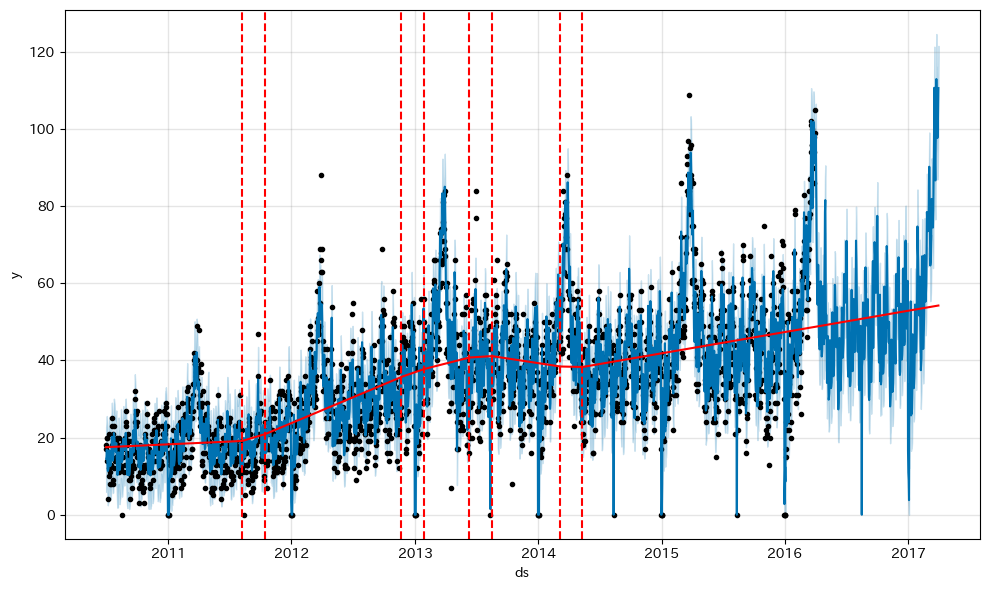

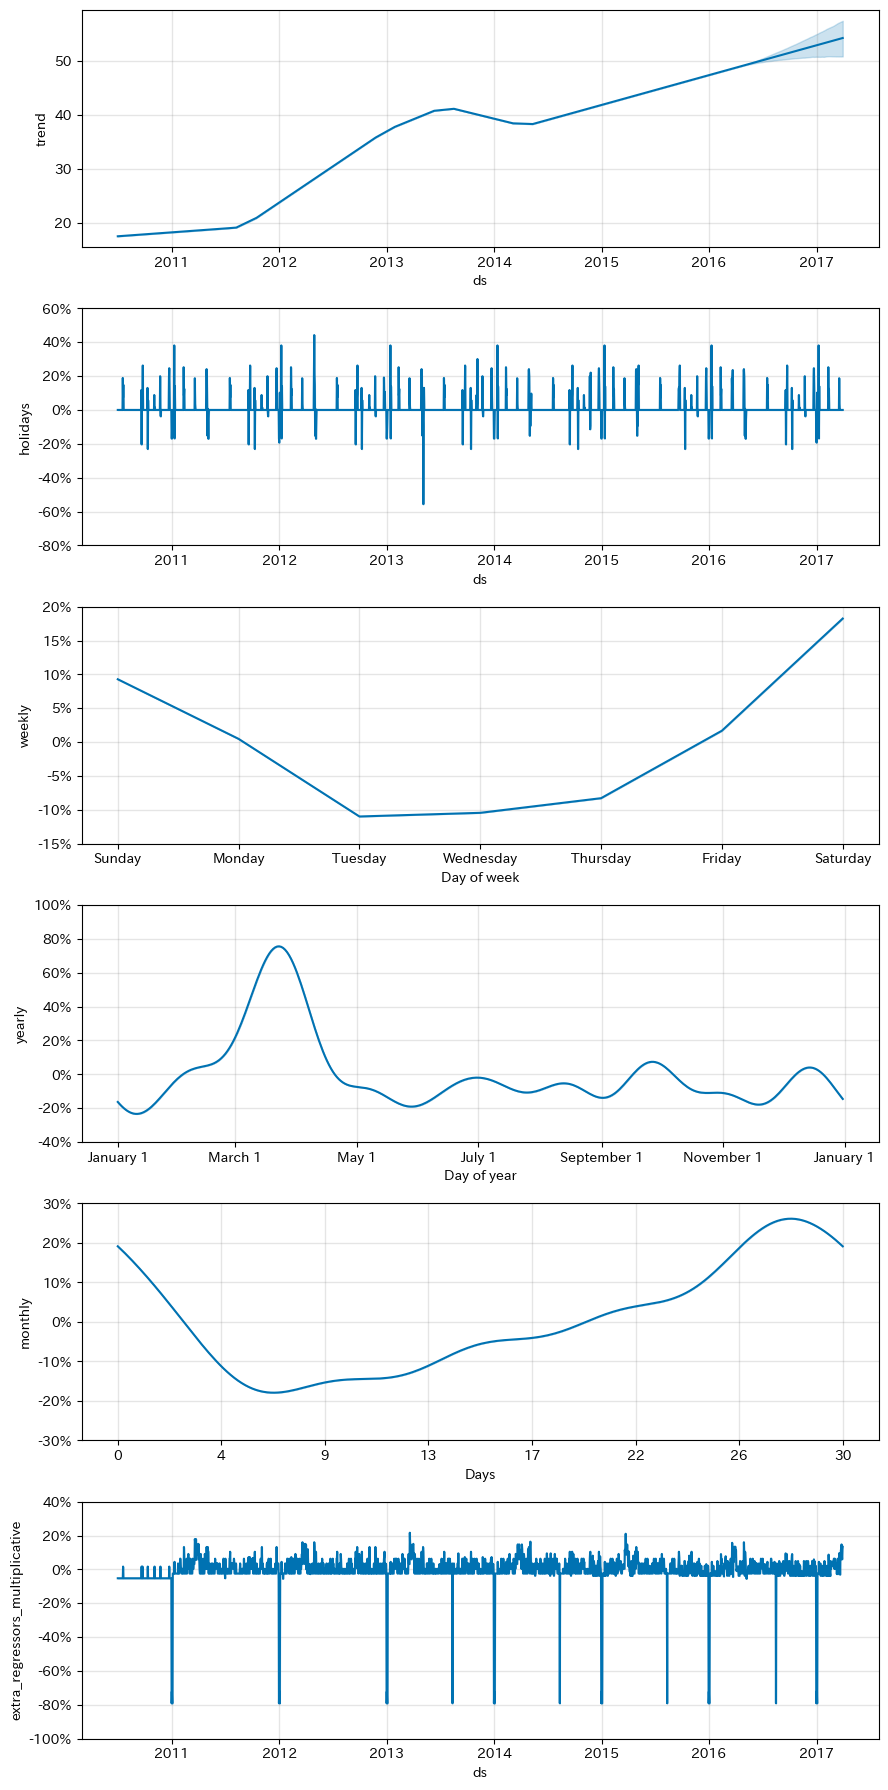

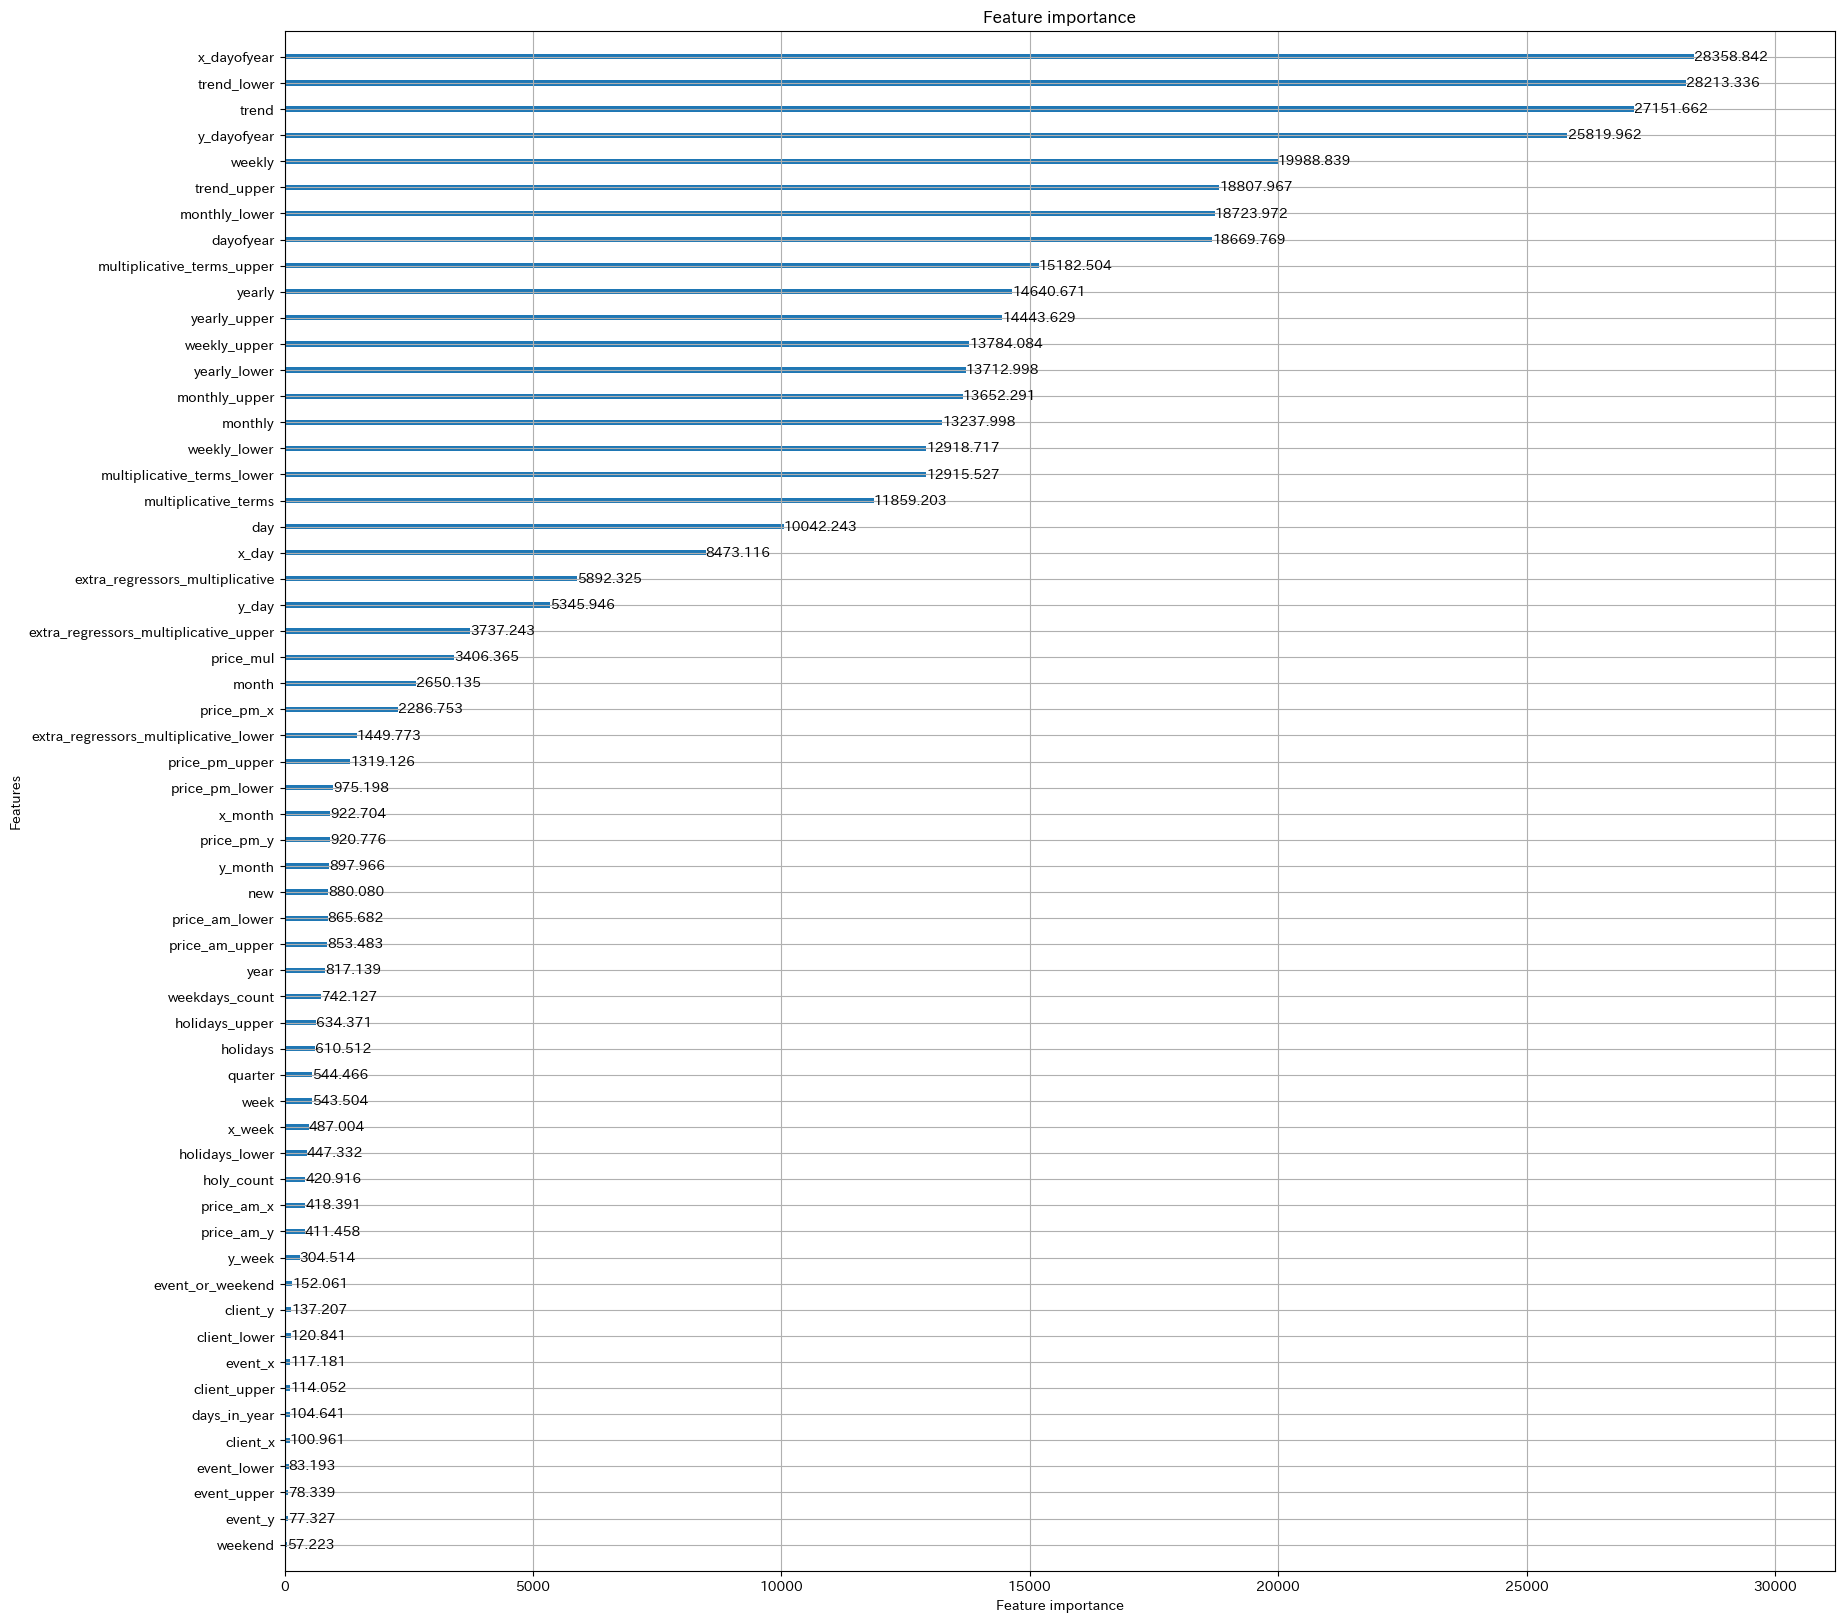

            ds  client_x  close_x  price_am_x  price_pm_x  event_x  year  \
351 2011-06-17         0        0           1           1        0  2011   
352 2011-06-18         0        0           2           2        0  2011   
353 2011-06-19         0        0           2           2        0  2011   
354 2011-06-20         0        0           1           1        0  2011   
355 2011-06-21         0        0           1           1        0  2011   

     month  day  quarter  ...  海の日_upper  秋分の日  秋分の日_lower  秋分の日_upper  \
351      6   17        2  ...        0.0   0.0         0.0         0.0   
352      6   18        2  ...        0.0   0.0         0.0         0.0   
353      6   19        2  ...        0.0   0.0         0.0         0.0   
354      6   20        2  ...        0.0   0.0         0.0         0.0   
355      6   21        2  ...        0.0   0.0         0.0         0.0   

     additive_terms  additive_terms_lower  additive_terms_upper  close_day  \
351             0.0 

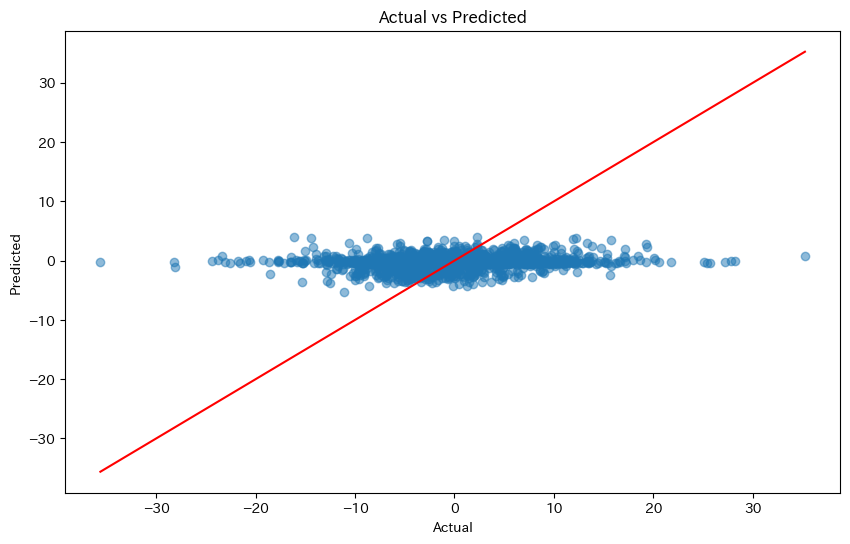

             ds  client_x  close_x  price_am_x  price_pm_x  event_x  year  \
1368 2014-03-30         0        0           6           6        0  2014   
635  2012-03-27         0        0           4           3        0  2012   
1722 2015-03-19         0        0           2           2        0  2015   
1367 2014-03-29         0        0           6           6        0  2014   
1720 2015-03-17         0        0           2           2        0  2015   
1727 2015-03-24         0        0           6           3        0  2015   
1021 2013-04-17         0        0           1           1        0  2013   
816  2012-09-24         0        0           2           1        0  2012   
1094 2013-06-29         0        0           3           3        0  2013   
1095 2013-06-30         0        0           2           2        0  2013   

      month  day  quarter  ...  秋分の日  秋分の日_lower  秋分の日_upper  additive_terms  \
1368      3   30        1  ...   0.0         0.0         0.0            

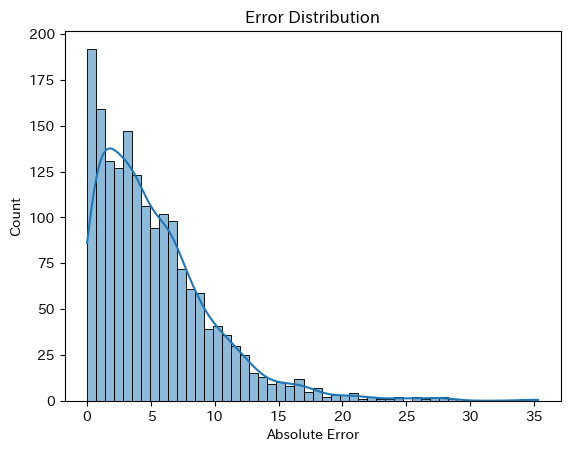

        client_x  close_x  price_am_x  price_pm_x    event_x         year  \
count  88.000000     88.0   88.000000   88.000000  88.000000    88.000000   
mean    0.193182      0.0    2.340909    2.204545   0.045455  2013.977273   
std     0.397057      0.0    1.453386    1.407362   0.209493     1.312865   
min     0.000000      0.0    1.000000    1.000000   0.000000  2011.000000   
25%     0.000000      0.0    1.000000    1.000000   0.000000  2013.000000   
50%     0.000000      0.0    2.000000    2.000000   0.000000  2014.000000   
75%     0.000000      0.0    3.000000    3.000000   0.000000  2015.000000   
max     1.000000      0.0    6.000000    6.000000   1.000000  2016.000000   

           month        day    quarter       week  ...  秋分の日  秋分の日_lower  \
count  88.000000  88.000000  88.000000  88.000000  ...  88.0        88.0   
mean    6.511364  17.761364   2.420455   4.227273  ...   0.0         0.0   
std     3.787439  10.387873   1.247725   2.038296  ...   0.0         0.0   
mi

In [32]:
ensemble_class=Ensemble(df_train,df_test)
ensemble_class.process_data_prophet()
ensemble_class.process_data_lightgbm()
ensemble_class.prophet_()
ensemble_class.trend_adjusted2()
tree,prp,df_train_tree,df_test_tree,df_all_tree=ensemble_class.features_for_ensemble_data()
#df_ensamble=ensemble_class.lightgbm_prophet()
df_,lightgbm_model,df_1217,oof_df=ensemble_class.lightgbm_prophet2()
#importance = lightgbm_model.feature_importances_
# 特徴量名と重要度をデータフレームにまとめる
#importance_df = pandas.DataFrame({"feature_name": lightgbm_model.feature_name_, "importance": importance})
# 重要度の昇順でソートする
#importance_df = importance_df.sort_values("importance", ascending=True)

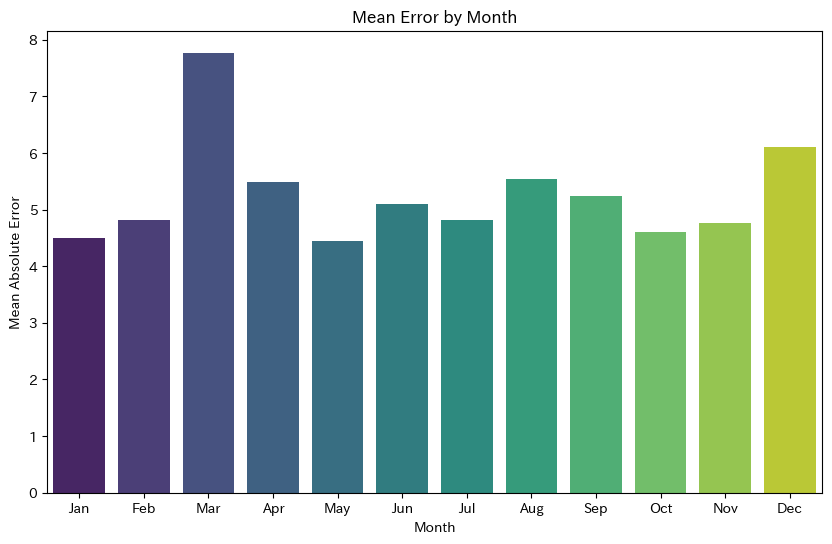

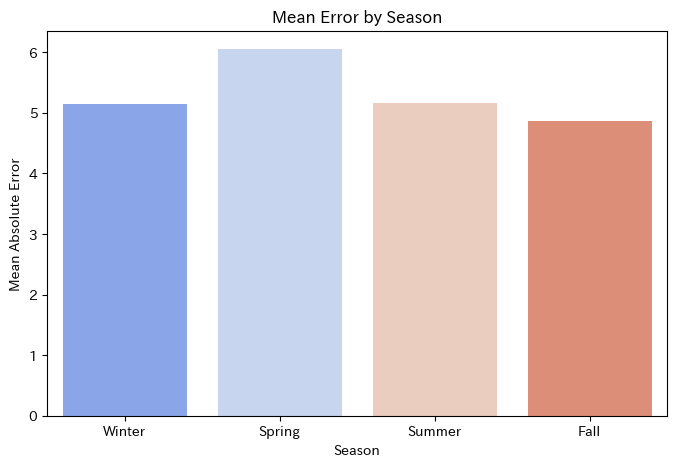

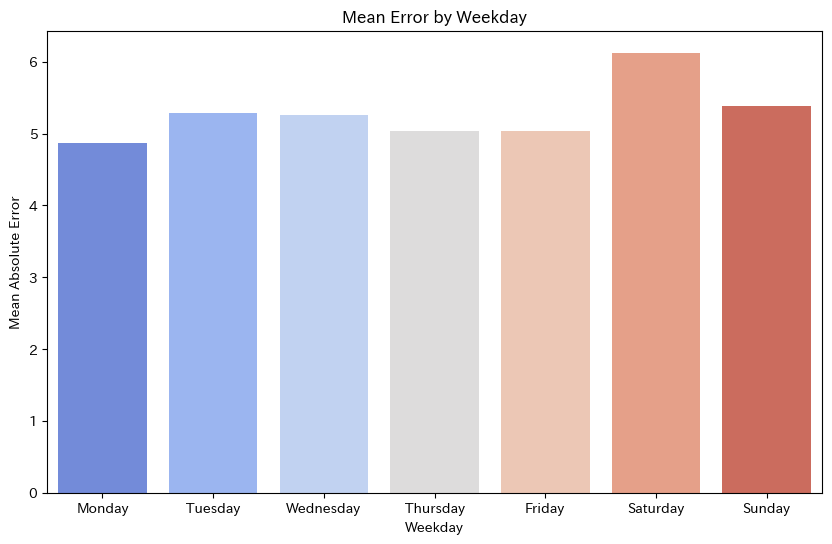

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dsカラムから月を抽出
oof_df['month'] = pd.to_datetime(oof_df['ds']).dt.month

# 月ごとの誤差の平均を計算
monthly_error = oof_df.groupby('month')['error'].mean().reset_index()

# 可視化（棒グラフ）
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='error', data=monthly_error, palette='viridis')
plt.title('Mean Error by Month')
plt.xlabel('Month')
plt.ylabel('Mean Absolute Error')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#----------------------------------------------------------------
# dsカラムから季節を抽出
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

oof_df['season'] = oof_df['month'].apply(get_season)

# 季節ごとの誤差の平均を計算
seasonal_error = oof_df.groupby('season')['error'].mean().reset_index()

# 可視化（棒グラフ）
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='error', data=seasonal_error, order=['Winter', 'Spring', 'Summer', 'Fall'], palette='coolwarm')
plt.title('Mean Error by Season')
plt.xlabel('Season')
plt.ylabel('Mean Absolute Error')
plt.show()

#----------------------------------------------------------------
# 曜日の抽出（0: 月曜日, ..., 6: 日曜日）
oof_df['weekday'] = pd.to_datetime(oof_df['ds']).dt.weekday

# 曜日ごとの誤差の平均を計算
weekday_error = oof_df.groupby('weekday')['error'].mean().reset_index()

# 曜日名に変換
weekday_error['weekday_name'] = weekday_error['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# 可視化（棒グラフ）
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='error', data=weekday_error, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='coolwarm')
plt.title('Mean Error by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Mean Absolute Error')
plt.show()



In [34]:
#graph=CompareCharts(df_compare)
#graph.compare_graph()

In [35]:
df_test_prophet=df_test.copy()
df_test_lightgbm=df_test.copy()
df_test_catboost=df_test.copy()

df_test_lightgbm=df_test_lightgbm.rename(columns={"datetime":"ds","y":"y"})
df_test_catboost=df_test_catboost.rename(columns={"datetime":"ds","y":"y"})

now_str=submisson_datetime()
#df_my_submisson_prophet=df_result[["ds","yhat"]]
#df_my_submisson_prophet["y"]=numpy.exp(df_my_submisson_prophet["y"])-1
#df_my_submisson_prophet=df_my_submisson_prophet.query("ds>='2016-04-01'")
#df_my_submisson_prophet["ds"]=df_my_submisson_prophet["ds"].apply(lambda x:x.strftime('%Y-%m-%d'))
#df_my_submisson_prophet.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\prophet_test{now_str}.csv",index=False,header=False)


#df_my_submisson_neuralprophet=df_result[["ds","yhat1"]]
#df_my_submisson_neuralprophet=df_my_submisson_neuralprophet.query("ds>='2016-04-01'")
#df_my_submisson_neuralprophet["ds"]=df_my_submisson_neuralprophet["ds"].apply(lambda x:x.strftime('%Y-%m-%d'))
#df_my_submisson_neuralprophet.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\neuralprophet_test{now_str}.csv",index=False,header=False)

#df_my_submisson_greykite=df_result[["ts","forecast"]]
#df_my_submisson_greykite=df_my_submisson_greykite.query("ts>='2016-04-01'")
#df_my_submisson_greykite["ts"]=df_my_submisson_greykite["ts"].apply(lambda x:x.strftime('%Y-%m-%d'))
#df_my_submisson_greykite=df_my_submisson_greykite.rename(columns={"ts":"ds","forecast":"y"})
#df_my_submisson_greykite.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\greykite_test{now_str}.csv",index=False,header=False)


##df_test_lightgbm_ds=df_test_tree["ds"]
#df_test_lightgbm=df_test_tree.drop(["ds","y"],axis=1)#1で使用
##df_test_lightgbm=df_test_tree.drop(["ds"],axis=1)#3,4で使用
##df_test_lightgbm["y"]=lightgbm_model.predict(df_test_lightgbm)
#df_test_lightgbm["y"]=numpy.exp(df_test_lightgbm["y"])-1
##df_test_lightgbm=pandas.concat([df_test_lightgbm_ds,df_test_lightgbm],axis=1)
##df_test_lightgbm=lower_limit_value(df_test_lightgbm)
#df_test_lightgbm=close_limit_value(df_test_lightgbm)
##df_test_lightgbm["y"]=df_test_lightgbm["y"].where(df_test_lightgbm["close_day"]!=1,0)
#df_my_submisson_lightgbm=df_test_lightgbm[["ds","y"]]
#df_my_submisson_lightgbm.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\test_lightgbm{now_str}.csv",index=False,header=False)

##df_test_catboost_ds=df_test_tree["ds"]
#df_test_catboost=df_test_catboost.drop(["ds","y"],axis=1)
##df_test_catboost=df_test_tree.drop(["ds"],axis=1)
##df_test_catboost["y"]=catboost_model.predict(df_test_catboost)
##print(df_test_catboost)
##df_test_catboost=pandas.concat([df_test_catboost_ds,df_test_catboost],axis=1)
##print(df_test_catboost)
##df_my_submisson_catboost=df_test_catboost[["ds","y"]]
##print(df_my_submisson_catboost)
##df_my_submisson_catboost.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\test_catboost{now_str}.csv",index=False,header=False)

#アンサンブル用
###df_test_lightgbm_ds=df_test_tree["ds"]
#df_test_lightgbm=df_test_tree.drop(["ds","y"],axis=1)#1で使用

df_test_lightgbm=lower_limit_value_cn(df_,"y_pred")
#df_test_lightgbm=close_limit_value(df_test_lightgbm)
df_test_lightgbm["y_pred"]=df_test_lightgbm["y_pred"].where(df_test_lightgbm["close_day"]!=1,0)
df_my_submisson_lightgbm=df_test_lightgbm[["ds","y_pred"]]
df_my_submisson_lightgbm["ds"]=df_my_submisson_lightgbm["ds"].apply(lambda x:x.strftime('%Y-%m-%d'))
df_my_submisson_lightgbm.to_csv(rf"C:\Users\yuto2\projects\Signate\Moving_demand_forecast\late_submission\test_ensemble{now_str}.csv",index=False,header=False)

C:\Users\yuto2\AppData\Local\Temp\ipykernel_16828\62594641.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
#任意の予測結果を呼び出す
header_names=["ds","y"]
df_prophet_limit20240220_130045=pandas.read_csv(r"/content/drive/MyDrive/portfolio/Signate/引越し需要予測/output/test_prophet_limit20240220_130045.csv",header=None,names=header_names)
df_prophet_limit20240220_130045=pandas.concat([df_test,df_prophet_limit20240220_130045],axis=1)
df_prophet_limit20240220_130045.drop("datetime",axis=1)
df_prophet_limit20240220_130045["ds"]=pandas.to_datetime(df_prophet_limit20240220_130045["ds"],format="%Y-%m-%d")

df_test_ensemble20240302_133152=pandas.read_csv(r"/content/drive/MyDrive/portfolio/Signate/引越し需要予測/output/test_ensemble20240302_133152.csv",header=None,names=header_names)
df_test_ensemble20240302_133152=pandas.concat([df_test,df_test_ensemble20240302_133152],axis=1)
df_test_ensemble20240302_133152.drop("datetime",axis=1)
df_test_ensemble20240302_133152["ds"]=pandas.to_datetime(df_test_ensemble20240302_133152["ds"],format="%Y-%m-%d")
#df_prophet_test20240129_152223=close_limit_value(df_prophet_test20240129_152223)
#df_limit_=df_prophet_test20240129_152223[["ds","y"]]
#df_limit_.to_csv(rf"C:\Users\yuto2\OneDrive\ドキュメント\Pythonフォルダ\Signate\アップル 引越し需要予測\output\test_prophet_limit{now_str}.csv",index=False,header=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/portfolio/Signate/引越し需要予測/output/test_prophet_limit20240220_130045.csv'

In [19]:
#graph_pred_limit20240220_13004=CompareCharts(df_prophet_limit20240220_130045)
#graph_pred_limit20240220_13004.compare_graph()
#check_dataframe_elements(df_prophet_limit20240220_130045)

In [20]:
#LightGBMを比較できる形に整形
##df_my_submisson_=df_my_submisson_lightgbm
#df_my_submisson_=df_my_submisson_.rename(columns={"y":"y_pred"})
##df_my_submisson_["ds"]=pandas.to_datetime(df_my_submisson_["ds"],format="%Y-%m-%d")
##df_my_submisson_compare=pandas.merge(df_test_ensemble20240302_133152,df_my_submisson_,on="ds")

#Catboostを比較できる形に整形
#df_my_submisson_=df_my_submisson_catboost
#df_my_submisson_=df_my_submisson_.rename(columns={"y":"y_pred"})
#df_my_submisson_compare=pandas.merge(df_prophet_limit20240220_130045,df_my_submisson_,on="ds")


#Greykiteを比較できる形に整形
#df_my_submisson_=df_my_submisson_greykite
#df_my_submisson_=df_my_submisson_.rename(columns={"y":"y_pred"})
#check_dataframe_elements(df_my_submisson_)
#df_my_submisson_["ds"]=pandas.to_datetime(df_my_submisson_["ds"],format="%Y-%m-%d")
#df_my_submisson_compare=pandas.merge(df_prophet_limit20240220_130045,df_my_submisson_,on="ds")

#Prophetを比較できる形に整形
#df_test_copy=df_test_
#df_test_copy=df_test_copy.drop("y",axis=1)
df_my_submisson_=df_my_submisson_lightgbm
df_my_submisson_=df_my_submisson_.rename(columns={"yhat":"y_pred"})
df_my_submisson_["ds"]=pandas.to_datetime(df_my_submisson_["ds"],format="%Y-%m-%d")
df_my_submisson_compare=pandas.merge(df_prophet_limit20240220_130045,df_my_submisson_,on="ds")

In [21]:
#学習データを比較できる形に整形
#df_past=df_train
#df_past=df_past.rename(columns={"datetime":"ds","y":"y"})
#df_past["ds"]=pandas.to_datetime(df_past["ds"],format="%Y-%m-%d")
#df_past=df_past.query('ds >= "2015-04-01" and ds <= "2016-03-31"')

### ここから先は実測や予測の比較

In [ ]:
graph_compare=CompareCharts(df_my_submisson_compare)
graph_compare.compare_graph()